Ομάδα 94: Κριθαρούλα Αναστασία 03117073, Κριθαρούλας Διονύσης 03117875

##Ροή Υ: Νευρωνικά Δίκτυα και Εϋφυή Υπολογιστικά Συστήματα

# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση.

In [128]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib
!pip install unidecode
!pip install --upgrade somoclu

In [129]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1-tN5rC1QCgwqL67cvIXdMbtd-Xf9Xqow"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3)

In [130]:
import numpy as np

# Στο επόμενη γραμή βάλτε τον αριθμό της ομάδας στο εργαστήριο των νευρωνικών
team_seed_number = 94

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1-oeMf7BFmiH70XObgC9WOTo-a9cDJZwP"
df_data_2 = pd.read_csv(movie_seeds_url, header=None)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries
corpus_df = pd.DataFrame(corpus) # dataframe version of corpus

In [131]:
ID = 999
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['The Triumphs of a Man Called Horse']
['"Western"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

Αρχικά ορίζουμε τη μεταβλητή N_movies ίση με το πλήθος των ταινιών από τις οποίες αποτελείται το corpus μας.

In [132]:
N_movies = len(corpus) #number of movies

Προκειμένου, να κατανοήσουμε το δοθέν dataset τυπώνουμε τον πίνακα categories, δηλαδή τις κατηγορίες στις οποίες εντάσσεται κάθε μια από τις ταινίες. Παρατηρούμε ότι κάθε στοιχείο του είναι ένας νέος πίνακας ο οποίος περιέχει τις κατηγορίες στις οποίες ανήκει μια ταινία σε μορφή ενιαίου string, χωρισμένες με κόμμα (΄,΄).

In [133]:
print((categories))

[['"Natural horror films",  "Horror",  "Ensemble Film",  "Action/Adventure",  "Disaster",  "Action"']
 ['"Drama"']
 ['"Short Film",  "Family Film",  "Musical",  "Animation"']
 ...
 ['"Silent film"']
 ['"World cinema",  "Musical",  "Drama",  "Romantic drama",  "Romance Film",  "Bollywood"']
 ['"Drama",  "Comedy"']]


Κάνουμε λοιπόν split το string αυτό με βάση τον χαρακτήρα "," έτσι ώστε ο πίνακας categories να περιέχει τελικά για κάθε ταινία μια λίστα με τις κατηγορίες στις οποίες αυτή ανήκει σε επιμέρους strings.  

In [134]:
categories_help = []
for c in categories:
  categories_help.append([a.replace('  "', '').replace('"', '') for a in c[0].split(',')])

categories = categories_help

Ύστερα, από την προεπεξεργασία αυτή στον πίνακα categories, προσδιορίζουμε το πλήθος των διαφορετικών κατηγοριών που εμπεριέχονται στο δοθέν dataset, καθώς και τον αριθμό των ταινιών που εντάσσονται σε κάθε μια από αυτές και εκτυπώνουμε τις δέκα πιο δημοφιλείς κατηγορίες.

In [135]:
Categories_dictionary = dict()
for movie in range(N_movies):
  for category in categories[movie]:
    if not category in Categories_dictionary:
      Categories_dictionary[category] = [movie]
    else:
      Categories_dictionary[category].append(movie)

In [136]:
help_dict = {c : len(Categories_dictionary[c]) for c in Categories_dictionary.keys()}
sorted_categories = [(k, help_dict[k]) for k in sorted(help_dict, key = help_dict.get, reverse = True)]
categories_df = pd.DataFrame(sorted_categories, columns = ['Category', 'Number of movies'])

In [137]:
print('Total Categories:', categories_df.shape[0])

Total Categories: 271


In [13]:
print('The 10 most popular Categories')
categories_df[:10]

The 10 most popular Categories


Category  Number of movies
0            Drama              2351
1           Comedy              1210
2         Thriller               804
3     Romance Film               798
4           Action               685
5     World cinema               586
6    Crime Fiction               509
7           Horror               496
8  Black-and-white               451
9            Indie               444

Παρατηρούμε, λοιπόν, ότι το dataset μας αποτελείται από 271 διαφορετικές κατηγορίες ταινιών με τις πιο πολυπληθείς κατηγορίες να αντιστοιχούν με φθίνουσα σειρά στις ακόλουθες 'Drama', 'Comedy', 'Thriller', 'Romance Film' και 'Action'. 

# Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο

Ως πρώτη εφαρμογή της συγκεκριμένης εργαστηριακής άσκησης, θα προσπαθήσουμε να υλοποιήσουμε ένα σύστημα συστάσεων ταινιών βασισμένο στο περιεχόμενο. Πιο αναλυτικά, με δεδομένο μια συγκεκριμένη ταινία στόχο θα προσπαθήσουμε να εντοπίσουμε νοηματικά συγγενείς ταινίες, βασιζόμενοι αποκλειστικά στις περιγραφές των ταινιών που περιέχονται στο dataframe corpus_df. Για το σκοπό αυτό θα επεξεργαστούμε κατάλληλα τα κείμενα των περιγραφών, προσπαθώντας να δημιουργήσουμε για κάθε ταινία μια όσο το δυνατόν πιο αντιπροσωπευτική αλλά και περιεκτική διανυσματική αναπαράσταση, έτσι ώστε στη συνέχεια να μπορούμε να εντοπίσουμε νοηματικά συγγενείς ταινίες ως ταινίες με κοντινή απόσταση συνημιτόνου στο χώρο που τις έχουμε απεικονίσει.

In [138]:
import nltk
import unidecode
import re

nltk.download('punkt') # χρειάζεται για το tokenizer
nltk.download('stopwords') # κατεβάζουμε ένα αρχείο που έχει stopwords στα αγγλικά
from nltk.corpus import stopwords
import string

nltk.download('wordnet') # απαραίτητα download για τους stemmer/lemmatizer
nltk.download('rslp')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


## Προεπεξεργασία

Αρχικά, δοκιμάζουμε να εκτυπώσουμε αρκετές διαφορετικές περιγραφές ταινιών προκειμένου να δούμε πιθανά προβλήματα που πρέπει να ληφθούν υπόψην και να αντιμετωπιστούν κατά την προεπεξεργασία τους.

Επιλέγουμε ταινίες οι οποιες ανήκουν σε κοινές κατηγορίες καθώς είναι αρκετά πιθανό να είναι και εννοιολογικά συγγενείς οπότε και να προτείνονται ως όμοιες από τον movie recommender που θα υλοποιήσουμε στη συνέχεια της εργασίας και εκτυπώνουμε τις περιγραφές τους προκειμένου να αντιληφθούμε καλύτερα τυχόν διαφορές σε αυτές. Με τον τρόπο αυτό θα μπορέσουμε να επιλέξουμε την κατάλληλη προεπεξεργασία για τον movie recommender. Για παράδειγμα στην συνέχεια παραθέτουμε τις περιγραφές των ταινιών που ανήκουν ταυτόχρονα στις κατηγορίες Horror και Natural horror films.

In [14]:
Categories_set = set()
cnt = 0
for movie in range(N_movies):
  if "Horror" and "Natural horror films" in categories[movie]:
    cnt += 1
    print("Description {}: ".format(cnt),summaries[movie][0],"\n")

Description 1:  A group of soldiers led by Maj. Baker  is ordered to investigate a basement level station which they believed was attacked. After Baker contacts his commander, General Slater , they begin to investigate who drove a civilian van into the base. It is revealed to be owned by a scientist named Dr. Bradford Crane . Slater orders two choppers to check for a black mass , and they are sent out of the sky. 

Description 2:   The film opens as a forensic anthropologist in the African bush is looking over a mass grave of people who have been killed by what she claims are identical gunshot wounds. The woman and a UN soldier head away from the mass grave to inspect another one. She digs her shovel into what she believes is another grave only to be attacked by an unseen creature. The anthropologist is dragged into the water as the soldier opens fire. Other soldiers shoot at the attacker but it kills the woman and drags her into deeper water to consume her. In a New York City newsroom

Στην συνέχεια επιλέγουμε ταινίες του Dataset οι οποίες μεταξύ τους δεν ανήκουν σε καμία κοινή κατηγορία, καθώς οι ταινίες αυτές πιθανότατα δε θα έχουν παραπλήσιο περιεχόμενο, και άρα δε θα πρέπει να προταθούν ως εννοιολογικά συγγενείς από τον movie recommender. Εκτυπώνουμε τις περιγραφές των ταινιών αυτών προκειμένου να βρούμε στοχεία τα οποία πιθανώς θα εμποδίσουν τον movie recommender να εντοπίσει την "εννοιολογική τους απόσταση", έτσι ώστε να τα διαχειριστούμε κατάλληλα κατά την προεπεξεργασία των κειμένων.

In [41]:
Categories_set = set()
flag = 0
cnt = 0
for movie in range(N_movies):
  flag = 0
  for category in categories[movie]:
    if category in Categories_set:
      break
    else:
      Categories_set.add(category)
      if flag==0:
        flag = 1
        cnt = cnt +1
        print("Description {}: ".format(cnt),summaries[movie][0],"\n")

Description 1:  A group of soldiers led by Maj. Baker  is ordered to investigate a basement level station which they believed was attacked. After Baker contacts his commander, General Slater , they begin to investigate who drove a civilian van into the base. It is revealed to be owned by a scientist named Dr. Bradford Crane . Slater orders two choppers to check for a black mass , and they are sent out of the sky. 

Description 2:  The film shows the encounters and romances of several characters who seek love counsel through the eponymous late-night radio talk-show, conducted by Octavio . Octavio sets up blind dates among the characters, mainly advising Sarah , a thirty-something loner who is hooked up with Fernandez , a shy, introverted man who still lives with his father. Their relationship is chronicled through a series of episodes, involving Martínez' affair with a spiritist , Sarah's entanglement with a psychopath and a subplot involving Sarah's strong-willed but ultimately broken 

Από τις παραπάνω περιγραφές τόσο των ταινιών που θεωρούμε εννοιολογικά συγγενών όσο και αυτών που θεωρούμε εννοιολογικά ξένων παρατηρούμε τα εξής:

- Υπάρχουν περιγραφές διαφορετικών ταινιών με ετοιμολογίκα συγγενείς λέξεις που δίνουν το ίδιο σημασιολογικό νόημα σε αυτές. Όμως λόγω της κατάληξης τους ή του τύπου τους διαφέρουν και δε θα μπορέσουν να εντοπιστούν αν δεν κάνουμε κάποια προεπεξεργασία. Για παράδειγμα οι λέξεις shoot, shoots, shooting κ.ο.κ. αναφέρονται όλες στην έννοια του πυροβολισμού, δίνοντας ομοιότητα στις περιγραφές, η οποία όμως για να εντοπιστεί απαιτεί την κατάλληλη διαχείρισή τους.
- Υπάρχουν λέξεις που δεν προσδίσουν κάποιο επιπλέον σημασιολογικό νόημα στις περιγραφές των ταινιών, αλλά εμφανίζονται σε σχεδόν όλες τις περιγραφές με αποτέλεσμα να υπάρχει κίνδυνος οι περιγραφές αυτές να θεωρηθούν "γειτονικές", χωρίς πρακτικά να είναι σημασιολογικά όμοιες. Τέτοια παραδείγματα λέξεων είναι τα άρθρα , οι προθέσεις, οι αντωνυμίες, οι συνδετικές λέξεις - τα λεγόμενα stopwords. Οι λέξεις αυτές χρειάζεται να απορριφθού καθώς δεν προσφέρουν κάποια χρήσιμη πληροφορία στον reccomender. Μάλιστα, στο συγκεκριμένο task, συναντάμε αρκετά συχνά σε διαφορετικές περιγραφές και λέξεις όπως 'film', 'movie', 'actor', οι οποίες όμως λόγω της φύσης του task δεν προσδίδουν κάποια επιπλέον γνώση, οπότε και κατά κάποιον τρόπο θα πρέπει να μειώνεται η αξία τους. Τέτοια θέματα τα αντιμετωπίζει το **Inverse Document Frequency** (IDF), καθώς και η παράμετρος max_df του TFIDF.
- Υπάρχουν ειδικοί χαρακτήρες και σημεία στίξης (παρενθέσεις, κόμματα, τελείες, εισαγωγικά κ.λ.π.) οι οποίοι στο συγκεκριμένο task δεν προσδίσουν κάποια επιπλέον πληροφορία για τη σημασιολογία και το θέμα της ταινίας οπότε και θα πρέπει να αποριφθούν. Το ίδιο θεωρούμε ότι ισχύει και για αριθμητικούς 
- Υπάρχουν λέξεις που ίσως πρέπει να αποτελούν μία ενιαία λέξη στο διάνυσμα που αντιστοιχεί στην περιγραφή της κάθε ταινίας και το οποίο θα παραχθεί στην συνέχεια. Κάτι τέτοιο είναι επιθυμητό σε λέξεις οι οποίες όταν συνδυάζονται δίνουν διαφορετικό νόημα συγκριτκά με όταν χρησιμοποιούνται μεμονωμένα. Η έκφραση 'grow up' είναι ένα τέτοιο παράδειγμα το οποίο βρέθηκε στις παραπάνω περιγραφές. Η έκφραση αυτή σημαίνει μεγαλώνω ενώ αν για παράδειγμα χρησιμοποιηθει μόνη της η λέξη 'grow' σημαίνει καλλιεργώ. 


Με βάση τις παραπάνω παρατηρήσεις υλοποιούμε την ακόλουθη συνάρτηση `preprocessing`. Η προεπεξεργασία που επιλέγουμε να υλοποιήσουμε περιλαμβάνει τα ακόλουθα βήματα:
- κωδικοποίηση των χαρακτήρων από utf-8 σε ascii.
- απόρριψη όλων των χαρακτήρων εκτός των γραμμάτων (απόρριψη αριθμών, σημείων στίξεως).
- μετατροπή των κεφαλαίων γραμμάτων σε πεζά.
- αφαίρεση των stopwords.
- δυνατότητα αφαίρεσης της κατάληξης των λέξεων (stemming)
- δυνατότητα ληματοποίησης των λέξεων (lemmatization)

In [139]:
def preprocessing(corpus_df, stem_lem = 'none'):
  corpus_df = corpus_df.copy()
  corpus_df[0] = corpus_df[0].apply(lambda x: str.lower(re.sub("[^A-Za-z']+", ' ', unidecode.unidecode(x))))
  corpus_df[0] = corpus_df[0].apply(lambda x: ' '.join([word for word in nltk.word_tokenize(x) if word not in stopwords.words('english')]))
  if stem_lem == 'stemming':
    porter_stemmer = PorterStemmer()
    corpus_df[0] = corpus_df[0].apply(lambda x: ' '.join(porter_stemmer.stem(w) for w in x.split(' ')))
  elif stem_lem == 'lemmatization':
    wordnet_lemmatizer = WordNetLemmatizer()
    corpus_df[0] = corpus_df[0].apply(lambda x: ' '.join(wordnet_lemmatizer.lemmatize(w) for w in x.split(' ')))
  return corpus_df

## Μετατροπή σε TFIDF

Στη συνέχεια προκειμένου να αναπαραστήσουμε την περιγραφή κάθε τανίας σε μορφή διανύσματος, χρησιμοποιούμε τον TfidfVectorizer της βιβλιοθήκης scikit-learn. O TfidfVectorizer δέχεται ως είσοδο το προεπεξεργασμένο corpus (περιγραφές ταινιών) και το αναπαριστά σε μορφή διανυσμάτων διάστασης ίσης με το πλήθος των λέξεων του λεξιλογίου που δημιουργεί από αυτό. Τα βασικά βήματα που ακολουθεί για τη δημιουργία του λεξιλογίου περιλαμβάνουν tokenize των περιγραφών, δηλαδή διαίρεση του εννιαίου string περιγραφής σε επιμέρους με βάση τους χαρακτήρες ' ' (space), '/t' (tab) και '/n' (enter), τις παρενθέσεις και οποιοδήποτε άλλο σημείο στίξης, και στη συνέχεια διατήρηση αυτών που αποτελούνται από τουλάχιστον δύο αλφαριθμητικούς χαρακτήρες (default τιμή για την παράμετρο token_pattern = r”(?u)\b\w\w+\b” ). Επιπλέον αυτών, σημαντικό ρόλο στο σχηματισμό του λεξιλογίου, και συνεπώς στη διανυσματική αναπαράσταση των ταινιών, πάιζουν και οι παράμετροι max_df, min_df και ngram_range. Οι παράμετροι max_df, min_df καθορίζουν το ποιές λέξεις θα συμπεριληφθούν τελικά στο λεξιλόγιο με βάση τη συχνότητα εμφάνισής τους. Θετικές ακέραιες τιμές αυτών αναφέρονται στο πλήθος των φορών (ελάχιστο ή μέγιστο αντίστοιχα) που απαιτείται μια λέξη να εμφανιστεί σε μια περιγραφή για να συμπεριληφθεί στο λεξιλόγιο, ενώ  πραγματικές τιμές στο διάστημα (0,1) αναφέροννται στο απαιτούμενο ποσοστό (ελάχιστο ή μέγιστο αντίστοιχα) εμφάνισης μια λέξης στο σύνολο των δοθέντων περιγραφών. Η παράμετρος ngram_range καθορίζει το είδος των n-grams μοντέλων που θα συμπεριληφθούν στο λεξιλόγιο (π.χ. ngram_range  = (1, 2) αντιστοιχεί σε 1-gram και 2-gram μοντέλα). Στη συνέχεια, αφού ο TfidfVectorizer αποφασίσει το λεξιλόγιο που θα χρησιμοποιθεί, αναπαριστά κάθε περιγραφή ταινίας με ένα διάνυσμα, διαστάσης ίσης με το μέγεθος του λεξιλογίου, έτσι ώστε κάθε διάσταση να αντιστοιχεί και σε μια λέξη αυτού με τιμή την tf-idf συχνότητα της λέξης αυτής στη συγκεκριμένη περιγραφή. (<i><u>Σχόλιο:</u> Η επιλογή της tf-idf για την αναπαράσταση των περιγραφών, προτιμάται συγκριτκά με τη χρήση της απλής tf, καθώς η διαίρεση με την idf περιορίζει το ρόλο που παίζουν λέξεις που εμφανίζονται συχνά σε αρκετές διαφορετικές περιγραφές με αποτέλεσμα να παραπλανούν κατευθύνοντας τα διανύσματα των ταινιών προς την ίδια κατεύθυνση χωρίς όμως να υπάρχει πράγματι κάποια σημασιολογική ομοιότητα μεταξύ αυτών</i>).

Υλοποιούμε μια βοηθητική συνάρτηση `create_corpus_tf_idf`, η οποία εφαρμόζει τόσο το preprocessing όσο και την μετατροπή σε TFIDF επιστρέφοντάς μας απευθείας από το αρχικό corpus την τελική διανυσματική αναπαράσταση των ταινιών.

In [140]:
from sklearn.feature_extraction.text import TfidfVectorizer

def create_corpus_tf_idf(corpus_df, max_df = 1.0, min_df = 1, stem_lem = 'none', ngram_range = (1, 1)):
  corpus_df = preprocessing(corpus_df, stem_lem)
  vectorizer = TfidfVectorizer(max_df = max_df, min_df = min_df, ngram_range = ngram_range)
  vectorizer.fit(corpus_df[0])
  corpus_tf_idf = vectorizer.transform(corpus_df[0])
  return corpus_tf_idf, corpus_df, vectorizer

## Υλοποίηση του συστήματος συστάσεων

Ορίζουμε τη συνάρτηση `content_recommender`, η οποία υλοποιεί το σύστημα συστάσεων. Η συνάρτηση αυτή δέχεται ως ορίσματα το id της ταινίας-στόχου (target_movie), το πλήθος των προτάσεων που καλείται να επιστρέψει (max_recommendations), καθώς και το προεπεξεργασμένο corpus, δηλαδή τη διανυσματική αναπαράσταση των ταινιών (corpus_type), και εκτυπώνει τα id, τις κατηγορίες και τις περιγραφές max_recommendations ταινιών, που αντιστοιχούν στι πιο κοντινές με βάση την ομοιότητα συνημιτόνου ταινίες από την ταινία-στόχο.

In [159]:
from sklearn.metrics.pairwise import cosine_similarity
import scipy as sp

def content_recommender(target_movie, max_recommendations, corpus_type, print_flag = True):

  if type(corpus_type) == np.ndarray:
     cosine_similarities = [1 - sp.spatial.distance.cosine(corpus_type[target_movie], corpus_type[i]) for i in range(N_movies)]
  else:
    cosine_similarities = cosine_similarity(corpus_type)[target_movie]
  
  idx_descending_distances = np.argsort(cosine_similarities)[::-1]
  if print_flag:
    print('Target Movie')
    print('\t Id:', target_movie)
    print('\t title:', titles[target_movie])
    print('\t description:', corpus[target_movie])
    print('\t categories:', categories[target_movie])

  ids = []
  for i in range(max_recommendations):
    id = idx_descending_distances[i + 1]
    ids.append(id)
    if print_flag:
      print('\n Recommended Movie', i + 1)
      print('\t Id:', id)
      print('\t title:', titles[id])
      print('\t description:', corpus[id])
      print('\t categories:', categories[id])
  
  return ids

## Βελτιστοποίηση του TfidfVectorizer

Αρχικά, ορίζουμε τη βοηθητική συνάρτηση `common_words`, η οποία δέχεται τα id δύο ταινιών (movie_1 και movie_2) και με βάση ένα προεκπαιδευμένο corpus εκτυπώνει τις κοινές λέξεις μεταξύ των περιγραφών των δύο αυτών ταινιών αντιστοιχισμένες με το γινόμενο των tf-idf συχνοτήτων κάθε περιγραφής για κάθε μια από αυτές. (Γίνεται χρήση της συνάρτησης αυτής στη συνέχεια της άσκησης).

In [142]:
def common_words(movie_1, movie_2, corpus_tf_idf, vectorizer):
  inverse_vocabulary = {vectorizer.vocabulary_[w] : w for w in vectorizer.vocabulary_}
  indexes_vocabulary = [inverse_vocabulary[i] for i in range(len(inverse_vocabulary))]
  corpus_tf_idf = corpus_tf_idf.copy()
  corpus_tf_idf = corpus_tf_idf.toarray()
  idxs = np.where(corpus_tf_idf[movie_1] * corpus_tf_idf[movie_2] > 0)[0]
  com_words = np.array([(indexes_vocabulary[idx], np.round(corpus_tf_idf[movie_1][idx] * corpus_tf_idf[movie_2][idx], 6)) for idx in idxs], dtype = [('x', 'U80'), ('y', 'f8')])
  print('Common words between movieID = ' + str(movie_1) + ' and movieID = ' + str(movie_2) + ':')
  print(np.sort(com_words, order = ('y', 'x')))
  print('\n')

Παρακάτω, πειραματιζόμαστε με διαφορερικές τιμές των παραμέτρων της προεπεξεργασίας προκειμένου να καταλήξουμε σε μια ικανοποιητική διανυσματική αναπαράσταση των ταινιών. Επικεντρωνόμαστε στην επιλογή 'lemmatization', 'stemming' ή τίποτα εκ των δύο, καθώς και στις παραμέτρους min_df, max_df και ngram_range του TfidfVectorizer προκειμένου να καταφέρουμε να δημιουργήσουμε ένα λεξιλόγιο όσο το δυνατόν πιο αντιπροσωπευτικό για το συγκεκριμένο task το οποίο παράλληλα διατηρεί ένα σχετικά περιορισμένο μέγεθος, έτσι ώστε τελικά η διανυσματική αναπαράσταση των ταινιών να είναι όσο το δυνατόν πιο περιεκτική για να μπορεί να αξιοποιηθεί αποδοτικά από τον recommender.

Ως μια πρώτη επαφή επιλέγουμε την ταινία με ID = 97, και καλούμε τον movie recommender για αυτή με max_recommendations = 3 και με default τιμές για τις υπόλοιπες παραμέτρους, δηλαδή προεπεξεγασία χωρίς 'lemmatization' ή 'stemming' και TfidfVectorizer με:
- max_def = 1.0, οπότε και δε συμπεριλαμβάνονται στο τελικό λεξιλόγιο, λέξεις οι οποίες εφμανίζοναι τουλάχιστον μία φορά σε όλες τις περιγραφές των ταινιών.
- min_def = 1, οπότε και δε συμπεριλαμβάνονται στο τελικό λεξιλόγιο λέξεις οι οποίες δεν βρίσκονται σε καμία περιγραφή (πρακτικά η τιμή αυτή δεν έχει κάποια επίδραση στις λέξεις που τελικά θα συμπεριληφθούν στο λεξιλόγιο).
- ngram_range = (1,1), οπότε και στο λεξιλόγιο συμπεριλαμβάνονται μόνο 1-gram μοντέλα.

In [ ]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 1.0, min_df = 1,  ngram_range = (1, 1))
x  = content_recommender(97 ,3, corpus_tf_idf)

Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search for a host body, Horus encounters Nikopol, a r

In [ ]:
print('Number of features for each document:', corpus_tf_idf.shape[1])

Number of features for each document: 47988


Από την παραπάνω δοκιμή συμπεραίνουμε ότι οι default τιμές για τις παραμέτρους της προεπεξεργασίας και του TfidfVectorizer, ακόμα και για έναν μικρό αριθμό max_recommendations = 3, δεν έχουν ικανοποιητικά αποτελέσματα με τις ταινίες που προτείνονται να μην είναι σημασιολογικά συγγενείς. Διαβάζοντας κανείς τις περιγραφές των ταινιών αντιλαμβάνεται πως η ταινία-στόχος (ID = 97) επικεντρώνεται σε υπερφυσικούς οργανισμούς έχοντας έντονο το στοιχείο της φαντασίας και της δράσης. Αντίθετα,όμως, η πρώτη ταινία που προτείνεται (ID = 3864) ως κοντινή σε αυτή επικεντρώνεται περισσότερο σε στοιχεία θρίλερ και ψυχολογικών εγκλημάτων, ενώ η δεύτερη (ID = 437) επικεντρώνεται περισσότερο στο ρομαντισμό και στο δράμα. Ίσως ένας από τους κύριους λόγους της αστοχίας αυτής του συστήματος συστάσεων είναι ο υψηλός αριθμός διαστάσεων που χρησιμοποιείται για την αναπαράσταση του χώρου στον οποίο έχουμε προβάλλει τις ταινίες. Παρατηρούμε ότι μόλις σε ένα dataset 5000 ταινιών, κάθε ταινία αναπαρίσταται από ένα διάνυσμα 47988 διαστάσεων, κάτι το οποίο δυσκολεύει τον υπολογισμό μιας αντιπροσωπευτικής απόστασης, ως προς τη συνάφεια του περιεχομένου, μεταξύ των ταινιών. Για το σκοπό αυτό στη συνέχεια θα προσπαθήσουμε να βελτιώσουμε τις τιμές των παραμέτρων του συστήματος με γνώμονα τόσο καλύτερες και πιο συγγενείς ως προς το περιεχόμενο προτάσεις, όσο και περιορισμό των διαστάσεων αναπαράστασης των ταινιών. Καθώς, λοιπόν, κάθε ταινία αναπαρίσταται από ένα διάνυσμα διαστάσεων ίσο με το πλήθος των λέξεων που απαρτίζουν το λεξιλόγιο, θα προσπαθήσουμε να περιορίσουμε τις λέξεις που τελικά συγκαταλέγονται σε αυτό. Οι παράμετροι που παίζουν καθοριστικό ρόλο σε αυτό είναι οι max_df και min_df του TfidfVectorizer και για αυτό αρχίζουμε τη βελτιστοποίηση επικεντρώνοντας το ενδιαφέρον μας σε αυτές.  

### Μεταβολή των max_df , min_df

Όσον αφορά τις τιμές των παραμέτρων max_df και min_df θα πειραματιστούμε με πραγματικές τιμές στο διάστημα [0.0 - 1.0], έτσι ώστε να αφορούν ποσοστά εμφάνισης λέξεων μεταξύ διαφορετικών περιγραφών. 

Θα δοκιμάσουμε αρχικά, να μειώσουμε την τιμή του max_df από 1.0. Όπως, αναφέραμε και πριν τιμή max_df = 1.0 στον TfidfVectorizer αντιστοιχεί σε απόρριψη των λέξεων που εμφανίζονται τουλάχιστον μια φορά σε κάθε περιγραφή. Κάτι τέτοιο ωστόσο είναι εξαιρετικά σπάνιο και ίσως δεν πρόκειται για το μόνο υποσύνολο λέξεων που πρέπει να απορριφθεί. Λογικό φαίνεται να δοκιμάσουμε να απορρίψουμε και λέξεις που περιέχονται και σε ένα σχετικά υψηλό ποσοστό περιγραφών αλλά όχι απαραίτητα σε όλες.

In [46]:
import joblib

Για max_def = 0.9 και min_df = 1 έχουμε:

In [ ]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.9, min_df = 1,  ngram_range = (1, 1))
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.9_min_df_1.pkl') 
joblib.dump(vectorizer, 'vectorizer_max_df_0.9_min_df_1.pkl') 
print('Number of features for each document:', corpus_tf_idf.shape[1])

Number of features for each document: 47988


Για max_def = 0.8 και min_df = 1 έχουμε:

In [ ]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.8, min_df = 1,  ngram_range = (1, 1))
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.8_min_df_1.pkl') 
joblib.dump(vectorizer, 'vectorizer_max_df_0.8_min_df_1.pkl') 
print('Number of features for each document:', corpus_tf_idf.shape[1])

Number of features for each document: 47988


Για max_def = 0.6 και min_df = 1 έχουμε:

In [ ]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.6, min_df = 1,  ngram_range = (1, 1))
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.6_min_df_1.pkl') 
joblib.dump(vectorizer, 'vectorizer_max_df_0.6_min_df_1.pkl') 
print('Number of features for each document:', corpus_tf_idf.shape[1])

Number of features for each document: 47988


Για max_def = 0.3 και min_df = 1 έχουμε:

In [ ]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.3, min_df = 1,  ngram_range = (1, 1))
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.3_min_df_1.pkl') 
joblib.dump(vectorizer, 'vectorizer_max_df_0.3_min_df_1.pkl') 
print('Number of features for each document:', corpus_tf_idf.shape[1])
x  = content_recommender(97 ,3, corpus_tf_idf)

Number of features for each document: 47984
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search fo

Παρατηρούμε ότι μείωση του max_df έως και 0.3, δηλαδή απόρριψη λέξεων που εμφανίζονται σε περισσότερες από 0.3 x 5000 = 1500 περιγραφές, έχει μηδαμινή επίδραση στη μείωση των διαστάσεων των χαρακτηριστικών των ταινιών, περιορίζοντας τις διαστάσεις τους, μόλις κατά 4, ενώ οι προτάσεις ταινιών του συστήματος συστάσεων παραμένουν ίδιες. Οπότε, και συνεχίζουμε σε περαιτέρω μείωση του max_df. 

Για max_def = 0.1 και min_df = 1 έχουμε:

In [ ]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.1, min_df = 1,  ngram_range = (1, 1))
print('Number of features for each document:', corpus_tf_idf.shape[1])
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.1_min_df_1.pkl') 
joblib.dump(vectorizer, 'vectorizer_max_df_0.1_min_df_1.pkl')
x  = content_recommender(97 ,3, corpus_tf_idf)

Number of features for each document: 47854
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search fo

Για max_def = 0.05 και min_df = 1 έχουμε:

In [ ]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.05, min_df = 1,  ngram_range = (1, 1))
print('Number of features for each document:', corpus_tf_idf.shape[1])
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.05_min_df_1.pkl') 
joblib.dump(vectorizer, 'vectorizer_max_df_0.05_min_df_1.pkl')
x  = content_recommender(97 ,3, corpus_tf_idf)

Number of features for each document: 47613
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search fo

Παρατηρούμε, λοιπόν, ότι περαιτέρω μείωση του max_df σε 0.1 ή ακόμα και 0.05, δηλαδή απόρριψη από το λεξιλόγιο λέξεων που εμφανίζονται σε τουλάχιστον 1000 ή 500 περιγραφές, περιορίζουν λίγο τις διαστάσεις αναπαράστασης των ταινιών, οι οποίες όμως παραμένουν πάνω από 47000, νούμερο αρκετά μεγάλο για μια καλή απόδοση, τόσο χρονική όσο και νοηματική, του συστήματος συστάσεων. 

Για το λόγο αυτό, στη συνέχεια της διαδικασίας βελτστοποίησης, δοκιμάζουμε  να πειραματιστούμε και με τις τιμές της παραμέτρου min_df. Η παράμετρος αυτή αντιστοιχεί στο ελάχιστο απαιτούμενο ποσοστό εμφανίσεων μιας λέξης σε όλο το πλήθος των περιγραφών για να συμπεριληφθεί στο λεξιλόγιο. Για το λόγο αυτό για την παράμετρο αυτή επιλέγουμε μικρές τιμές στο διάστημα [0.0 - 1.0], έτσι ώστε να απορρίπτουμε λέξεις που εμφανίζονται σπάνια σε κάποια περιγραφή και που όμως εμφανίζονται στο λεξιλόγιο αυξάνοντας τις διαστάσεις αναπαράστασης (κάθε λέξη αντιστοιχεί και σε μια διάσταση) χωρίς πρακτικά όμως να συνεισφέρουν στον καθορισμό νοηματικών αποστάσεων μεταξύ των ταινιών.

Για max_def = 0.2 και min_df = 0.005 έχουμε:

In [ ]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.2, min_df = 0.005,  ngram_range = (1, 1))
print('Number of features for each document:', corpus_tf_idf.shape[1])
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.2_min_df_0.005.pkl') 
joblib.dump(vectorizer, 'vectorizer_max_df_0.2_min_df_0.005.pkl')
x  = content_recommender(97 ,3, corpus_tf_idf)

Number of features for each document: 4178
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search for

Παρατηρούμε ότι η αλλαγή της τιμής του min_df σε min_df = 0.005 περιόρισε δραστικά τις λέξεις που περιλαμβάνονται στο λεξιλόγιο που κατασκευάζει ο TfidfVectorizer και επακόλουθα και τις διαστάσεις των διανυσματικών αναπαραστάσεων των ταινιών από πάνω από 47000 σε μόλις 4178. Το γεγονός αυτό μας οδηγεί στο συμπέρασμα ότι περισσότερες από 40000 που μέχρι πρότεινως έπαιζαν ρόλο στην αναπαράσταση των ταινιών, εμφανίζονται το πολύ σε 0.005 x 5000 = 25 περιγραφές, οπότε και απλώς αυξάνουν τις διαστάσεις του χώρου αναπαράστασης των ταινιών, χωρίς πρακτικά να έχουν κάποιον ιδιαίτερο ρόλο στον καθορισμό των νοηματικών αποστάσεων μεταξύ τους. Βλέπουμε μάλιστα ότι η μεγάλη αυτή μείωση των διαστάσεων έχει επίδραση και στις προτάσεις του συστήματος συστάσεων, σε μια κάπως καλύτερη κατεύθυνση. Πιο αναλυτικά, παρατηρούμε ότι ο movie recommender για την ταινία στόχο (ID = 97), μια ταινία επιστημονικής φαντασίας, προτείνει ως εννοιολογικά συγγενείς ταινίες παρόμοιων κατηγοριών που έχουν έντονα τα χαρακτηριστικά της περιπέτειας, της δράσης ή της φαντασίας. Η βελτίωση αυτή στην απόδοση του συστήματος συστάσεων αποδίδεται στη μείωση των διαστάσεων των χαρακτηριστικών, καθώς πλέον δεν καλείται να προσδιορίσει αποσταστάσεις στον 'αχανή' χώρο των 47000 και πλέον διαστάσεων, αλλά μόλις σε ένα χώρο περίπου 4100 διαστάσεων και μάλιστα αρκετά πιο αντιπροσωπευτικών.    

Για max_def = 0.2 και min_df = 0.008 έχουμε:

In [ ]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.2, min_df = 0.008,  ngram_range = (1, 1))
print('Number of features for each document:', corpus_tf_idf.shape[1])
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.2_min_df_0.008.pkl') 
joblib.dump(vectorizer, 'vectorizer_max_df_0.2_min_df_0.008.pkl')
x  = content_recommender(97 ,3, corpus_tf_idf)

Number of features for each document: 2807
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search for

Αυξάνοντας λίγο το min_df από 0.005 σε 0.008, δηλαδή θέτοντας ως απαιραίτητη για μια λέξη την εμφάνισή της σε τουλάχιστον 0.008 x 5000 = 40 περιγραφές για να συμπεριληφθεί στο λεξιλόγιο, παρατηρούμε και πάλι αρκετά μεγάλη μείωση των διαστάσεων, πάνω από 1000. Παράλληλα, όσον αφορά την απόδοση του συστήματος συστάσεων, το οποίο πλέον βασίζεται μόλις σε 2807 λέξεις για το προσδιορισμό των νοηματικών αποστάσεων μεταξύ των ταινιών, παρατηρούμε και εκεί μια μικρή περαιτέρω βελτίωση, καθώς για την ταινία στόχο (ID = 97), προτείνονται σε πιο ψηλές θέσεις ταινίες με μεγαλύτερη νοηματική συγγένια, όπως η ταινία με ID = 2926 (πλέον προτείνεται ως η πιο κοντινή, ενώ προηγουμένως προτεινόταν ως τρίτη) που ομοίως με την ταινία στόχο πραγματεύονται μια ιστορία επιστημονικής φαντασίας με ανθρώπους να συνυπάρχουν με υπερφυσικά όντα, ενώ μάχες και αναταραχές λαμβάνουν χώρα. 

Στη συνέχεια, διατηρούμε σταθερό το min_df στην τιμή min_df = 0.008 καθώς παρατηρούμε ότι για την τιμή αυτή ο movie recommender οδηγείται σε βελτιωμένες προτάσεις ταινιών, ιδίως για τα πρώτα recommendation, και πειραματιζόμαστε εκ νέου με την παράμετρο max_df για να δούμε το εάν θα μπορούσε να έχει κάποια ενισχυτική συνεισφορά στις μέχρι τώρα συστάσεις.  

Για max_def = 0.5 και min_df = 0.008 έχουμε:

In [50]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.5, min_df = 0.008,  ngram_range = (1, 1))
print('Number of features for each document:', corpus_tf_idf.shape[1])
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.5_min_df_0.008.pkl') 
joblib.dump(vectorizer, 'vectorizer_max_df_0.5_min_df_0.008.pkl')
x  = content_recommender(97 ,3, corpus_tf_idf)

Number of features for each document: 2835
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search for

Παρατηρούμε ότι με αύξηση του max_df από 0.2 σε 0.5, οι διαστάσεις των διανυσμάτων αναπράστασεις των ταινιών αυξάνονται ελάχιστα από 2807 σε 2835, ενώ όσον αφορά τις συστάεις του movie recommender, βλέπουμε ότι η ταινία με ID = 576 που μέχρι πρότεινως δεν περιλαμβανόταν στι τρεις πρώτες συστάσεις για την ταινία στόχο (ID = 97) καταλαμβάνει πλέον τη δεύτερη θέση. Η αλλαγή αυτή είναι ικανοποιητική καθώς παρότι πρόκειται για ένα σύνολο animation μικρού μήκους υπάρχουν κοινά στοιχεία ως προς το περιεχόμενο με την ταινία στόχο, με ανθρώπους να έρχονται και πάλι αντιμέτωποι με υπερφυσικά όντα και ευφυείς μηχανές που οι ίδιοι κατασκεύασαν. Μάλιστα, προς την κατεύθυνση αυτή συμβάλλει και το γεγονός ότι η ταινία με ID = 576 κατέλαβε τη θέση που μέχρι πρότεινως διατηρούσε η ταινία με ID = 2318, που πλέον συναντάται στην τρίτη θέση και παρότι έχει και πάλι έντονο το στοιχείο της επιστημονικής φαντασίας με την αλληλεπίδραση ανθρώπων με υπερφυσικά όντα, δεν χαρακτηρίζεται τόσο έντονα από στοιχεία έντονης δράσης και συγκρούσεων.   

Στη συνέχεια, δοκιμάζουμε μια επιπλέον αύξηση του max_df, η οποία όμως όπως βλέπουμε δεν έχει καμία επίδραση στην διανυσματική αναπαράσταση των ταινιών και άρα ούτε και στις συστάσεις του movie recommender, οπότε και δε συνεχίζουμε τις δοκιμές μας προς αυτή την κατεύθυνση.

Για max_def = 0.6 και min_df = 0.008 έχουμε:

In [ ]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.6, min_df = 0.008,  ngram_range = (1, 1))
print('Number of features for each document:', corpus_tf_idf.shape[1])
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.6_min_df_0.008.pkl') 
joblib.dump(vectorizer, 'vectorizer_max_df_0.6_min_df_0.008.pkl')

Number of features for each document: 2835


['vectorizer_max_df_0.6_min_df_0.008.pkl']

Τέλος, καθώς έχουμε καταφέρει να εξασφαλίσουμε ικανοποιητικές προτάσεις ταινιών για την ταινία στόχο, σε μια προσπάθεια να μειώσουμε όσο το δυνατόν τις διαστάσεις των διανυσματικών αναπαραστάσεων των  ταινιών για να εξασφαλίσουμε και μια όσο το δυνατόν πιο αποδοτική, ως προς τις χρονικές απαιτήσεις (ιδίως για μεγαλύτερο αριθμό max_recommendations), λειτουγία του συστήματος συστάσεων αυξάνουμε εκ νέου το min_df, έως ότου δούμε ότι η αύξηση αυτή δεν επηρεάζει τις συστάσεις του. 

Για max_df = 0.5 και min_df = 0.01 έχουμε:

In [ ]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.5, min_df = 0.01,  ngram_range = (1, 1))
print('Number of features for each document:', corpus_tf_idf.shape[1])
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.5_min_df_0.01.pkl') 
joblib.dump(vectorizer, 'vectorizer_max_df_0.5_min_df_0.01.pkl')
x  = content_recommender(97 ,3, corpus_tf_idf)

Number of features for each document: 2361
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search for

Για max_df = 0.5 και min_df = 0.012 έχουμε:

In [ ]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.5, min_df = 0.012,  ngram_range = (1, 1))
print('Number of features for each document:', corpus_tf_idf.shape[1])
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.5_min_df_0.012.pkl') 
joblib.dump(vectorizer, 'vectorizer_max_df_0.5_min_df_0.012.pkl')
x  = content_recommender(97 ,3, corpus_tf_idf)

Number of features for each document: 1978
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search for

Παρατηρούμε, λοιπόν, ότι η μέγιστη τιμή που μπορούμε να δώσουμε στην παράμετρο min_df χωρίς να επηρεαστούν οι συστάσεις του movie recommender για την ταινία στόχο με ID = 97 είναι 0.01, η οποία μάλιστα αντιστοιχεί και σε μια ικανοποιητική μείωση των διαστάσεων των χαρακτηριστικών από 2835 σε 2361.

Έχοντας, καταλήξει λοιπόν, σε ένα βελτιωμένο σύστημα συστάσεων με τιμές max_df = 0.05 και min_df = 0.01 συνεχίζουμε τη διαδικασία της βελτιστοποίησης πειραματιζόμενοι με τις τιμές των υπολοίπων παραμέτρων.

### Μεταβολή του ngram_state

Η παράμετρος ngram_state του TfidfVectorizer, όπως προαναφέραμε, καθορίζει τα n-gram μοντέλα που θα συμπεριληφθούν στο λεξιλόγιο που αυτός κατασκευάζει. Χρησιμοποιώντας μοντέλα μεγαλύτερα του 1-gram μπορούμε να εκμεταλευτούμε τη χωρική τοποθέτηση των λέξεων δίνοντας έμφαση σε εκφράσεις που σχηματίζονται από το συνδυασμό δύο ή και περισσότερων διαδοχικών λέξεων και που αποτελούν συχνά ένα σαφές και αντιπροσωπευτικό δείγμα του περιεχομένου μιας περιγραφής.

Δοκιμάζουμε αρχικά, να χρησιμοποιήσουμε συνδυασμό 1-gram και 2-gram μοντέλων.

Για max_df = 0.5, min_df = 0.01 και ngram_range = (1, 2) έχουμε:

In [ ]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.5, min_df = 0.01,  ngram_range = (1, 2))
print('Number of features for each document:', corpus_tf_idf.shape[1])
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.5_min_df_0.01_ngram_1_2.pkl') 
joblib.dump(vectorizer, 'vectorizer_max_df_0.5_min_df_0.01_ngram_1_2.pkl')
x  = content_recommender(97 ,3, corpus_tf_idf)

Number of features for each document: 2458
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search for

Παρατηρούμε ότι οι διαστάσεις των διανυσμάτων αναπαράστασης των ταινιών είναι πλέον 2458, ενώ για τις αντίστοιχες τιμές max_df, min_df και χρήση αποκλειστικά 1-gram μοντέλων είχαμε 2361 διαστάσεις. Συμπεραίνουμε, λοιπόν, ότι στο λεξιλόγιο του TfidfVectorizer έχουν προστεθεί 97 2-gram μοντέλα, δηλαδή 97εκφράσεις δύο λέξεων. Η τροποποίηση αυτή του λεξιλογίου και άρα της αναπαράστασης των ταινιών αλλάζει και την τρίτη ταινία που προτείνει ο movie recommender. Αντί, λοιπόν, της ταινίας με ID = 2318 προτείνεται ως προς συναφής με την ταινία στόχο (ID = 97) η ταινία με ID = 3614. Ωστόσο, η αλλαγή αυτή δε συμβάλλει στη βελτίωση του recommender, καθώς ενώ μέχρι πρότεινως προτεινόταν μια ταινία με κοινά στοιχεία επιστημονικής φαντασίας με την ταινία στόχο, πλέον προτείνεται μια ταινία προς την κατεύθυνση του θρίλερ.

Δοκιμάζουμε στη συνέχεια να μειώσουμε λίγο το min_df προκειμένου να λάβουμε υπόψην μας περισσότερο 2-gram μοντέλα κατά τη διανυσματική αναπαράσταση των ταινιών.

Για max_df = 0.5, min_df = 0.008 και ngram_range = (1, 2) έχουμε:

In [ ]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.5, min_df = 0.008,  ngram_range = (1, 2))
print('Number of features for each document:', corpus_tf_idf.shape[1])
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.5_min_df_0.008_ngram_1_2.pkl') 
joblib.dump(vectorizer, 'vectorizer_max_df_0.5_min_df_0.008_ngram_1_2.pkl')
x  = content_recommender(97 ,3, corpus_tf_idf)

Number of features for each document: 2979
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search for

Παρατηρούμε ότι στην περίπτωση αυτή προστίθενται στο λεξιλόγιο που κατασκευάζει ο TfidfVectorizer 144 2-gram μοντέλα (αφού για τις αντίστοιχες τιμές max_df, min_df με χρήση αποκλειστικά 1-gram μοντέλων είχαμε 2835 διαστάσεις). Όσον αφορά τις προτάσεις του συστήματος συστάσεων οι δύο πρώτες παραμένουν ίδιες, ενώ η τρίτη τροποποιείται και πλέον προτείνεται η ταινία με ID = 4859 ως συναφής ως προς το περιεχόμενο με την ταινία στόχο (ID = 97). Η επιλογή αυτή είναι καλύτερη τόσο από την ταινία με ID = 3614 (αμέσως πριν), όσο και από την ταινία με ID = 2318 (3η πρόταση του βελτιωμένου συστήματος συστάσεων με χρήση αποκλειστικά 1-gram μοντέλων), καθώς πλέον πέρα από στοιχεία επιστημονικής φαντασίας έχουμε και στοιχεία μάχης και σύγκρουσης, ενώ έχουμε και κοινό τόπο στον οποίο διαδραματίζοντα, την πόλη της Νέας Υόρκης. Μάλιστα, αυτός ακριβώς φαίνεται να είναι και ο λόγος της ανόδου της ταινίας αυτής με ID = 4859 στη λίστα με τις συναφείς ταινίες με την ταινία στόχο (ID = 97), το 2-gram μοντέλο 'new york' που χρησιμοποιείται και στις δύο περιγραφές.  

Περαιτέρω μείωση του min_df βλέπουμε ότι δε βελτιώνει το movie_recommender, καθώς όπως βλέπουμε παρακάτω, για max_df = 0.5, min_df = 0.005 και ngram_range = (1, 2), οι διαστάσεις και άρα οι λέξεις του λεξιλογίου αυξάνονται αρκετά, οπότε και πιθανώς τα 2-gram μοντέλα χάνουν την επιρροή τους μέσα το μεγάλο πλήθος 1-gram μοντέλων, τα οποία και επικρατούν για τον προσδιορισμό των νοηματικών αποστάσεων μεταξύ των ταινιών, και για αυτό και ο Movie_recommender καταλήγει στις ίδιες συστάσεις στις οποίες κατέληγε και αποκλειστικά με τη χρήση 1-gram μοντέλων.

In [ ]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.5, min_df = 0.005,  ngram_range = (1, 2))
print('Number of features for each document:', corpus_tf_idf.shape[1])
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.5_min_df_0.005_ngram_1_2.pkl') 
joblib.dump(vectorizer, 'vectorizer_max_df_0.5_min_df_0.005_ngram_1_2.pkl')
x  = content_recommender(97 ,3, corpus_tf_idf)

Number of features for each document: 4555
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search for

Τέλος, δοκιμάζουμε να χρησιμοποιήσουμε συνδυασμό 1-gram, 2-gram αλλά και 3-gram μοντέλων.

Για max_df = 0.5, min_df = 0.008 και ngram_range = (1, 3) έχουμε:

In [ ]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.5, min_df = 0.008,  ngram_range = (1, 3))
print('Number of features for each document:', corpus_tf_idf.shape[1])
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.5_min_df_0.008_ngram_1_3.pkl') 
joblib.dump(vectorizer, 'vectorizer_max_df_0.5_min_df_0.008_ngram_1_3.pkl')
x  = content_recommender(97 ,3, corpus_tf_idf)

Number of features for each document: 2981
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search for

Παρατηρούμε ότι ο TfidfVectorizer προσθέτει στο λεξιλόγιο που κατασκευάζει μόλις δύο 3-gram μοντέλα (2981 - 2979 = 2), τα οποία όπως ήταν αναμενόμενο δεν επηρεάζουν τις προτάσεις του συστήματος συστάσεων που παραμένουν ίδιες με τις αντίστοιχες για χρήση 1-gram και 2-gram μοντέλων. Οπότε, και περαιτέρω αύξηση του n των n-gram μοντέλων στα οποία βασίζεται ο TfidfVectorizer δε θα έχει κάποια επιπρόσθετη συνεισφορά.

<i><u>Σχόλιο</u>: Aν και η προσθήκη 2-gram μοντέλων είδαμε ότι βελτιώνει το σύστημα συστάσεων, στη συνέχεια της εργαστηριακής άσκησης δε θα χρησιμοποιηθεί, καθώς τα 2-gram μοντέλα δε μπορούν να συνδυαστούν με τα προεκπαιδευμένα embeddings που έχουμε στη διάθεσή μας και καλούμαστε να συμπεριλάβουμε στο σύστημα</i>.

### Χρήση 'lemmatization', 'stemming' ή 'none'

Αφού έχουμε πειραματιστεί με τις παραμέτρους του TfidfVectorizer, προκειμένου να ολοκληρώσουμε τη διαδικασία βελτιστοποίησης της προεπεξεργασίας και της διανυσματικής αναπαράστασης των ταινιών, θα δοκιμάσουμε τυχόν διαφοροποιήσεις στις διανυσματικές αναπαραστάσεις και στις προτάσεις του συστήματος συστάσεων με εφαρμογή 'lemmatization', 'stemming' ή τίποτα εκ των δύο.
- 'lemmatization': Πρόκειται για τη διαδικασία ληματοποίησης των λέξεων που περιέχονται στις περιγραφές, δηλαδή της αντιστοίχισής τους στο λήμμα από το οποίο προέρχονται, όπως αυτό περιέχεται στο λεξικό.
- 'stemming': Πρόκειται για την αφαίρεση της καταλήξης των λέξεων που περιέχονται στις περιγραφές, χωρίς ωστόσο να εγγυάται πως οι προκύπτουσες λέξεις είναι λέξεις έγκυρες, υπαρκτές στο λεξικό.

Καθώς, με τις παραπάνω βελτιστοποιήσεις έχουμε καταφέρει το σύστημα συστάσεων να προτείνει ικανοποιητικές ταινίες ως συναφείς με την ταινία στόχο (ID = 97) τουλάχιστον για max_recommendations = 3, στις ακόλουθες δοκιμές αυξάνουμε το max_recommendations προκειμένου να δούμε πως συμπεριφέρεται το σύστημα συστάσεων και μετά τις τρεις πρώτες προτάσεις, σε μια προσπάθεια για μια πιο εκτενή βελτιστοποίησή του.

Εκτυπώνουμε αρχικά τις συστάσεις του movie recommender για max_recommendations = 5, για τις δύο καλύτερες βελτιστοποιήσεις μέχρι στιγμής, δηλαδή για max_df = 0.5, min_df = 0.01 και max_df = 0.5, min_df = 0.008. (<i>Σχόλιο: Καθώς τα δύο αυτά corpus τα έχουμε ήδη υλοποιήσει σε προηγούμενα στάδια της εργασίας απλά τα φορτώνουμε από τα αντίστοιχα αρχεία</i>).

Για max_df = 0.5, min_df = 0.01, χωρίς 'stemming' ή 'lemmatization' έχουμε:

In [ ]:
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.01.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.01.pkl')

In [ ]:
print('Number of features for each document:', corpus_tf_idf.shape[1])
x  = content_recommender(97 ,5, corpus_tf_idf)

Number of features for each document: 2361
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search for

Για max_df = 0.5, min_df = 0.008, χωρίς 'stemming' ή 'lemmatization' έχουμε:

In [ ]:
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008.pkl')

In [ ]:
print('Number of features for each document:', corpus_tf_idf.shape[1])
x  = content_recommender(97 ,5, corpus_tf_idf)

Number of features for each document: 2835
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search for

Παρατηρούμε, λοιπόν, ότι ενώ για max_recommendations = 3, τα δύο συστήματα συστάσεων καταλήγουν στις ίδιες ταινίες, αυξάνοντας το max_recommendations τροποποιούνται λίγο οι προτάσεις τους, με το πρώτο (max_df = 0.5, min_df = 0.01) να προτείνει ως 5η την ταινία με ID = 1193, ενώ το δεύτερο (max_df = 0.5, min_df = 0.008) την ταινία με ID = 4527. Μεταξύ των δύο, πιο κοντά νοηματικά στην ταινία στόχο (ID = 97) φαίνεται να είναι η ταινία με ID = 4527 που προτείνει ο δεύτερος recommender, με τα στοιχεία της αλληλεπίδρασης ανθρώπων με υπερφυσικά όντα και συγκρούσεων μεταξύ τους να υπερτερούν συγκριτικά με την ταινία με ID = 1193, η οποία όμως και πάλι μπορεί να θεωρηθεί μια ταινία επιστημονικής φαντασίας με έντονη δράση. 

Στη συνέχεια συνδυάζουμε τον TfidfVectorizer με max_df = 0.5 και min_df = 0.008, με 'lemmatization' ή 'stemming'. 

Για max_df = 0.5, min_df = 0.008 και 'lemmatization' έχουμε:

In [157]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.5, min_df = 0.008, stem_lem = 'lemmatization')
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.5_min_df_0.008_lemmatization.pkl')
joblib.dump(vectorizer, 'vectorizer_max_df_0.5_min_df_0.008_lemmatization.pkl')
print('Number of features for each document:', corpus_tf_idf.shape[1])
x  = content_recommender(97 ,5, corpus_tf_idf)

Number of features for each document: 2701
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search for

Παρατηρούμε ότι η προσθήκη 'lemmatization' μειώνει περαιτέρω τη διάσταση των διανυσματικών αναπαραστάσεων των λέξεων, και άρα τις λέξεις που ο TfidfVectorizer συμπεριλαμβάνει στο λεξιολόγιο που σχηματίζει, από 2835 σε 2701, κάτι το οποίο είναι λογικό καθώς με χρήση 'lemmatization' λέξεις που αντιστοιχούν στο ίδιο λήμμα, πλέον θεωρούνται ως η ίδια λέξη. 

Παράλληλα, όσον αφορά τις προτάσεις του συστήματος συστάσεων, παρατηρούμε ότι οι ταινίες που προτείνονται (τουλάχιστον οι πρώτες τέσσερις) έχουν σημασιολογική συγγένεια με την ταινία στόχο (ID = 97). Πιο αναλυτικά, η πρώτη ταινία που πτροτείνεται, με ID = 576, πραγματεύεται την κατασκευή εϋφυών μηχανών από τους ανθρώπους και τον πόλεμο μεταξύ των δύο που τελειώνει με τις μηχανές να υποδουλώνουν την ανθρώπινη φυλή και τη δημιουργία της εικονικής πραγματικότητας. Η ταινία αυτή συναντά την ταινία στόχο στα στοιχεία επιστημονικής φαντασίας, καθώς και στη μάχη των ανθρώπων με υπερφυσικά όντα. Η δεύτερη ταινία που προτείνεται, με ID = 1847, αναφέρεται σε μια ιδιότητα της βουδιστικής θρησκείας, και το πως η πρωταγωνίστρια Elaine την απέκτησε προβαίνοντας έτσι σε υπερφυσικές ενέργειες. Η ταινία αυτή παρουσιάζει ομοιότητες με την ταινία στόχο ως προς την ύπαρξη θεοτήτων με υπερφυσικές δυνάμεις, και ανθρώπους που έχουν το χάρισμα να κατέχουν κάποιες από αυτές, ενώ κοινές αντιπροσωπευτικές λέξεις μεταξύ των περιγραφών των δύο αυτών ταινιών που συντελούν και στην υψηλή συνημιτονική τους ομοιότητα είναι οι εξής: 'god', 'power', 'soul'. Η τρίτη ταινία που προτείνεται, με ID = 2676, πραγματεύεται το πως μια έρευνα με στόχο την καταπολέμηση ασθενειών, όπως το aids και ο καρκίνος, οδήγησε έναν "τρελό" γιατρό να αναμείξει το ανθρώπινο DNA με το DNA μιας ακρίδας έτσι ώστε να δημιουργήσει ένα νέο πολιτισμό, θεός του οποίου θα είναι ο ίδιος, καθώς και στην προσπάθεια του ανθρώπου, που χρησιμοποιήθηκε ως πείραμα, να μάθει την αλήθεια και να πάρει εκδίκηση από το γιατρό. Και αυτή η ταινία, όπως και η ταινία στόχος, περιέχει στοιχεία επιστημονικής φαντασίας, με ανθρώπους να κατέχουν θεϊκές και υπερφυσικές δυνάμεις.     

Τέλος, όσον αφορά τη σύγκιση μεταξύ των δύο movie recommenders, με ή χωρίς 'lemmatization' (για ίδιες τιμές παραμέτρων max_df και min_df), παρατηρούμε ότι οι προτάσεις στις οποίες αυτοί καταλήγουν παρουσιάζουν κάποιες διαφορές. Η πρώτη διαφορά εντοπίζεται στην ταινία με ID = 2926, η οποία προτείνεται ως πρώτη  από τον recommender χωρίς lemmatization, ενώ για τον recommender με 'lemmatization' δεν εμφανίζεται μέσα στις πέντε πρώτες προτάσεις του. Σε μια προσπάθεια να καταλάβουμε το που οφείλεται αυτό τυπώνουμε, μέσω της συνάρτησης common_words, τις κοινές λέξεις μεταξύ των δύο ταινιών, όπως αυτές τις εντοπίζει καθένας από του δύο recommender και καθορίζουν την εννοιολογική απόσταση των δύο ταινιών.

In [52]:
print('Without lemmatization:')
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008.pkl')
common_words(97, 2926, corpus_tf_idf, vectorizer)

Without lemmatization:
Common words between movieID = 97 and movieID = 2926:
[('take', 0.001293) ('killed', 0.001562) ('new', 0.00213 )
 ('years', 0.002965) ('form', 0.003251) ('early', 0.003783)
 ('appear', 0.00392 ) ('powers', 0.004774) ('charles', 0.005116)
 ('adult', 0.005515) ('one', 0.005621) ('self', 0.006196)
 ('human', 0.006697) ('humans', 0.163706)]




In [54]:
print('With lemmatization:')
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_lemmatization.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_lemmatization.pkl')
common_words(97, 2926, corpus_tf_idf, vectorizer)

With lemmatization:
Common words between movieID = 97 and movieID = 2926:
[('death', 0.001103) ('killed', 0.001201) ('new', 0.001638)
 ('take', 0.001855) ('power', 0.002119) ('character', 0.002122)
 ('form', 0.002249) ('early', 0.002909) ('appear', 0.003014)
 ('adult', 0.003747) ('charles', 0.003934) ('one', 0.00428 )
 ('self', 0.004746) ('year', 0.005117) ('host', 0.007942)
 ('god', 0.012373) ('human', 0.116421)]




Ππρατηρούμε ότι και στις δύο περιπτώσεις οι recommender εντοπίζουν αρκετές ίδιες λέξεις με διαφορετικά βέβαια βάρη (tf-idf συχνότητες) σε κάθε περίπτωση, οπότε και υποθέτουμε πως η απουσία της ταινίας με ID = 2926 από τις προτάσεις του δεύτερου recommender οφείλεται σε άλλες ταινίες οι οποίες με χρήση 'lemmatization' απέκτησαν μεγαλύτερη ομοιότητα με την ταινία στόχο. 

Η δεύτερη διαφορά μεταξύ των δύο recommenders, εντοπίζεται στην ταινία με ID = 576, η οποία με χρήση 'lemmatization' προτείνεται στην πρώτη θέση, ενώ χωρίς 'lemmatization' προτείνεται δεύτερη θέση. Εκτυπώνουμε και πάλι τις κοινές λέξεις που εντοπίζουν οι δύο recommenders για την ταινία αυτή (ID = 576) και την ταινία στόχο (ID = 97).

In [55]:
print('Without lemmatization:')
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008.pkl')
common_words(97, 576, corpus_tf_idf, vectorizer)

Without lemmatization:
Common words between movieID = 97 and movieID = 576:
[('young', 0.000333) ('old', 0.000368) ('years', 0.000395)
 ('son', 0.000419) ('discovers', 0.000495) ('starts', 0.00051 )
 ('movie', 0.000544) ('murder', 0.000647) ('although', 0.000652)
 ('escapes', 0.000716) ('arrested', 0.000794) ('woman', 0.000795)
 ('killed', 0.000833) ('also', 0.000844) ('form', 0.000866)
 ('become', 0.000924) ('people', 0.000926) ('encounters', 0.000954)
 ('changes', 0.001033) ('year', 0.001042) ('appear', 0.001045)
 ('hear', 0.001051) ('voice', 0.00106 ) ('though', 0.00122 )
 ('physical', 0.001252) ('native', 0.001363) ('take', 0.001378)
 ('inside', 0.001379) ('looking', 0.001407) ('according', 0.00141 )
 ('green', 0.00147 ) ('causing', 0.001559) ('unsuccessful', 0.001566)
 ('attempt', 0.001859) ('given', 0.002081) ('time', 0.002181)
 ('search', 0.002302) ('scene', 0.002403) ('self', 0.002477)
 ('already', 0.002604) ('enter', 0.002896) ('york', 0.003118)
 ('film', 0.003282) ('new', 0.0

In [56]:
print('With lemmatization:')
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_lemmatization.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_lemmatization.pkl')
common_words(97, 576, corpus_tf_idf, vectorizer)

With lemmatization:
Common words between movieID = 97 and movieID = 576:
[('young', 0.000246) ('old', 0.000272) ('son', 0.000298)
 ('discovers', 0.000366) ('movie', 0.000382) ('murder', 0.000436)
 ('although', 0.000481) ('change', 0.000506) ('dream', 0.000534)
 ('form', 0.000576) ('start', 0.000577) ('arrested', 0.000586)
 ('killed', 0.000615) ('also', 0.000624) ('number', 0.000625)
 ('become', 0.000682) ('people', 0.000682) ('voice', 0.00073 )
 ('woman', 0.000752) ('appear', 0.000772) ('hear', 0.000776)
 ('though', 0.000902) ('native', 0.000922) ('physical', 0.000925)
 ('see', 0.00096 ) ('inside', 0.001019) ('looking', 0.001039)
 ('encounter', 0.001041) ('according', 0.001042) ('green', 0.001086)
 ('side', 0.001101) ('posse', 0.00111 ) ('hold', 0.001142)
 ('causing', 0.001152) ('unsuccessful', 0.001157) ('month', 0.00116 )
 ('year', 0.00131 ) ('escape', 0.001439) ('time', 0.001497)
 ('given', 0.001536) ('search', 0.001545) ('power', 0.001628)
 ('self', 0.001823) ('already', 0.001924) 

Παρατηρούμε, λοιπόν, ότι οι λέξεις 'body' και 'bodies', όπως και οι λέξεις 'human' και 'humans' με χρήση 'lemmatization' ενσωματώνονται σε μια λέξη αποκτώντας μεγαλύτερο βάρος (tf-idf συχνότητα), με αποτέλσμα να συμβάλλουν εντονότερα στη μείωση της απόστασης μεταξύ των διανυσμάτων αναπαράστασης των ταινιών αυτών, και ίσως στο γεγονός αυτό οφείλεται και η άνοδος της ταινίας με ID = 576 από τη δεύτερη στην πρώτη θέση των συστάσεων με χρήση 'lemmatization'.  

Παρόμοιες παρατηρήσεις μπορεί να κάνει κανείς και για την ταινία με ID = 1847, η ομοιότητα της οποίας με την ταινία στόχο (ID = 97) αυξάνεται με χρήση 'lemmatization' αποτελώντας την τρίτη σύσταση του recommender. 

In [57]:
print('Without lemmatization:')
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008.pkl')
common_words(97, 1847, corpus_tf_idf, vectorizer)

Without lemmatization:
Common words between movieID = 97 and movieID = 1847:
[('old', 0.000403) ('death', 0.000437) ('starts', 0.000559)
 ('live', 0.000637) ('take', 0.000755) ('given', 0.00076 )
 ('looking', 0.000771) ('escapes', 0.000784) ('search', 0.000841)
 ('causing', 0.000854) ('arrested', 0.00087 ) ('woman', 0.000872)
 ('nothing', 0.000898) ('accident', 0.000901) ('self', 0.000905)
 ('human', 0.000978) ('people', 0.001015) ('dreams', 0.001069)
 ('strange', 0.001096) ('early', 0.001105) ('year', 0.001142)
 ('though', 0.001337) ('due', 0.001434) ('time', 0.001494)
 ('secret', 0.001496) ('green', 0.001611) ('years', 0.001732)
 ('frozen', 0.001938) ('including', 0.002019) ('become', 0.002024)
 ('attempt', 0.002038) ('eyes', 0.002159) ('english', 0.0025  )
 ('control', 0.002725) ('killed', 0.002738) ('powers', 0.002788)
 ('takes', 0.002788) ('place', 0.002822) ('young', 0.003284)
 ('appear', 0.003434) ('god', 0.00369 ) ('new', 0.003732)
 ('also', 0.00401 ) ('although', 0.004285) ('s

In [58]:
print('With lemmatization:')
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_lemmatization.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_lemmatization.pkl')
common_words(97, 1847, corpus_tf_idf, vectorizer)

With lemmatization:
Common words between movieID = 97 and movieID = 1847:
[('old', 0.000367) ('death', 0.000381) ('start', 0.000389)
 ('live', 0.00058 ) ('see', 0.000647) ('change', 0.000682)
 ('given', 0.00069 ) ('search', 0.000695) ('looking', 0.000701)
 ('encounter', 0.000702) ('character', 0.000733) ('causing', 0.000777)
 ('escape', 0.000777) ('arrested', 0.000791) ('accident', 0.000807)
 ('nothing', 0.000817) ('self', 0.00082 ) ('number', 0.000843)
 ('people', 0.00092 ) ('strange', 0.000997) ('early', 0.001005)
 ('woman', 0.001014) ('though', 0.001216) ('secret', 0.001286)
 ('due', 0.001303) ('green', 0.001465) ('side', 0.001486)
 ('eye', 0.001514) ('time', 0.001515) ('attempt', 0.0016  )
 ('frozen', 0.001763) ('including', 0.001836) ('become', 0.001841)
 ('english', 0.002274) ('place', 0.002319) ('control', 0.002408)
 ('killed', 0.00249 ) ('soul', 0.002611) ('dream', 0.002881)
 ('young', 0.002987) ('appear', 0.003124) ('le', 0.003304)
 ('new', 0.003395) ('also', 0.003647) ('take'

Όπως παρατηρούμε μετά τη χρήση 'lemmatization' η λέξη 'power', μια αντιπροσωπευτική λέξη για το περιεχόμενο της ταινίας στόχου, αποκτά πολύ μεγαλύτερο βάρος (tf-idf συχνότητα), ενώ χωρίς το 'lemmatization' βλέπουμε να εμφανίζεται μόνο η λέξη 'powers' και μάλιστα με μικρότερο βάρος, κάτι το οποίο είναι λογικό καθώς θεωρείται ανεξάρτητη της νοηματικά όμοιας λέξης της 'power'.

Για max_df = 0.5, min_df = 0.008 και 'stemming' έχουμε:

In [144]:
corpus_tf_idf, processed_corpus_df, vectorizer = create_corpus_tf_idf(corpus_df, max_df = 0.5, min_df = 0.008, stem_lem = 'stemming')
joblib.dump(corpus_tf_idf, 'corpus_tf_idf_max_df_0.5_min_df_0.008_stemming.pkl')
joblib.dump(vectorizer, 'vectorizer_max_df_0.5_min_df_0.008_stemming.pkl')
print('Number of features for each document:', corpus_tf_idf.shape[1])
x  = content_recommender(97 ,5, corpus_tf_idf)

Number of features for each document: 2435
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search for

Παρατηρούμε ότι συγκριτκά με το 'lemmatization', το 'stemming' μειώνει ακόμα περισσότερο τη διάσταση των χαρακτηριστικών, από 2835 (χωρίς 'stemming' ή 'lemmatization') ή 2701 (με 'lemmatization') σε 2435, κάτι το οποίο είναι λογικό καθώς το 'stemming' κόβει τις καταλήξεις δημιουργώντας περισσότερες κοινές λέξεις από ότι το 'lemmatization' που όπως εξηγήσαμε μετατρέπει την κάθε λέξη στο λήμμα από το οποίο προέρχεται με βάση το λεξικό. 

Όσον αφορά τις συστάσεις του movie recommender, παρατηρούμε διαφορές μετά τις δύο πρώτες συστάσεις. Πιο αναλυτικά, ο recommender με 'stemming' προτείνει ως τρίτη την ταινία με ID = 570, η οποία αναφέρεται στο σατανα, στη γέννηση του παιδιού του από μια επίλεκτη γυναίκα η οποία καταδιώκεται από ανθρώπους του βατικανού που προσπαθούν να τη σκοτώσουν προκειμένου να απαλαχθεί ο κόσμος από το σατανά, καθώς και στις υπερφυσικές δυνάμεις που αποκτά ένας άνθρωπος κυριευμένος από το πνεύμα του σατανά, ο οποίος τελικά συμβάλλει στην εύρεση της συγκεκριμένης γυναίκας. Η ταινία αυτή έχει πολλά κοινά νοηματικά στοιχεία με την ταινία στόχο, ύπαρξη θεοτήτων, κύηση υπερφυσικού όντος, υπερφυσικές δυνάμεις, ενώ κοινές λέξεις που συμβάλλουν στη νοματική τους ομοιότητα είναι 'god', 'power', 'kill', 'escape', 'murder'. Την ταινία αυτή, που όπως βλέπουμε έχει μεγάλη νοηματική συνάφεια με την ταινία στόχο, ο αντίστοιος recommender με χρήση 'lemmatization' την κατατάσσει στην τέταρτη θέση, οπότε και συγκριτκά ίσως θα μπορούσαμε να πούμε ότι ο recommender με 'stemming' υπερτερεί ελαφρώς. Στην κατεύθυνση αυτή συμβάλλουν και οι συστάσεις στην πέμπτη θέση των δύο αυτών recommenders. Ο recommender με 'lemmatization' προτείνει την ταινία με ID = 1397, μια ταινία που απομακρύνεται νοηματικά από την ταινία στόχο, ενώ ο recommender με 'stemming' προτείνει μια πιο συναφή ταινία, την ταινία με ID = 1411. Η ταινία αυτή, όπως και η ταινία στόχος, έχει έντονη ύπαρξη επιστημονικής φαντασίας με υπερφυσικά γεγονότα και δολοφονίες να λαμβάνουν χώρα, καθώς διαδραματίζεται σε ένα μετα-αποκαλυπτικό μέλλον, όπου η συντριπτική πλειονότητα της ανθρωπότητας έχει πεθάνει, όχι εξαιτίας ενός πυρηνικού πολέμου, αλλά μάλλον μιας ιογενούς πανδημίας, ενώ οι επιζήσαντες έχουν επιστρέψει στον πρωτόγονο φυλετισμό. Ο κύριος πρωταγωνιστής, ο γίος ενός ηγέτη μια φυλής, αφού σκοτώσει τον πατέρα του για σεξουαλική επίθεση στη φίλη του, εξορίζεται από τη φυλή μαζί με τους φίλους του και τελικά καταλήγει σε μια πόλη με ηλιακή ενέργεια, της οποίας οι μόνοι δύο κάτοικοι, πουείναι γενετικά τροποποιημένοι για να επιβιώσουν από την πανούκλα, θεωρουν τους εαυτούς τους ως μεταλλαγμένους υπερανθρώπους που σκοπεύουν να αναδημιουργήσουν την ανθρωπότητα με τη δική τους εικόνα. ΓΙα να κατανοήσουμε καλύτερα τον τρόπο με τον οποίο διαχειρίζεται καλύτερα καθένας από τους δύο recommender την ταινία αυτή, εκτυπώνουμε και πάλι τις κοινές λέξεις που εντοπίζει καθένας από αυτούς μεταξύ της ταινίας αυτής με ID = 1411 και της ταινίας στόχου (ID = 97).

In [60]:
print('With lemmatization:')
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_lemmatization.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_lemmatization.pkl')
common_words(97, 1411, corpus_tf_idf, vectorizer)

With lemmatization:
Common words between movieID = 97 and movieID = 1411:
[('film', 0.002853) ('son', 0.004657) ('city', 0.017949) ('due', 0.030179)
 ('human', 0.046582)]




In [61]:
print('With stemming:')
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_stemming.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_stemming.pkl')
common_words(97, 1411, corpus_tf_idf, vectorizer)

With stemming:
Common words between movieID = 97 and movieID = 1411:
[('film', 0.002637) ('kill', 0.002926) ('son', 0.004374)
 ('power', 0.006747) ('citi', 0.016858) ('due', 0.028345)
 ('human', 0.124357)]




Παρατηρούμε, λοιπόν, ότι στην περίπτωση του 'stemming' εμφανίζονται επιπλέον ως κοινές οι λέξεις 'kill' και 'power' οι οποίες μάλιστα αποτελούν αντιπροσωπευτικά δείγματα του περιεχομένου των  ταινιών, συμβάλλοντας στην αύξηση της ομοιότητας μεταξύ τους. Ο λόγος που δεν εμφανίζονται στο 'lemmatization' είναι πως στην ταινία στόχο στην πραγματικότητα συναντάται η λέξη 'killed', ενώ στην ταινία με ID = 1411 η λέξη 'killing'. Παιρνώντας τις δύο αυτές λέξεις από lemmatization βλέπουμε πως παραμένουν ίδιες ενώ αντίθετα με stemming αντιστοιχίζονται στη λέξη 'kill'. Όμοιες παρατηρήσεις έχουμε αντίστοιχα και για τις λέξεις 'powers' και 'powered', όπως φαίνεται παρακάτω.

In [63]:
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
print('word "killed" after lemmatization: {}'.format(wordnet_lemmatizer.lemmatize('killed')))
print('word "killed" after stemming: {}'.format(porter_stemmer.stem('killed')))
print('word "killing" after lemmatization: {}'.format(wordnet_lemmatizer.lemmatize('killing')))
print('word "killing" after stemming: {}'.format(porter_stemmer.stem('killing')))

word "killed" after lemmatization: killed
word "killed" after stemming: kill
word "killing" after lemmatization: killing
word "killing" after stemming: kill


In [64]:
print('word "powered" after lemmatization: {}'.format(wordnet_lemmatizer.lemmatize('powered')))
print('word "powered" after stemming: {}'.format(porter_stemmer.stem('powered')))
print('word "powers" after lemmatization: {}'.format(wordnet_lemmatizer.lemmatize('powers')))
print('word "powers" after stemming: {}'.format(porter_stemmer.stem('powers')))

word "powered" after lemmatization: powered
word "powered" after stemming: power
word "powers" after lemmatization: power
word "powers" after stemming: power


<b>Συμπέρασμα</b>:

Συμερασματικά, λοιπόν, με βάση όλη την παραπάνω διαδικασία βελτιστοποίησης, μπορούμε να πούμε ότι για τις παραμέτρους max_df και min_df τιμές κοντά σε 0.5 και 0.008 με 0.01 είναι απαραίτητες στο συγκεκριμένο task για μια ορθή διανυσματική αναπαράσταση των ταινιών σε έναν μη 'αχανή' διαχειρίσιμο χώρο χαρακτηριστικών. Παράλληλα, στην κατεύθυνση αυτή συμβάλλουν και η χρήση 'stemming' ή 'lemmatization' με τη χρήση του 'stemming', που ακολουθεί έναν πιο 'επιθετικό' μετασχηματισμό των λέξεων μάλλον να υπερτερεί ελαφρώς. Τέλος, όσον αφορά τα είδη των n-gram μοντέλων που χρησιμοποιούνται, φαίνεται ότι η προσθήκη 2-gram μοντέλων συνδυαστικά με τα 1-gram συμβάλλει στην καλύτερη νοηματική συνάφεια των ταινιών που προτείνει το σύστημα συστάσεων.    

<i><u>Σχόλιο:</u>

Όσον αφορά τη συνέχεια της εργαστηριακής άσκησης, και την προσθήκη προεκπαιδευμένων embeddings για την αναπαράσταση των ταινιών, τόσο τα 2-gram μοντέλα όσο και η τεχνική 'stemming' δε μπορούν να χρησιμοποιηθούν καθώς δεν καταλήγουν πάντα σε λέξεις υπαρκτές στο λεξικό έτσι ώστε να μπορούν να αντιστοιχιθούν σε κάποιο από τα προεκπαιδευμένα embeddings που θα χρησιμοποιήσουμε.</i>

## Cherry-picking

Παρακάτω, μελετάμε τη συμπεριφορά του βελτιστοποιημένου movie recommender και σε άλλες ταινίες, εκτός της ταινίας στόχου (ID = 97) παραθέτοντας επιπλέον παραδείγματα ταινιών για τις οποίες το σύστημα συστάσεων επιστρέφει αρκετά καλά αποτελέσματα για τουλάχιστον τις πέντε πρώτες συστάσεις.

Για την ταινία με ID = 10:

In [145]:
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_stemming.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_stemming.pkl')
x  = content_recommender(10 ,7, corpus_tf_idf)

Target Movie
	 Id: 10
	 title: ['Koshish']
	 description: The movie is a lesson on how to live life, taking up the lives of Hari  and Aarthi  who are deaf and mute. They meet, fall in love, get married, have a child who they bring up to be well educated and who gets married to a girl similar to his parents. All they have to help them is their hope, confidence and some kindness in the society along with Uncle Narayan who is blind. Tragedy strikes their lives as well when they lose their first child thanks to Kanu's greed. But they never give up hope on life and not in one instance during the entire movie do they think about ending it. They live life, fight it and succeed in it at a bigger scale than any normal person.
	 categories: ['Romantic drama', 'Romance Film', 'Drama', 'World cinema', 'Bollywood']

 Recommended Movie 1
	 Id: 1178
	 title: ['Kissi Se Na Kehna']
	 description: Kailash Pati, a widower, lives a retired life spending time complaining about the ways of new generation. T

Παρατηρούμε πως οι πρώτες 7 συστάσεις του movie_recommender είναι σημασιολογικά συγγενείς με την ταινία με ID = 10. Χαρακτηριστικά που τις συνδέουν είναι ο ρομαντισμός , η αγάπη μεταξύ των ζευγαριών, ο γάμος καθώς και οι δυσκολίες που αντιμετωπίζουν άνθρωποι στην ζωή τους και πως τις ξεπερνούν.

Στην συνέχεια τυπώνουμε και τις κοινές λέξεις των ταινιών αυτών με την αρχική ταινία στόχο ώστε να έχουμε μια καλύτερη εικονα.

In [146]:
common_words(10, 1178, corpus_tf_idf, vectorizer)
common_words(10, 4983, corpus_tf_idf, vectorizer)
common_words(10, 1179, corpus_tf_idf, vectorizer)
common_words(10, 1990, corpus_tf_idf, vectorizer)
common_words(105, 499, corpus_tf_idf, vectorizer)
common_words(105, 2080, corpus_tf_idf, vectorizer)
common_words(105, 2591, corpus_tf_idf, vectorizer)

Common words between movieID = 10 and movieID = 1178:
[('meet', 0.005464) ('help', 0.00569 ) ('love', 0.010539)
 ('life', 0.016107) ('well', 0.017833) ('get', 0.02474 )
 ('educ', 0.024927) ('succeed', 0.02718 ) ('girl', 0.031498)
 ('live', 0.044588) ('marri', 0.046243)]


Common words between movieID = 10 and movieID = 4983:
[('end', 0.003357) ('one', 0.004712) ('take', 0.005014) ('fall', 0.008224)
 ('first', 0.008661) ('girl', 0.010132) ('well', 0.011473)
 ('kind', 0.013019) ('love', 0.013561) ('live', 0.014342)
 ('normal', 0.014448) ('lesson', 0.018004) ('get', 0.021221)
 ('movi', 0.026312) ('marri', 0.02975 ) ('life', 0.051811)]


Common words between movieID = 10 and movieID = 1179:
[('give', 0.005092) ('fall', 0.005102) ('girl', 0.006286)
 ('along', 0.007916) ('end', 0.008331) ('love', 0.008413)
 ('kind', 0.016154) ('hope', 0.019116) ('marri', 0.024609)
 ('life', 0.025715) ('movi', 0.032648) ('live', 0.071185)]


Common words between movieID = 10 and movieID = 1990:
[('one', 0.004

Παρατηρούμε ότι λόγο της χρήσης stemming δεν έχουμε πραγματική εικόνα των λέξεων. Μπορούμε να παρατηρήσουμε παρόλα αυτά πως κοινές λέξεις που δείχνουν την νοηματική συγγένεια είναι το "marri" (πιθανώς προερχόμενο από το marry ή κάποια διαφορετική εκδοχή του) , το "hope" , το "save" , "son" , "mother" , "love" , "girl" κ.λ.π. Οι λέξεις αυτές συναντιόνται πολύ συχνά σε περιγραφές ταινιών που κατατάσονται στις κατηγορίες 'Drama', 'Romantic Film', 'Family Drama' κ.λ.π.

Για την ταινία με ID = 21:

In [147]:
x  = content_recommender(21 ,5, corpus_tf_idf)

Target Movie
	 Id: 21
	 title: ["Let's Dance"]
	 description: Suhani, a passionate young dancer, dreams of being a star her entire life. Fourteen year old Aftab, a gifted dancer, has never dreamed, ever. She can see nothing beyond starring in an R.J. Music Video. He can see nothing beyond making a life on the streets. When she sees Aftab's gang dancing on a street corner one night, she has no idea that her dreams are about to change. She's moved by the talent these street kids possess and wants the world to give them their due. But Aftab has no faith in her dreams for them. Will she be able to restore his faith in her? Will she get them the life they deserve, but cannot even dream of?
	 categories: ['Drama', 'Bollywood', 'World cinema']

 Recommended Movie 1
	 Id: 2252
	 title: ['Dancing Queen']
	 description: Dancing Queen tells the story of Uhm Jung-hwa, who shares the name of the actress who plays her. In the film, Uhm is a girl who dreamed about becoming a singer when she was young

Παρατηρούμε πως οι πρώτες 5 συστάσεις του movie_recommender για την συγκεκριμένη ταινία είναι σημασιολογικά συγγενείς με την ταινία με ID = 21. Κύριο χαρακτηριστικό που τις συνδέει είναι ο χορός και το τραγούδι καθώς αναφέρονται σε χωρευτές και τραγουδιστές και στο πως κυνήγησαν τα όνειρα τους για να καταφέρουν να γίνουν πετυχημένοι.

Στην συνέχεια τυπώνουμε και τις κοινές λέξεις των ταινιών αυτών με την αρχική ταινία στόχο ώστε να έχουμε μια καλύτερη εικονα.

In [148]:
common_words(21, 2252, corpus_tf_idf, vectorizer)
common_words(21, 4414, corpus_tf_idf, vectorizer)
common_words(21, 1825, corpus_tf_idf, vectorizer)
common_words(21, 312, corpus_tf_idf, vectorizer)
common_words(21, 269, corpus_tf_idf, vectorizer)

Common words between movieID = 21 and movieID = 2252:
[('one', 0.002678) ('give', 0.004664) ('young', 0.004809)
 ('even', 0.006103) ('danc', 0.011923) ('dream', 0.248252)]


Common words between movieID = 21 and movieID = 4414:
[('get', 0.002192) ('want', 0.003694) ('young', 0.006991)
 ('danc', 0.008667) ('talent', 0.012346) ('passion', 0.012704)
 ('faith', 0.026086) ('star', 0.094842) ('dream', 0.108267)]


Common words between movieID = 21 and movieID = 1825:
[('give', 0.015092) ('life', 0.076225) ('dream', 0.160665)]


Common words between movieID = 21 and movieID = 312:
[('one', 0.002572) ('year', 0.004099) ('old', 0.005102) ('see', 0.01252 )
 ('move', 0.014253) ('talent', 0.016311) ('life', 0.022621)
 ('street', 0.061508) ('dream', 0.095359)]


Common words between movieID = 21 and movieID = 269:
[('move', 0.014235) ('star', 0.041715) ('dancer', 0.080559)
 ('dream', 0.095239)]




Παρατηρούμε ότι λόγο της χρήσης stemming δεν έχουμε πραγματική εικόνα των λέξεων. Μπορούμε να παρατηρήσουμε παρόλα αυτά πως κοινές λέξεις που δείχνουν την νοηματική συγγένεια είναι το "dream" , το "star" , το "dancer" , "talent" , "faith" , "passion" , "danc"(πιθανώς προέρχεται από το dance ή κάποια διαφορετική εκδοχή του) κ.λ.π. Οι λέξεις αυτές αναδυκνύουν ιδανικά τη νοηματική συγγένεια των παραπάνω ταινιών το οποίο αναφέραμε προηγουμένως.

Για την ταινία με ID = 71:

In [149]:
x  = content_recommender(71, 11, corpus_tf_idf)

Target Movie
	 Id: 71
	 title: ['Tom and Jerry and the Wizard of Oz']
	 description: In Kansas, USA during the year 1933 during the Great Depression, a Kansas farm girl Dorothy Gale lives with her Aunt Em and Uncle Henry, their three farm workers are Zeke, Hickory, and Hunk. She has a pet cat and mouse named Tom and Jerry. Tom and Jerry's rivalry, however, often gets in the way of their work, such as when Tom tries to eat one of Uncle Henry's chicks and is narrowly stopped by Jerry. But the duo prove to be useful when they manage to save Dorothy from falling into a pig pen. Aunt Em persuades them to put their rivalry aside and work on protecting Dorothy from harm. When a neighbor, Miss Almira Gulch, is bitten by Dorothy's pet dog, Toto , she gets a sheriff's order and takes him away to be destroyed. Tom and Jerry give chase on an old bicycle. Jerry manages to free Toto, who runs back home, but Tom and Jerry end up in a scuffle with Miss Gulch which culminates in the three of them crash

Παρατηρούμε πως οι πρώτες 11 συστάσεις του movie_recommender για την συγκεκριμένη ταινία είναι σημασιολογικά συγγενείς με την ταινία με ID = 71. Κύριο χαρακτηριστικό που τις συνδέει είναι το γεγονός πως προορίζονται για παιδιά και οικογένειeς όντας animation ή cartoon. Αποτελούν ταινίες ανάλαφρες που στόχο έχουν να φέρουν χαρά σε μικρά παιδιά.

Στην συνέχεια τυπώνουμε και τις κοινές λέξεις των ταινιών αυτών με την αρχική ταινία στόχο ώστε να έχουμε μια καλύτερη εικονα.

In [150]:
common_words(71, 2731, corpus_tf_idf, vectorizer)
common_words(71, 4880, corpus_tf_idf, vectorizer)
common_words(71, 855, corpus_tf_idf, vectorizer)
common_words(71, 2680, corpus_tf_idf, vectorizer)
common_words(71, 2739, corpus_tf_idf, vectorizer)
common_words(71, 2598, corpus_tf_idf, vectorizer)
common_words(71, 2558, corpus_tf_idf, vectorizer)
common_words(71, 1917, corpus_tf_idf, vectorizer)
common_words(71, 4020, corpus_tf_idf, vectorizer)
common_words(71, 3705, corpus_tf_idf, vectorizer)
common_words(71, 247, corpus_tf_idf, vectorizer)

Common words between movieID = 71 and movieID = 2731:
[('believ', 1.3800e-04) ('long', 1.6900e-04) ('one', 1.7000e-04)
 ('send', 1.7100e-04) ('hold', 1.9700e-04) ('sent', 1.9900e-04)
 ('toward', 2.0600e-04) ('accident', 2.2600e-04) ('anoth', 2.3900e-04)
 ('tell', 2.4800e-04) ('spot', 2.6900e-04) ('see', 2.7500e-04)
 ('find', 2.8800e-04) ('give', 2.9600e-04) ('aid', 2.9700e-04)
 ('put', 3.1900e-04) ('return', 3.3600e-04) ('help', 3.5200e-04)
 ('land', 3.9200e-04) ('fall', 3.9500e-04) ('outsid', 4.1900e-04)
 ('bid', 4.5100e-04) ('home', 4.7500e-04) ('frantic', 4.7800e-04)
 ('behind', 4.9400e-04) ('top', 5.1800e-04) ('window', 5.2300e-04)
 ('look', 5.2500e-04) ('sneak', 5.7100e-04) ('direct', 6.1000e-04)
 ('fli', 7.1900e-04) ('crash', 7.2000e-04) ('tri', 7.4900e-04)
 ('take', 9.0300e-04) ('across', 9.4300e-04) ('mous', 9.6200e-04)
 ('come', 9.8900e-04) ('eat', 1.1750e-03) ('point', 1.1980e-03)
 ('stop', 1.3050e-03) ('get', 1.4010e-03) ('away', 1.8780e-03)
 ('hide', 1.9470e-03) ('run', 3.3

Στην συγεκκριμένη περίπτωση βλέπουμε πως το "tom" , "jerri" , "mous" κυριαρχούν. Διαβάζοντας και τις περιγραφές των ταινιών καταλαβαίνουμε πως οι λέξεις αυτές αναφέρονται στο κλασσικό cartoon "Tom and Jerry". Παρατηρούμε λοιπόν πως στην συγκεκριμένη περίπτωση η χρήση των ονομάτων Tom και Jerry βοήθησε αρκετά των movie recommender να προβεί σε καλές συστάσεις.

## Nir-picking

Στη συνέχεια παραθέτουμε παραδείγματα ταινιών για τις οποίες το σύστημα συστάσεων δεν επιστρέφει τόσο ικανοποιητικά αποτελέσματα.

Για την ταινία με ID = 2010:

In [151]:
x  = content_recommender(2010, 5, corpus_tf_idf)

Target Movie
	 Id: 2010
	 title: ['Deadly Eyes']
	 description: The plot and subplots center on the movie's leading man, Paul Harris , a divorced high school teacher and basketball coach and his interactions during a killer rat infestation with a health department inspector ; a high school cheerleader, Trudy ; his students; and his friend, Dr. Spencer , a college professor and rat expert. Giant rats the size of small dogs living in mountains of grain full of steroids are rendered homeless when a health department inspector orders it burned. The rats migrate to a suburban home occupied by unsupervised high school students. The rats' first human victim is a toddler left unattended in a high chair. The next victim is a senior citizen, walking the snowy streets alone late at night. Scatman Crothers, who briefly plays a health department field inspector, is destined to become the next victim. Inspecting the bowels of the city's sewer system, he encounters a pack of rats. Scatman commences w

Παρατηρούμε πως στην συγκεκριμένη περίπτωση οι πρώτες 4 προτάσεις του movie_recommender δεν έχουν τόσο στενή σημασιολογική συγγένεια με την αρχική ταινία στόχο. Κοινό στοιχείο που χαρακτηρίζει τις πέντε προτάσεις είναι τα ζώα καθώς και οι 5 αναφέρονται είτε σε αρουραίους είτε σε ποντίκια. Το κοινό αυτό στοιχείο είναι όμως που μπερδεύει και τον movie_recommender καθώς η αρχική ταινία στόχος αποτελεί μία ταινία τρόμου στην οποία οι αρουραίοι σκοτώνουν ανρθώπους ενώ οι συστάσεις 1, 2 ,3 ,4 αποτελούν ταινίες κινούμενων σχεδίων στις οποίες τα ζώα χρησμιοποιούνται με διαφορετική οπτική. Μόνο η 5η πρόταση επιστρέφει στον χαρακτήρα τρόμου και thriller που χαρακτηρίζει και την αρχική ταινία.

Στην συνέχεια τυπώνουμε και τις κοινές λέξεις των ταινιών αυτών με την αρχική ταινία στόχο ώστε να έχουμε μια καλύτερη εικονα:

In [152]:
common_words(2010, 3572, corpus_tf_idf, vectorizer)
common_words(2010, 2772, corpus_tf_idf, vectorizer)
common_words(2010, 2571, corpus_tf_idf, vectorizer)
common_words(2010, 2077, corpus_tf_idf, vectorizer)
common_words(2010, 3713, corpus_tf_idf, vectorizer)

Common words between movieID = 2010 and movieID = 3572:
[('becom', 4.36000e-04) ('death', 6.58000e-04) ('friend', 9.13000e-04)
 ('upon', 9.70000e-04) ('walk', 1.01100e-03) ('run', 1.16600e-03)
 ('first', 1.17200e-03) ('flee', 1.19100e-03) ('find', 1.29900e-03)
 ('play', 1.45700e-03) ('next', 1.47300e-03) ('area', 1.73800e-03)
 ('size', 2.74600e-03) ('rat', 6.51561e-01)]


Common words between movieID = 2010 and movieID = 2772:
[('film', 3.45000e-04) ('move', 7.28000e-04) ('end', 7.48000e-04)
 ('result', 8.63000e-04) ('dog', 1.25100e-03) ('food', 1.29200e-03)
 ('death', 1.62500e-03) ('conclud', 1.74700e-03) ('human', 8.66500e-03)
 ('rat', 6.26153e-01)]


Common words between movieID = 2010 and movieID = 2571:
[('end', 4.95000e-04) ('meet', 5.19000e-04) ('follow', 6.80000e-04)
 ('escap', 6.85000e-04) ('left', 9.17000e-04) ('make', 9.17000e-04)
 ('upon', 1.05700e-03) ('live', 1.05800e-03) ('small', 1.08000e-03)
 ('alon', 1.45300e-03) ('entir', 1.56600e-03) ('home', 1.75100e-03)
 ('find', 

Παρατηρούμε πως ενδεικτικές κοινές λέξεις που κυριαρχούν είναι "rat" , "dog" , "food" οι οποίες επαληθεύουν τις παραπάνω παρατηρήσεις.

Για την ταινία με ID = 36:

In [153]:
x  = content_recommender(36, 5, corpus_tf_idf)

Target Movie
	 Id: 36
	 title: ["Barbie and The Sensations: Rockin' Back to Earth"]
	 description: After the first great concert for peace in space, Barbie and her band The Rockers are going to come back home. During the trip back to earth, on the space shuttle, they start to play a song , few seconds later a "time warp" tunnel is forming in front of the Shuttle. Then they see there are a lot of clocks going backward inside the tunnel, at the end of that, the Shuttle lands on a strange airport. After the landing they meet Dr. Merrishaw  and his daughter Kim, and learn they are in the year 1959, and then brings them around the city to have a look change. At the end, after a performance at Cape Canaveral, Dr. Merrishaw helps Barbie and the Rockers return to their time. Back in the present, they have a big concert, where Barbie is reunited with an adult Kim and introduced to her daughter Megan.
	 categories: ['Short Film', "Children's/Family"]

 Recommended Movie 1
	 Id: 82
	 title: ['Cou

Παρατηρούμε πως στην συγκεκριμένη περίπτωση η πρώτη πρόταση του movie_recommender για την ταινία με ID = 36 δεν έχει σημασιολογική συγγένεια με την αρχική ταινία στόχο. Η ταινία στόχος προορίζεται για παιδία και οικογένειες καθώς αναφέρεται σε μια ιστορία για την γνωστή ήρωα animation "Barbie" . Η πρώτη ταινία που συστίνεται με ID = 82 αναφέρεται στην επίθεση που δέχεται μία γερμανική πολύ κατά την διάρκεια μιάς συναυλίας. Και οι δύο ταινίες έχουν ως κοινό στοιχείο την συναυλία καθώς τόσο στην ταινία στόχο όσο και στην πρώτη πρόταση τα γεγονότα διαδραματίζονται κατά την διάρκεια μιας συναυλίας. Το γεγονός αυτό όμως μπερδεύει τον movie_recommender o οποίος θεωρεί πως οι δύο αυτές ταινίες είναι σημασιολογικά συγγενείς. Η δεύτερη πρόταση που βλέπουμε έχει σημασιολογική συγγένεια με την αρχική ταινία στόχο ενώ οι επόμενες τρεις προτάσεις απομακρύνονται και πάλι.

Στην συνέχεια τυπώνουμε και τις κοινές λέξεις των ταινιών αυτών με την αρχική ταινία στόχο ώστε να έχουμε μια καλύτερη εικονα.

In [155]:
common_words(36, 82, corpus_tf_idf, vectorizer)
common_words(36, 264, corpus_tf_idf, vectorizer)
common_words(36, 3168, corpus_tf_idf, vectorizer)
common_words(36, 2436, corpus_tf_idf, vectorizer)
common_words(36, 3504, corpus_tf_idf, vectorizer)

Common words between movieID = 36 and movieID = 82:
[('play', 0.007111) ('around', 0.007964) ('time', 0.008454)
 ('citi', 0.008698) ('big', 0.013419) ('concert', 0.209045)]


Common words between movieID = 36 and movieID = 264:
[('return', 0.001886) ('year', 0.002023) ('see', 0.002059)
 ('first', 0.002332) ('play', 0.002899) ('around', 0.003247)
 ('bring', 0.003363) ('come', 0.003697) ('meet', 0.003787)
 ('insid', 0.004677) ('time', 0.006894) ('home', 0.008526)
 ('later', 0.01068 ) ('go', 0.015292) ('tunnel', 0.166438)]


Common words between movieID = 36 and movieID = 3168:
[('see', 0.003494) ('earth', 0.011644) ('land', 0.014903) ('dr', 0.094576)
 ('space', 0.108859)]


Common words between movieID = 36 and movieID = 2436:
[('first', 0.006776) ('second', 0.013712) ('song', 0.018871)
 ('concert', 0.185734)]


Common words between movieID = 36 and movieID = 3504:
[('meet', 0.001865) ('help', 0.001942) ('look', 0.002899)
 ('end', 0.003561) ('come', 0.003642) ('return', 0.003716)
 ('go',

Παρατηρούμε την κυριαρχία της λέξης "concert" η οποία οδηγεί τον movie recommender στις παραπάνω συστάσεις.

## Πλεονεκτήματα-Μειονεκτήματα του απλού μοντέλου TfidfVectorizer

Πλεονεκτήματα:

- Βασικό πλεονέκτημα ενός movie_recommender βασισμένου στο απλό μοντέλο Tfidf είναι πως λαμβάνει υπόψη του όχι μόνο την συχνότητα εμφάνισης μίας λέξης σε μία περιγραφή αλλά και την συχνότητα εμφάνισης της μεταξύ των περιγραφών. Με άλλα λόγια βασίζεται στο γεγονός πως λέξεις που εμφανίζονται πιο συχνά σε μία περιγραφή ενδέχεται να έχουν μεγαλύτερη σημασία για την σημασιολογία της ενώ λέξεις που εμφανίζονται σε πάρα πολλές περιγραφές δεν αποτελούν χρήσιμη πληροφορία για τον διαχωρισμό των ταινιών.

Μειονεκτήματα:

- Βασικό μειονέκτημα ενός movie recommender βασισμένου στο απλό μοντέλο Tfidf είναι ο τρόπος της αναπαράστασης των documents σε διανύσματα. Κάθε διαφορετική λέξη που εμφανίζεται σε ένα document αποτελεί και μία νέα διάσταση στον διανυσματικό χώρο που τελικά αναπαρίστανται οι περιγραφές. Έτσι ο χώρος αναπαράστασης αποκτά πολύ μεγάλες διαστάσεις κάτι το οποίο οδηγεί τον movie_recommender στο να μην μπορεί να βρει συγγενείς σημασιολογικά ταινίες. Μάλιστα ο τελικός πίνακας που δημιουργείται, κάθε γραμμή του οποίου αποτελεί και την διανυσματική αναπαράσταση μίας περιγραφής, θα είναι αρκετά αραιός (sparse). Ο λόγος που συμβαίνει κάτι τέτοιο είναι το γεγονος πως πολλές λέξεις εμφανίζονται σε ορισμένες μόνο περιγραφές αποκτώντας μηδενική τιμή στον πίνακα του Tfidf για τις υπόλοιπες περιγραφές στις οποίες δεν λαμβάνουν χώρα. Είδαμε βέβαια τρόπους σημαντικής μείωσης της διαστατικότητας μέσω των max_df , min_df , lemmatization και stemming οι οποίοι οδηγούν σε καλύτερα αποτελέσματα. Το πρόβλημα αυτό του αραιού πίνακα και της μεγάλης διαστατικότητας προσπαθούν να καταπολεμήσουν τα word embeddings τα οποία χρησιμοποιούμε στην συνέχεια.

- Επιπλέον μειονέκτημα ενός movie recommender βασισμένου στο απλό μοντέλο Tfidf είναι το γεγονός πως δεν λαμβάνει υπόψη του την σημασιολογία των προτάσεων αλλά ούτε την θέση την οποία κατέχουν οι λέξεις στις προτάσεις. Για παράδειγμα πολλές φορές στις περιγραφές παρατηρήθηκε πως προτάσεις ξεκινούσαν με ονόματα των πρωταγωνιστών της ταινίας. Τα ονόματα αυτά κάποιες φορές συναντιόντουσαν και σε άλλες περιγραφές με αποτέλεσμτα οι περιγραφές αυτές να αποκτούν ομοιότητα μεταξύ τους χωρίς να έχουν κάποια σημασιολογική συγγένεια. Με άλλα λόγια o movie recommender με χρήση Tfidf βασίζεται αποκλειστικά σε συχνότητες εμφάνισης μεμονωμένων λέξεων χωρίς να μπορεί να αναλύσει σε ένα γενικότερο πλαίσιο τις περιγραφές των ταινιών.

## Βαθιά μάθηση: δημιουργία corpora με χρήση word embeddings

Υλοποιούμε αρχικά τη συνάρτηση `build_tfw2v`, η οποία δέχεται ως ορίσματα το προεπεξεργασμένο dataset (corus_tf_idf), το μοντέλο που θα δίνει τα διανύσματα των εμφυτεύσεων (vectors) και το embedding_size που αντιστοιχεί στη διάσταση των εμφυτευμάτων και επιστρέφει ένα νέο corpus, όπου κάθε μια από τις 5000 ταινίες του dataset θα αναπαρίσταται με ένα διάνυσμα διάστασης $m$, όπου $m$ η διάσταση των εμφυτευμάτων που θα χρησιμοποιούμε κάθε φορά. Προκειμένου να κατασκευάσει τα διανύσματα αυτά, η συνάρτηση ακολουθεί την ακόλουθη διαδικασία:

Κάθε περιγραφή ταινίας $d$ αποτελείται από $N_d$ λέξεις $w_i$ με το  $tfidf$ για κάθε λέξη $w_i$ να δίνεται από τη σχέση:

$$ tfidf(w_i) = tf(w_i,d) \cdot idf(w_i)$$

Ταυτόχρονα, σε κάθε λέξη $w_i$ αντιστοιχεί ένα διάνυσμα $W2V(w_i)$ από το μοντέλο εμφυτευμάτων που έχουμε εισάγει, με τα διανύσματα εμφυτευμάτων $W2V$ να έχουν διάσταση $m$, ανάλογα το μοντέλο. 

Οπότε, για κάθε ταινία d, δημιουργείται τελικά μια διανυσματική αναπαράσταση $W2V(d)$ διαστάσεων $m$ χρησιμοποιώντας το $tfidf(w_i)$ ως συντελεστή βαρύτητας για κάθε εμφύτευμα $W2V(w_i)$, η οποία περιγράφεται από την ακόλουθη σχέση:

$$ W2V(d) = \frac{tfidf(w_1)\cdot W2V(w_i) + tfidf(w_2)\cdot W2V(w_2) + \dotsc  + tfidf(w_{N_{d}})\cdot W2V(w_{N_{d}})}{tfidf(w_1)+tfidf(w_2)+ \dotsc + tfidf(w_{N_{d}})}$$


(<i>Σχόλιο: Το όρισμα print_flag της συνάρτησης `build_tfw2v` δίνει τη δυνατότητα να δούμε το πλήθος αλλά και τις ίδιες τις λέξεις που δεν κατάφεραν να αντιστοιχηθούν σε κάποιο από τα προεκπαιδευμένα εμφυτεύματα</i>).

In [34]:
def build_tfw2v(corpus_tf_idf, vectorizer, vectors, embeddings_size, print_flag = True):
  inverse_vocabulary = {vectorizer.vocabulary_[w] : w for w in vectorizer.vocabulary_}
  indexes_vocabulary = [inverse_vocabulary[i] for i in range(len(inverse_vocabulary))]
  corpus_tfw2v = []
  non_existing_words = set()
  for desc in range(N_movies):
    numerator = np.zeros((embeddings_size))
    denominator = 0
    for word in np.where(corpus_tf_idf[desc] > 0)[0]:
      if indexes_vocabulary[word] in vectors:
        w2v = vectors[indexes_vocabulary[word]]
        tfidf = corpus_tf_idf[desc][word]
        numerator += tfidf * w2v
        denominator += tfidf
      else:
        non_existing_words.add(indexes_vocabulary[word])
    corpus_tfw2v.append(numerator / denominator)

  if print_flag:
    print('From', corpus_tf_idf.shape[1], 'words,', len(non_existing_words), "words don't included in pre-trained embeddings")
  print('Non-existing words:', non_existing_words)
  return np.array(corpus_tfw2v)

Ως εμφυτεύματα, θα χρησιμοποιήσουμε προεκπαιδευμένα μοντέλα Word2Vec από το Gensim. Τα μοντέλα που θα χρησιμοποιήσουμε είναι:
- <u>Glove Twitter 100</u>: Πρόκειται για 1193514 προεκπαιδευμένα διανύσματα (μέγεθος αρχείου 387 ΜΒ), καθένα από τα οποία έχει διάσταση 100, βασισμένα σε 2Β tweets, 27Β tokens, 1.2M vocab, uncased.
- <u>Glove Twitter 200</u>: Πρόκειται για 1193514 προεκπαιδευμένα διανύσματα (μέγεθος αρχείου 758 ΜΒ), καθένα από τα οποία έχει διάσταση 200, βασισμένα σε 2Β tweets, 27Β tokens, 1.2M vocab, uncased.
- <u>Glove Twitter 25</u>: Πρόκειται για 1193514 προεκπαιδευμένα διανύσματα (μέγεθος αρχείου 104 ΜΒ), καθένα από τα οποία έχει διάσταση 25, βασισμένα σε 2Β tweets, 27Β tokens, 1.2M vocab, uncased.
- <u>Glove Twitter 50</u>: Πρόκειται για 1193514 προεκπαιδευμένα διανύσματα (μέγεθος αρχείου 199 ΜΒ), καθένα από τα οποία έχει διάσταση 50, βασισμένα σε 2Β tweets, 27Β tokens, 1.2M vocab, uncased.
- <u>Glove Wiki-Gigaword 100</u>: Πρόκειται για 400000 προεκπαιδευμένα διανύσματα (μέγεθος αρχείου 128MB), καθένα από τα οποία έχει διάσταση 100, εκπαιδευμένα πάνω στη Wikipedia 2014 και στο Gigaword με 5.6B tokens και 400K vocab, uncased.  
- <u>Glove Wiki-Gigaword 200</u>: Πρόκειται για 400000 προεκπαιδευμένα διανύσματα (μέγεθος αρχείου 252MB), καθένα από τα οποία έχει διάσταση 200, εκπαιδευμένα πάνω στη Wikipedia 2014 και στο Gigaword με 5.6B tokens και 400K vocab, uncased.  
- <u>Glove Wiki-Gigaword 300</u>: Πρόκειται για 400000 προεκπαιδευμένα διανύσματα (μέγεθος αρχείου 376MB), καθένα από τα οποία έχει διάσταση 300, εκπαιδευμένα πάνω στη Wikipedia 2014 και στο Gigaword με 5.6B tokens και 400K vocab, uncased.  
- <u>Glove Wiki-Gigaword 50</u>: Πρόκειται για 400000 προεκπαιδευμένα διανύσματα (μέγεθος αρχείου 65MB), καθένα από τα οποία έχει διάσταση 50, εκπαιδευμένα πάνω στη Wikipedia 2014 και στο Gigaword με 5.6B tokens και 400K vocab, uncased.  
- <u>Word2Vec Google News 300</u>: Πρόκειται για περίπου ένα δισεκατομμύριο προεκπαιδευμένα διανύσματα (μέγεθος αρχείου 1662MB), καθένα από τα οποία έχει διάσταση 300.  

Παρακάτω, φορτώνουμε τα μοντέλα αυτά, εκτυπώνοντας παράλληλα το χρόνο που απαιτείται για τη φόρτωσή τους.

In [20]:
import gensim.downloader

%time glove_twitter_100_embeddings = gensim.downloader.load("glove-twitter-100")

[==================================================] 100.0% 387.1/387.1MB downloaded
CPU times: user 3min 10s, sys: 13.6 s, total: 3min 24s
Wall time: 3min 40s


In [21]:
%time glove_twitter_200_embeddings = gensim.downloader.load("glove-twitter-200")

[==================================================] 100.0% 758.5/758.5MB downloaded
CPU times: user 5min 57s, sys: 28.6 s, total: 6min 26s
Wall time: 7min 29s


In [22]:
%time glove_twitter_25_embeddings = gensim.downloader.load("glove-twitter-25")

[==================================================] 100.0% 104.8/104.8MB downloaded
CPU times: user 55.9 s, sys: 4.9 s, total: 1min
Wall time: 1min 10s


In [23]:
%time glove_twitter_50_embeddings = gensim.downloader.load("glove-twitter-50")

[==================================================] 100.0% 199.5/199.5MB downloaded
CPU times: user 1min 42s, sys: 8.65 s, total: 1min 50s
Wall time: 1min 57s


In [24]:
%time glove_wiki_gigaword_100_embeddings = gensim.downloader.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded
CPU times: user 1min 2s, sys: 5.37 s, total: 1min 7s
Wall time: 1min 12s


In [25]:
%time glove_wiki_gigaword_200_embeddings = gensim.downloader.load("glove-wiki-gigaword-200")

[==================================================] 100.0% 252.1/252.1MB downloaded
CPU times: user 1min 59s, sys: 10 s, total: 2min 9s
Wall time: 2min 19s


In [26]:
%time glove_wiki_gigaword_300_embeddings = gensim.downloader.load("glove-wiki-gigaword-300")

[==================================================] 100.0% 376.1/376.1MB downloaded
CPU times: user 2min 57s, sys: 15.3 s, total: 3min 12s
Wall time: 3min 26s


In [27]:
%time glove_wiki_gigaword_50_embeddings = gensim.downloader.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded
CPU times: user 31.5 s, sys: 3.24 s, total: 34.8 s
Wall time: 38.4 s


In [28]:
%time word2vec_google_news_300_embeddings = gensim.downloader.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
CPU times: user 8min 48s, sys: 52.8 s, total: 9min 41s
Wall time: 12min 1s


Παρατηρούμε προφανώς ότι ο χρόνος που απαιτείται για τη φόρτωση καθενός από τα προεκπαιδευμένα μοντέλα είναι ανάλογος του μεγέθους του αρχείου καθενός από αυτά. Μικρότερες διαστάσεις embeddings μάλιστα εκπαιδευμένα στα ίδια δεδομένα αντιστοιχούν σε μικρότερου μεγέθους αρχεία και άρα και μικρότερο χρόνο φόρτωσης. Γενικά, embeddings μικρότερων διαστάσεων είναι πιο εύκολα διαχειρίσιμα και έχουν λιγότερες υπολογιστικές απαιτήσεις, οπότε και προτιμόνται σε περίπτωση που οι αναπαραστάσεις τους είναι επαρκείς ως προς τη γνώση που παρέχουν στο εκάστοτε task. Στη συνέχεια, θα χρησιμοποιήσουμε τα μοντέλα αυτά για να αναπαραστήσουμε τις ταινίες του dataset μας, προκειμένου να δούμε τη συνεισφορά που αυτά θα έχουν ως προς το σύστημα συστάσεων και τη νοηματική συνάφεια των ταινιών που προτείνονται από αυτό. 

#### Όσον αφορά τα μοντέλα Glove Twitter:

Δοκιμάζουμε αρχικά να κατασκευάσουμε το corpus βασιζόμενοι στο προεπεξεργασμένο βελτιστοποιημένο corpus που προέκυψε με χρήση 'stemming', οπότε και παρατηρούμε όπως και αναμέναμε ότι 208 λέξεις από τις συνολικά 2435 δεν έχουν αντιστοιχηθεί σε κάποιο προεκπαιδευμένο embedding, κάτι το οποίο παρατηρώντας τις λέξεις αυτές που εκτυπώνουμε παρακάτω, είναι αναμενόμενο καθώς πρόκειται για ρίζες λέξεων, χωρίς πρακτικά να υπάρχουν στο λεξικό.  

In [52]:
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_stemming.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_stemming.pkl')
corpus_tfw2v = build_tfw2v(corpus_tf_idf.toarray(), vectorizer, glove_twitter_25_embeddings, 25)

From 2435 words, 208 words don't included in pre-trained embeddings
Non-existing words: {'expens', 'cathol', 'sinist', 'absenc', 'persuad', 'capabl', 'suspici', 'particularli', 'wealthi', 'impli', 'angrili', 'fulli', 'societi', 'aggress', 'grandmoth', 'garag', 'simultan', 'repeatedli', 'quickli', 'seemingli', 'luxuri', 'unhappi', 'retriev', 'devast', 'revolv', 'friendli', 'creatur', 'varieti', 'collaps', 'interrog', 'reliev', 'infuri', 'empti', 'furiou', 'testifi', 'mdash', 'outrag', 'contempl', 'shortli', 'surrend', 'recognis', 'supposedli', 'evacu', 'ensur', 'poverti', 'elderli', 'unabl', 'deton', 'grandfath', 'countrysid', 'documentari', 'enrag', 'twenti', 'conclud', 'slowli', 'reveng', 'unexpect', 'constantli', 'upcom', 'overpow', 'heavi', 'lifestyl', 'reconcil', 'stumbl', 'guilti', 'johnni', 'custodi', 'passeng', 'jealousi', 'presum', 'terrifi', 'traumat', 'nightmar', 'clearli', 'convinc', 'bloodi', 'accompani', 'telephon', 'newspap', 'consequ', 'legendari', 'intrigu', 'thereaft',

Στη συνέχεια θα προσπαθήσουμε να συνδυάσουμε τα Glove Twitter εμφυτεύματα διαφορετικών διαστάσεων ($m$) με το βέλτιστο προεπεξεργασμένο tf-idf coprus που προέκυψε με χρήση 'lemmatization'. 

Για $m$ = 25 έχουμε:

In [40]:
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_lemmatization.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_lemmatization.pkl')
corpus_tfw2v = build_tfw2v(corpus_tf_idf.toarray(), vectorizer, glove_twitter_25_embeddings, 25)

joblib.dump(corpus_tfw2v, 'corpus_tfw2v_max_df_0.5_min_df_0.008_lemmatization_twitter_25.pkl')
print('Number of features for each document:', corpus_tfw2v.shape[1])
x  = content_recommender(97 ,5, corpus_tfw2v)

From 2701 words, 1 words don't included in pre-trained embeddings
Non-existing words: {'mdash'}
Number of features for each document: 25
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is giv

Για $m$ = 50 έχουμε:

In [41]:
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_lemmatization.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_lemmatization.pkl')
corpus_tfw2v = build_tfw2v(corpus_tf_idf.toarray(), vectorizer, glove_twitter_50_embeddings, 50)

joblib.dump(corpus_tfw2v, 'corpus_tfw2v_max_df_0.5_min_df_0.008_lemmatization_twitter_50.pkl')
print('Number of features for each document:', corpus_tfw2v.shape[1])
x  = content_recommender(97 ,5, corpus_tfw2v)

From 2701 words, 1 words don't included in pre-trained embeddings
Non-existing words: {'mdash'}
Number of features for each document: 50
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is giv

Παρατηρούμε, αρχικά, ότι η χρήση του προεπεξεργασμένου coprus που προκύπτει μέσω 'lemmatization' καταφέρνει να αντιστοιχίσει σε προεκπαιδευμένα embeddings όλες τις λέξεις του λεξιλογίου του TfidfVectorizer, εκτός από μια, την 'mdash', η οποία δεν έχει και κάποια ιδιαίερη νοηματική σημασία, σε αντίθεση με τη χρήση 'stemming', κατά την οποία αποτυγχάνουν να αντιστοιχηθούν σε embeddings πολύ περισσότερες λέξεις.

Όσον αφορά τις προτάσεις του συστήματος συστάσεων με χρήση των glove twitter embeddings με διαστάσεις $m$ = 25 ή $m$ = 50, παρατηρούμε ότι αυτές δεν είναι ιδιαίτερα ικανοποιητικές καθώς οι ταινίες που προτείνονται δεν έχουν μεγάλη νοηματική συνάφεια με την ταινία στόχο (ID = 97) (με εξαίρεση τις ταινίες με ID = 3856 και ID = 1843), συγκριτικά μάλιστα με συστάσεις προηγούμενων συστημάτων. Αυτό πιθανόν οφείλεται και στο γεγονός ότι  τα embeddings αυτά δεν καταφέρνουν να αναπαραστήσουν τόσο αντιπροσωπευτικά τα νοηματικά περιεχόμενα των ταινιών, ίσως και λόγω της περιορισμένης διάστασής τους. Για το λόγο αυτό στη συνέχεια δοκιμάζουμε τις μεγαλύτερες διαστάσεις $m$ που μας είναι διαθέσιμες. 

Για $m$ = 100 έχουμε:

In [36]:
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_lemmatization.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_lemmatization.pkl')
corpus_tfw2v = build_tfw2v(corpus_tf_idf.toarray(), vectorizer, glove_twitter_100_embeddings, 100)

joblib.dump(corpus_tfw2v, 'corpus_tfw2v_max_df_0.5_min_df_0.008_lemmatization_twitter_100.pkl')
print('Number of features for each document:', corpus_tfw2v.shape[1])
x  = content_recommender(97 ,5, corpus_tfw2v)

From 2701 words, 1 words don't included in pre-trained embeddings
Non-existing words: {'mdash'}
Number of features for each document: 100
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is gi

Στην περίπτωση που χρησιμοποιούμε διανύσματα 100 διαστάσεων παρατηρούμε βελτίωση στις συστάσεις του recommender, με την 2η, 3η, 4η και 5η ταινία να παρουσιάζουν ομοιότητες με την ταινία στόχο (ID = 97). Ωστόσο, και πάλι τις προτάσεις αυτές ξεπερνά η ταινία με ID = 4597, μια βιογραφική ταινία η οποία δεν παρουσιάζει κάποια ιδιαίτερη νοηματική σύνδεση με την ταινία στόχο. 

Για $m$ = 200 έχουμε:

In [42]:
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_lemmatization.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_lemmatization.pkl')
corpus_tfw2v = build_tfw2v(corpus_tf_idf.toarray(), vectorizer, glove_twitter_200_embeddings, 200)

joblib.dump(corpus_tfw2v, 'corpus_tfw2v_max_df_0.5_min_df_0.008_lemmatization_twitter_200.pkl')
print('Number of features for each document:', corpus_tfw2v.shape[1])
x  = content_recommender(97 ,5, corpus_tfw2v)

From 2701 words, 1 words don't included in pre-trained embeddings
Non-existing words: {'mdash'}
Number of features for each document: 200
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is gi

Στην περίπτωση αυτή, παρατηρούμε πλέον, ότι η χρήση Glove Twitter embeddings διάστασης 200 έχει ικανοποιητικά αποτελέσματα ως προς τις συστάσεις του movie recommender. Μέσα μάλιστα στις πέντε πρώτες συστάσεις για την ταινία στόχο, εμφανίζονται οι ταινίες με ID = 1847 και ID = 576, οι οποίες έχουν ξαναπροταθεί από προηγούμενους recommender και εμφανίζουν αρκετές ομοιότητες με την ταινία στόχο. Καταλήγουμε λοιπόν στο συμπέρασμα ότι για το συγκεκριμένο τουλάχιστον task και dataset, μικρές διαστάσεις των μοντέλων αυτών που έχουν εκπαιδευτεί πάνω σε δεδομένα του Twitter δεν αρκούν για μια αντιπροσωπευτική διανυσματική αναπαράσταση του περιεχομένου των ταινιών.

#### Όσον αφορά τα μοντέλα Wiki-Gigaword:

Δοκιμάζουμε και πάλι, αρχικά, να συνδυάσουμε τα εμφυτεύματα αυτά με το προεπεξεργασμένο coprus που προέκυψε με χρήση 'stemming', αλλά παρατηρούμε ότι και στην περίπτωση αυτή ένας μεγάλος αριθμός λέξεων, μεγαλύτερος μάλιστα από ότι στην περίπτωση των Glove Twiiter μοντέλων, 586 λέξεις, δεν αντιστοιχίζονται σε κάποιο προεκπαιδευμένο embedsing.

In [54]:
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_stemming.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_stemming.pkl')
corpus_tfw2v = build_tfw2v(corpus_tf_idf.toarray(), vectorizer, glove_wiki_gigaword_50_embeddings, 50)

From 2435 words, 586 words don't included in pre-trained embeddings
Non-existing words: {'expens', 'solut', 'innoc', 'persuad', 'suspici', 'fulli', 'impli', 'grandmoth', 'suicid', 'offici', 'advantag', 'quickli', 'seemingli', 'devast', 'inspir', 'simpl', 'prepar', 'despit', 'varieti', 'infuri', 'empti', 'furiou', 'mdash', 'messag', 'provok', 'shortli', 'replac', 'recognis', 'evacu', 'disast', 'everybodi', 'nervou', 'compet', 'entri', 'troubl', 'restaur', 'confid', 'accid', 'unabl', 'farewel', 'togeth', 'remov', 'enrag', 'slowli', 'unexpect', 'overpow', 'compani', 'reunit', 'rescu', 'encourag', 'proce', 'consid', 'anyth', 'presum', 'traumat', 'naiv', 'recogn', 'accompani', 'behav', 'festiv', 'diari', 'jealou', 'judg', 'introduc', 'famili', 'arrang', 'encount', 'plagu', 'vehicl', 'balconi', 'satisfi', 'jungl', 'titl', 'factori', 'texa', 'littl', 'nicknam', 'elabor', 'unemploy', 'emerg', 'intens', 'extrem', 'technolog', 'opposit', 'damag', 'typic', 'interven', 'advertis', 'centuri', 'teen

Στη συνέχεια προσπαθούμε και πάλι να συνδυάσουμε τα μοντέλα Wiki-Gigaword διαφορετικών διαστάσεων ($m$) με το βέλτιστο προεπεξεργασμένο tf-idf coprus που προέκυψε με χρήση 'lemmatization'.

Για $m$ = 50 έχουμε:

In [43]:
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_lemmatization.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_lemmatization.pkl')
corpus_tfw2v = build_tfw2v(corpus_tf_idf.toarray(), vectorizer, glove_wiki_gigaword_50_embeddings, 50)

joblib.dump(corpus_tfw2v, 'corpus_tfw2v_max_df_0.5_min_df_0.008_lemmatization_wiki_gigaword_50.pkl')
print('Number of features for each document:', corpus_tfw2v.shape[1])
x  = content_recommender(97 ,5, corpus_tfw2v)

From 2701 words, 1 words don't included in pre-trained embeddings
Non-existing words: {'mdash'}
Number of features for each document: 50
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is giv

Παρατηρούμε και εδώ, όπως και πριν, ότι η χρήση 'lemmatization' συγκριτκά με 'stemming', βελτιώνει τις αντστοιχίσεις των λέξεων του λεξιλογίου του TfidfVectorizer με ένα προεκπαιδευμένο embedding, αφήνοντας και πάλι μόνο μια λέξη, την 'mdash', χωρίς αντιστοίχιση.

Όσον αφορά τις συστάσεις του movie recommender, παρατηρούμε ότι ακόμα και για το μικρότερο διαθέσιμο αριθμό διαστάσεων ($m$ = 50) έχουμε κάποιες καλές προτάσεις ταινιών, με τις ταινίες με ID = 2303 και ID = 1843, να παρουσιάζουν αρκετές ομοιότητες με την ταινία στόχο (ID = 97). Η ταινία μάλιστα με ID = 1843, έχει έντονη νοηματική συγγένεια με την ταινία στόχο, καθώς αναφέρεται στην ύπαρξη ενός ιδιαίτερου έμβιου είδους, των λυκανθρώπων, στον έρωτα μιας κοπέλας αυτού του είδους με έναν κοινό άνθρωπο, καθώς και στη μάχη μεταξύ ανθρώπων και λυκανθρώπων για το ποιός θα επικρατήσει. Ωστόσο, παρατηρούμε ότι την ταινία αυτή, όπως και την ταινία επιστημονικής φαντασίας με ID = 2303 'προσπερνούν' ταινίες με μικρότερη ομοιότητα με την ταινία στόχο και γιαυτό και στη συνέχεια δοκιμάζουμε embeddings μεγαλύτερων διαστάσεων προκειμένου να δούμε τυχόν βελτιώσεις.

Για $m$ = 100 έχουμε:

In [44]:
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_lemmatization.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_lemmatization.pkl')
corpus_tfw2v = build_tfw2v(corpus_tf_idf.toarray(), vectorizer, glove_wiki_gigaword_100_embeddings, 100)

joblib.dump(corpus_tfw2v, 'corpus_tfw2v_max_df_0.5_min_df_0.008_lemmatization_wiki_gigaword_100.pkl')
print('Number of features for each document:', corpus_tfw2v.shape[1])
x  = content_recommender(97 ,5, corpus_tfw2v)

From 2701 words, 1 words don't included in pre-trained embeddings
Non-existing words: {'mdash'}
Number of features for each document: 100
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is gi

Παρατηρούμε ότι χρησιμοποιώντας τα εμφυτεύματα Wiki-Gigaword διάστασης 100 το σύστημα συστάσεων οδηγείται σε αρκετά καλές προτάσεις, τουλάχιστον για max_recommendations = 5. Προτείνονται πλέον οι ταινίες με ID = 2303 και ID = 1843, όπως και προηγουμένως, ενώ σε αυτές προστίθενται και οι ταινίες με ID = 1847 και ID = 3856 που παρουσιάζουν αρκετές ομοιότητες με την ταινία στόχο, και έχουν σχολιαστεί ως επιτυχημένες προτάσεις σε προηγούμενους recommender.

Για $m$ = 200 έχουμε:

In [45]:
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_lemmatization.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_lemmatization.pkl')
corpus_tfw2v = build_tfw2v(corpus_tf_idf.toarray(), vectorizer, glove_wiki_gigaword_200_embeddings, 200)

joblib.dump(corpus_tfw2v, 'corpus_tfw2v_max_df_0.5_min_df_0.008_lemmatization_wiki_gigaword_200.pkl')
print('Number of features for each document:', corpus_tfw2v.shape[1])
x  = content_recommender(97 ,5, corpus_tfw2v)

From 2701 words, 1 words don't included in pre-trained embeddings
Non-existing words: {'mdash'}
Number of features for each document: 200
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is gi

Για $m$ = 300 έχουμε:

In [46]:
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_lemmatization.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_lemmatization.pkl')
corpus_tfw2v = build_tfw2v(corpus_tf_idf.toarray(), vectorizer, glove_wiki_gigaword_300_embeddings, 300)

joblib.dump(corpus_tfw2v, 'corpus_tfw2v_max_df_0.5_min_df_0.008_lemmatization_wiki_gigaword_300.pkl')
print('Number of features for each document:', corpus_tfw2v.shape[1])
x  = content_recommender(97 ,5, corpus_tfw2v)

From 2701 words, 1 words don't included in pre-trained embeddings
Non-existing words: {'mdash'}
Number of features for each document: 300
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is gi

Για τα embeddings διαστάσεων 200 και 300 παρατηρούμε παρόμοιες προτάσεις από το σύστημα συστάσεων. Και στις δύο περιπτώσεις προστίθεται η ταινία με ID = 114, ενώ η διαφορά τους έγγυται στις ταινίες με ID = 102 και ID = 1843 αντίστοιχα. Βασιζόμενοι στη διαφορά αυτή θα προτιμούσαμε τη χρήση των embeddings διάστασης 300, καθώς η ταινία που τελικά πορτείνουν παρουσιάζει μεγαλύτερη συνάφεια με την ταινία στόχο.

#### Όσον αφορά το μοντέλο Google News:

Ομοίως με τις προηγούμενες περιπτώσεις, δοκιμάζουμε να συνδυάσουμε το μοντέλο αυτό με διανύσματα διάστασης 300, με το προεπεξεργασμένο coprus που προέκυψε με χρήση 'stemming' οπότε και προκύπτει και πάλι ένας αρκετά μεγάλος αριθμός λέξεων, 513 λέξεις, οι οποίες δεν αντιστοιχίζονται σε κάποιο από τα προεκπαιδευμένα embedding.

In [56]:
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_stemming.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_stemming.pkl')
corpus_tfw2v = build_tfw2v(corpus_tf_idf.toarray(), vectorizer, word2vec_google_news_300_embeddings, 300)

From 2435 words, 513 words don't included in pre-trained embeddings
Non-existing words: {'expens', 'solut', 'innoc', 'persuad', 'suspici', 'fulli', 'impli', 'grandmoth', 'donat', 'suicid', 'devic', 'advantag', 'quickli', 'seemingli', 'devast', 'inspir', 'simpl', 'varieti', 'infuri', 'empti', 'furiou', 'larri', 'estat', 'messag', 'provok', 'shortli', 'replac', 'recognis', 'evacu', 'disast', 'everybodi', 'nervou', 'entri', 'troubl', 'restaur', 'accid', 'unabl', 'materi', 'farewel', 'enrag', 'slowli', 'unexpect', 'overpow', 'compani', 'reunit', 'rescu', 'fli', 'anyth', 'presum', 'traumat', 'naiv', 'recogn', 'accompani', 'festiv', 'diari', 'jame', 'jealou', 'fals', 'jerri', 'arrang', 'encount', 'plagu', 'vehicl', 'balconi', 'satisfi', 'jungl', 'factori', 'germani', 'texa', 'nicknam', 'elabor', 'intens', 'georg', 'typic', 'advertis', 'centuri', 'teenag', 'belov', 'unlik', 'becam', 'deepli', 'uncov', 'carri', 'secretli', 'unexpectedli', 'settl', 'hostag', 'meanwhil', 'recit', 'charl', 'motiv

Έπειτα, συνεχίζουμε συνδυάζοντας το μοντέλο αυτό με το βελτιστοποιημένο προεπεξεργασμένο corpus που προέκυψε με χρήση 'lemmatization'.

In [47]:
corpus_tf_idf = joblib.load('corpus_tf_idf_max_df_0.5_min_df_0.008_lemmatization.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_lemmatization.pkl')
corpus_tfw2v = build_tfw2v(corpus_tf_idf.toarray(), vectorizer, word2vec_google_news_300_embeddings, 300)

joblib.dump(corpus_tfw2v, 'corpus_tfw2v_max_df_0.5_min_df_0.008_lemmatization_google_news_300.pkl')
print('Number of features for each document:', corpus_tfw2v.shape[1])
x  = content_recommender(97 ,5, corpus_tfw2v)

From 2701 words, 6 words don't included in pre-trained embeddings
Non-existing words: {'behaviour', 'theatre', 'centre', 'travelling', 'realises', 'realise'}
Number of features for each document: 300
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to proc

Παρατηρούμε, λοιπόν, ότι το μοντέλο αυτό για max_recommendations = 5, οδηγεί το σύστημα συστάσεων σε αρκετά καλές προτάσεις, καθώς το περιεχόμενο όλων των πρτεινόμενων ταινιών παρουσιάζει συνάφεια με το περιεχόμενο της ταινίας στόχου. Μάλιστα, βλέπουμε να επανεμφανίζεται η ταινία με ID = 570, η οποία προτεινόταν ως 5η από τον καλύτερο movie recommender που προέκυψε κατά τη διαδικασία βελτιστοποίησης (recommender με χρήση 'stemming'). Στη συνέχεια, δοκιμάζουμε να αυξήσουμε την τιμή του max_recommendations προκιμένου να δούμε πως ανταποκρίνονται οι αναπαραστάσεις αυτές των ταινιών και σε μεγαλύτερο αριθμό συστάσεων. 

In [58]:
corpus_tfw2v = joblib.load('corpus_tfw2v_max_df_0.5_min_df_0.008_lemmatization_google_news_300.pkl')
vectorizer = joblib.load('vectorizer_max_df_0.5_min_df_0.008_lemmatization.pkl')

print('Number of features for each document:', corpus_tfw2v.shape[1])
x  = content_recommender(97 ,9, corpus_tfw2v)

Number of features for each document: 300
Target Movie
	 Id: 97
	 title: ['Immortel']
	 description:  The film takes place in New York City in the year 2095 where genetically altered humans live side by side with unaltered men and women, and where Central Park has been mysteriously encased in an "intrusion zone" where people who attempt to enter are instantly killed. A strange pyramid has appeared over the city; inside, the gods of ancient Egypt have judged Horus, one of their fellow gods, to cease his immortality. In the city below, Jill, a young woman with blue hair is arrested. Not completely human, her tissues appear to be no more than a few months old according to an examining physician, although her physical form is already that of an adult. She also possesses a number of secret powers, including one that enables her to procreate with gods, though she knows nothing of this. Horus is given a limited time to interact with the humans of New York and procreate. During his search for 

Θέτοντας max_recommendation = 9 έχουμε ενθαρρυτικά αποτελέσματα, καθώς παρατηρούμε ότι οι πρώτες οκτώ προτάσεις παρουσιάζουν ομοιότητες με την ταινία στόχο (ID = 97). Ακόμα και η 8η πρόταση, η ταινία με ID = 4632, η οποία αναφέρεται στο ναυάγιο ενός πληρώματος το οποίος κατάφερε να σωθεί φθάνοντας σε ένα νησί στο οποίο κατοικούσε ένας γιατρός ο οποίος είχε μετατρέψει όλους τους ανθρώπους σε πειραματόζωα του παραμορφώνοντας τους, παρουσιάζει στοιχεία επιστημονικής φαντασίας, υπερφυσικών γεγονότων και δυνάμεων που τη συνδέουν με την ταινία στόχο. 

<b>Συμπέρασμα:</b>

Από όλα τα embeddings που χρησιμοποιήσαμε, στο συγκεκριμένο task και dataset, φαίνεται να ταιριάζουν καλύτερα τα Google News 300. Οι διαφορές ωστόσο με τα υπόλοιπα, είναι μικρές, και ίσως και για κάποιες ταινίες η χρήση άλλων embeddings να οδηγεί και σε καλύτερες προτάσεις. Σε γενικές γραμμές, πάντως τα Google News 300 θα μπορούσαν να χρησιμοποιηθούν, με τα Wiki-Gigaword 100, 200 ή 300 να ακολουθούν. Μειονέκτημα βέβαια των Google News embeddings αποτελεί ο αυξημένος χρόνος που απαιτείται κατά τη φόρτωσή τους αλλά και κατά τη δημιουργία του τελικού corpus, ωστόσο οι διαδικασίες αυτές είναι αναγκαίο να πραγματοποιηθούν μια μόνο φορά κατά την κατασκευή του corpus, το οποίο στη συνέχεια μπορεί να αποθηκευτεί και να χρησιμοποιείται άμεσα κάθε φορά που απαιτείται. 

Στη συνέχεια παραθέτουμε δύο επιπλέον παραδείγματα ταινιών (εκτός της ταινίας στόχου) για τα οποία το σύστημα συστάσεων βασισμένο στο corpus που προκύπτει από το συνδυασμό του TfidfVectorizer με τα Google News Embeddings παρουσιάζει καλά αποτελέσματα.

Για την ταινία με ID = 21:

In [160]:
corpus_tfw2v = joblib.load('corpus_tfw2v_max_df_0.5_min_df_0.008_lemmatization_google_news_300.pkl')
x  = content_recommender(21, 7 , corpus_tfw2v)

Target Movie
	 Id: 21
	 title: ["Let's Dance"]
	 description: Suhani, a passionate young dancer, dreams of being a star her entire life. Fourteen year old Aftab, a gifted dancer, has never dreamed, ever. She can see nothing beyond starring in an R.J. Music Video. He can see nothing beyond making a life on the streets. When she sees Aftab's gang dancing on a street corner one night, she has no idea that her dreams are about to change. She's moved by the talent these street kids possess and wants the world to give them their due. But Aftab has no faith in her dreams for them. Will she be able to restore his faith in her? Will she get them the life they deserve, but cannot even dream of?
	 categories: ['Drama', 'Bollywood', 'World cinema']

 Recommended Movie 1
	 Id: 312
	 title: ['Vicious Circle']
	 description: Set on the streets of modern day Venice Beach, Vicious Circle is a tragic punk rock Latino love story; a raw, edgy, teenage Romeo and Juliet with a murder mystery twist. We first

Παρατηρούμε πως για την ταινία με ID = 21 οι πρώτες 7 συστάσεις του movie_recommender με χρήση των word2vec-google-news-300 embeddings αποτελούν συγγενείς σημασιολογικά ταινίες. Κοινά στοιχεία και των 7 ταινιών είναι η μουσική , ο χoρός, o ρομαντισμός και οι τέχνες. Συγκριτικά με την περίπτωση που χρησιμοποιήσαμε μόνο Tfidf παρατηρούμε πως πλέον ο movie_recommender έχει την δυνατότητα να προτείνει περισσότερες συγγενείς σημασιολογικά ταινίες για την συγκεκιμένη ταινία.

Για την ταινία με ID = 71:

In [162]:
x  = content_recommender(71, 12, corpus_tfw2v)

Target Movie
	 Id: 71
	 title: ['Tom and Jerry and the Wizard of Oz']
	 description: In Kansas, USA during the year 1933 during the Great Depression, a Kansas farm girl Dorothy Gale lives with her Aunt Em and Uncle Henry, their three farm workers are Zeke, Hickory, and Hunk. She has a pet cat and mouse named Tom and Jerry. Tom and Jerry's rivalry, however, often gets in the way of their work, such as when Tom tries to eat one of Uncle Henry's chicks and is narrowly stopped by Jerry. But the duo prove to be useful when they manage to save Dorothy from falling into a pig pen. Aunt Em persuades them to put their rivalry aside and work on protecting Dorothy from harm. When a neighbor, Miss Almira Gulch, is bitten by Dorothy's pet dog, Toto , she gets a sheriff's order and takes him away to be destroyed. Tom and Jerry give chase on an old bicycle. Jerry manages to free Toto, who runs back home, but Tom and Jerry end up in a scuffle with Miss Gulch which culminates in the three of them crash

Παρατηρούμε πως για την ταινία με ID = 71 οι πρώτες 12 συστάσεις του movie_recommender με χρήση των word2vec-google-news-300 embeddings αποτελούν συγγενείς σημασιολογικά ταινίες. Κύριο χαρακτηριστικό που τις συνδέει, όπως αναφέραμε και στην περίπτωση του απλού μοντέλου Tfidf, είναι είναι το γεγονός πως προορίζονται για παιδιά και οικογένεις όντας animation ή cartoon. Παρατηρούμε πως στην συγκεκριμένη λοιπόν περίπτωση ο movie recommender με word2vec-google-news-300 embeddings αλλά και με το απλό μοντέλο Tfidf που είδαμε σε προηγούμενη στιγμή έχουν παρόμοιες δυνατότητες.

# Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM

## Δημιουργία dataset

Στη συνέχεια της εργαστηριακής άσκησης, επιλέγουμε να χρησιμοποιήσουμε το corpus που προέκυψε από προεπεξεργασία του αρχικού corpus με 'lemmatization', TfidfVectorizer με max_df = 0.5, min_df = 0.008 σε συνδυασμό με τα προεκπαιδευμένα εμφυτεύματα Google News, καθώ πρόκειται για μια από τις καλύτερες αναπαραστάσεις που έχουμε δοκιμάσει, που συνδυάζει ικανοποιητικές προτάσεις από το σύστημα συστάσεων και περιορισμένο μέγεθος στις διαστάσεις των διανυσματικών αναπαραστάσεων των ταινιών, κάτι το οποίο θα φανεί ιδιαίτερα χρήσιμο κατά την εκπαίδευση του χάρτη SOM που απαιτεί αρκετό χρόνο.

In [16]:
mycorpus = joblib.load('corpus_tfw2v_max_df_0.5_min_df_0.008_lemmatization_google_news_300.pkl')

Η έτοιμη συνάρτηση `build_final_set` ενώνει την αναπαράσταση που της δίνουμε ως όρισμα `mycorpus` με τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον κολόνες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά της αναπαράστασης `mycorpus` και τις κατηγορίες της.
Τέλος, η συνάρτηση δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). 

In [17]:
def build_final_set(mycorpus, doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = mycorpus[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
    # η somoclu θέλει δεδομένα σε float32
    return np.array(final_set, dtype=np.float32)

In [18]:
final_set = build_final_set(mycorpus)

In [19]:
print('Shape of final set:', final_set.shape)

Shape of final set: (5000, 622)


Παρατηρούμε, λοιπόν, ότι στο τελικό corpus που θα χρησιμοποιήσουμε στη συνέχεια για την κατασκευή και εκπαίδευση χαρτών SOM, κάθε ταινία αναπαρίσταται πλέον από ένα διάνυσμα 622 χαρακτηριστικών, με τα 300 πρώτα να αντιστοιχούν στα χαρακτηριστικά του mycorpus (έχει προκύψει ως συνδυασμός tfidf και google news embeddings) και τα υπόλοιπα στις κατηγορίες των ταινιών.   

## Εκπαίδευση του SOM

In [22]:
import somoclu
import matplotlib
%matplotlib inline

Στο σημείο αυτό της εργαστηριακής άσκησης θα δημιουργήσουμε και θα εκπαιδεύσουμε πάνω σε ένα υποσύνολο αλλά και σε ολόκληρο το `final set` χάρτες SOM διαφορετικού grid με διαφορετικό αριθμό εποχών, εκτυπώνοντας κάθε φορά το χρόνο που απαιτείται για την εκπαίδευση. Επιλέγουμε να κατασκευάσουμε grid 10x10, 20x20, 25x25 και 30x30 και να τα εκπαιδεύσουμε σε 100 ή 200 εποχές, ενώ ως υποσύνολο του final_set επιλέγουμε ένα υποσύνολο 2000 ταινιών (final_subset). 

In [20]:
final_subset = build_final_set(mycorpus, 2000)
print('Shape of final_subset:', final_subset.shape)

Shape of final_subset: (2000, 622)


In [23]:
# final_subset
# grid 10x10 - 100 epochs

som = somoclu.Somoclu(10, 10, compactsupport = False)
%time som.train(final_subset, epochs = 100)
joblib.dump(som, 'som__subset_10x10_epochs_100.pkl')

CPU times: user 50.7 s, sys: 131 ms, total: 50.9 s
Wall time: 36.2 s


['som__subset_10x10_epochs_100.pkl']

In [26]:
# final_subset
# grid 20x20 - 100 epochs

som = somoclu.Somoclu(20, 20, compactsupport = False)
%time som.train(final_subset, epochs = 100)
joblib.dump(som, 'som__subset_20x20_epochs_100.pkl')

CPU times: user 3min 32s, sys: 991 ms, total: 3min 33s
Wall time: 2min 11s


['som__subset_20x20_epochs_100.pkl']

In [27]:
# final_subset
# grid 25x25 - 100 epochs

som = somoclu.Somoclu(25, 25, compactsupport = False)
%time som.train(final_subset, epochs = 100)
joblib.dump(som, 'som__subset_25x25_epochs_100.pkl')

CPU times: user 5min 32s, sys: 1.7 s, total: 5min 34s
Wall time: 3min 42s


['som__subset_25x25_epochs_100.pkl']

In [28]:
# final_subset
# grid 30x30 - 100 epochs

som = somoclu.Somoclu(30, 30, compactsupport = False)
%time som.train(final_subset, epochs = 100)
joblib.dump(som, 'som__subset_30x30_epochs_100.pkl')

CPU times: user 8min 7s, sys: 3.06 s, total: 8min 10s
Wall time: 5min 27s


['som__subset_30x30_epochs_100.pkl']

In [29]:
# final_set
# grid 10x10 - 100 epochs

som = somoclu.Somoclu(10, 10, compactsupport = False)
%time som.train(final_set, epochs = 100)
joblib.dump(som, 'som__set_10x10_epochs_100.pkl')

CPU times: user 2min 4s, sys: 782 ms, total: 2min 5s
Wall time: 1min 36s


['som__set_10x10_epochs_100.pkl']

In [30]:
# final_set
# grid 20x20 - 100 epochs

som = somoclu.Somoclu(20, 20, compactsupport = False)
%time som.train(final_set, epochs = 100)
joblib.dump(som, 'som__set_20x20_epochs_100.pkl')

CPU times: user 8min 53s, sys: 3.01 s, total: 8min 56s
Wall time: 5min 59s


['som__set_20x20_epochs_100.pkl']

In [31]:
# final_set
# grid 25x25 - 100 epochs

som = somoclu.Somoclu(25, 25, compactsupport = False)
%time som.train(final_set, epochs = 100)
joblib.dump(som, 'som__set_25x25_epochs_100.pkl')

CPU times: user 14min 1s, sys: 4.86 s, total: 14min 6s
Wall time: 9min 10s


['som__set_25x25_epochs_100.pkl']

In [32]:
# final_set
# grid 30x30 - 100 epochs

som = somoclu.Somoclu(30, 30, compactsupport = False)
%time som.train(final_set, epochs = 100)
joblib.dump(som, 'som__set_30x30_epochs_100.pkl')

CPU times: user 20min 27s, sys: 5.62 s, total: 20min 32s
Wall time: 10min 46s


['som__set_30x30_epochs_100.pkl']

In [33]:
# final_set
# grid 25x25 - 200 epochs

som = somoclu.Somoclu(25, 25, compactsupport = False)
%time som.train(final_set, epochs = 200)
joblib.dump(som, 'som__set_25x25_epochs_200.pkl')

CPU times: user 29min 3s, sys: 9.91 s, total: 29min 13s
Wall time: 15min 33s


['som__set_25x25_epochs_200.pkl']

In [34]:
# final_set
# grid 30x30 - 200 epochs

som = somoclu.Somoclu(30, 30, compactsupport = False)
%time som.train(final_set, epochs = 200)
joblib.dump(som, 'som__set_30x30_epochs_200.pkl')

CPU times: user 42min 50s, sys: 15.6 s, total: 43min 6s
Wall time: 22min 49s


['som__set_30x30_epochs_200.pkl']

Παρατηρούμε ότι ο χρόνος που απαιτείται για την εκπαίδευση ενός χάρτη SOM, αυξάνεται όσο αυξάνεται το μέγεθος του dataset πάνω στο οποίο εκπαιδεύεται, ή όσο αυξάνεται ο αριθμός των εποχών, κάτι το οποίο είναι αναμενόμενο και συναντάται στην πλειοψηφία των αλγορίθμων εκπαίδευσης. Παράλληλα, παρατηρούμε αύξηση του χρόνου εκπαίδευσης, και μάλιστα εκθετική, και όσο αυξάνουμε το μέγεθος του grid, δηλαδή το πλήθος των νευρώνων από τους οποίους θα αποτελείται ο χάρτης SOM. Για την εκπαίδευση ενός grid 10x10 σε 100 εποχές πάνω σε ολόκληρο το final_set απιτείται περίπου μόλις ενάμιση λεπτό, ενώ για την εκπαίδευση ενός grid 30x30 για ίδιο αριθμό εποχών και final_set τουλάχιστον δέκα λεπτά. (<i>Σχόλιο: Ο χρόνος αυτός μάλιστα θα ξέφευγε ακόμα περισσότερο στην περίπτωση που χρησιμοποιούσαμε κάποια μεγαλύτερη σε διάσταση αναπαράσταση για τις ταινίες όπως το tfidf coprus</i>).

## Best matching units

Στη συνέχεια, για καθέναν από τους χάρτες som που εκπαιδεύσαμε παραπάνω αποθηκεύουμε στο dictionary bmus_dict τα bmus αυτών για κάθε ταινία (δηλαδή τις αντιστοιχίσεις νευρώνων - ταινιών), ενώ εκτυπώνουμε τα μοναδικά bmus αυτών.

In [37]:
bmus_dict = dict()
ubmus_dict = dict()
indices_dict = dict()

for s in ['subset', 'set']:
  for grid in ['10x10', '20x20', '25x25', '30x30']:
    som = joblib.load('som__' + s + '_' + grid + '_epochs_100.pkl')
    bmus_dict[s + '_' + grid + '_100'] = som.bmus
    ubmus_dict[s + '_' + grid + '_100'], indices_dict[s + '_' + grid + '_100'] =  np.unique(som.bmus, return_inverse = True, axis = 0)

for grid in ['25x25', '30x30']:
  som = joblib.load('som__set_' + grid + '_epochs_200.pkl')
  bmus_dict['set_' + grid + '_200'] = som.bmus
  ubmus_dict['set_' + grid + '_200'], indices_dict['set_' + grid + '_200'] =  np.unique(som.bmus, return_inverse = True, axis = 0)

In [38]:
for s in ['subset', 'set']:
  for grid in ['10x10', '20x20', '25x25', '30x30']:
    print('Unique bmus for ' + s + ', grid = ' + grid + ' and 100 epochs:', ubmus_dict[s + '_' + grid + '_100'].shape[0])

for grid in ['25x25', '30x30']:
  print('Unique bmus for set, grid = ' + grid + ' and 200 epochs:', ubmus_dict['set_' + grid + '_200'].shape[0])

Unique bmus for subset, grid = 10x10 and 100 epochs: 94
Unique bmus for subset, grid = 20x20 and 100 epochs: 301
Unique bmus for subset, grid = 25x25 and 100 epochs: 437
Unique bmus for subset, grid = 30x30 and 100 epochs: 566
Unique bmus for set, grid = 10x10 and 100 epochs: 96
Unique bmus for set, grid = 20x20 and 100 epochs: 339
Unique bmus for set, grid = 25x25 and 100 epochs: 494
Unique bmus for set, grid = 30x30 and 100 epochs: 699
Unique bmus for set, grid = 25x25 and 200 epochs: 496
Unique bmus for set, grid = 30x30 and 200 epochs: 696


Έπειτα, απεικονίζουμε το U-matrix καθενός από αυτούς τους εκπαιδευμένους χάρτες.

Για grid 10x10 και 100 εποχές:

  - final_subset (υποσύνολο 2000 ταινιών)

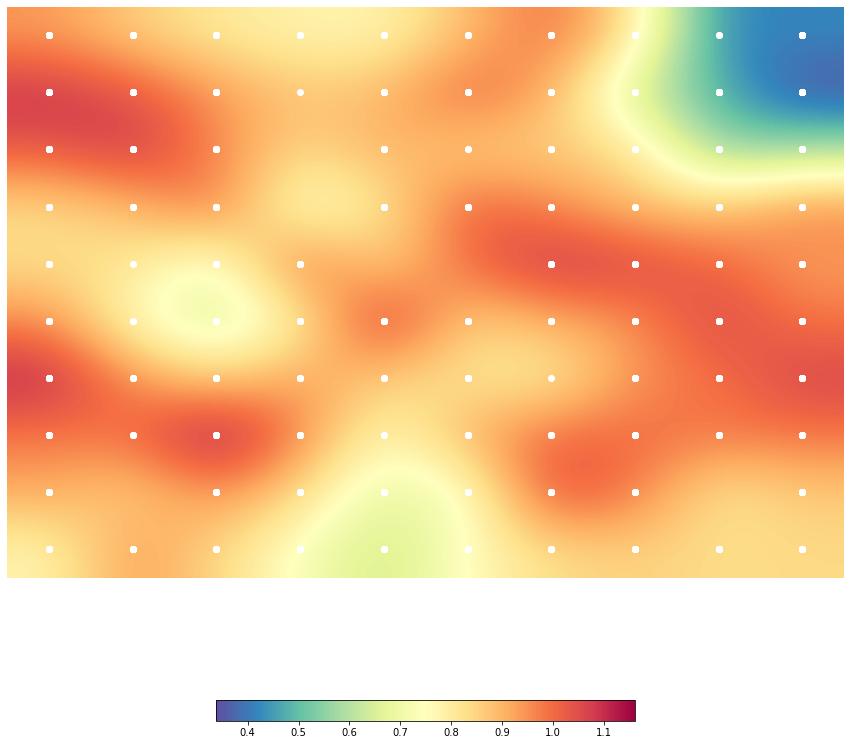

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [40]:
som = joblib.load('som__subset_10x10_epochs_100.pkl')
som.view_umatrix(bestmatches = True, colorbar = True, figsize = (15, 15))

Για grid 20x20 και 100 εποχές:

  - final_set (πλήρες dataset 5000 ταινιών)

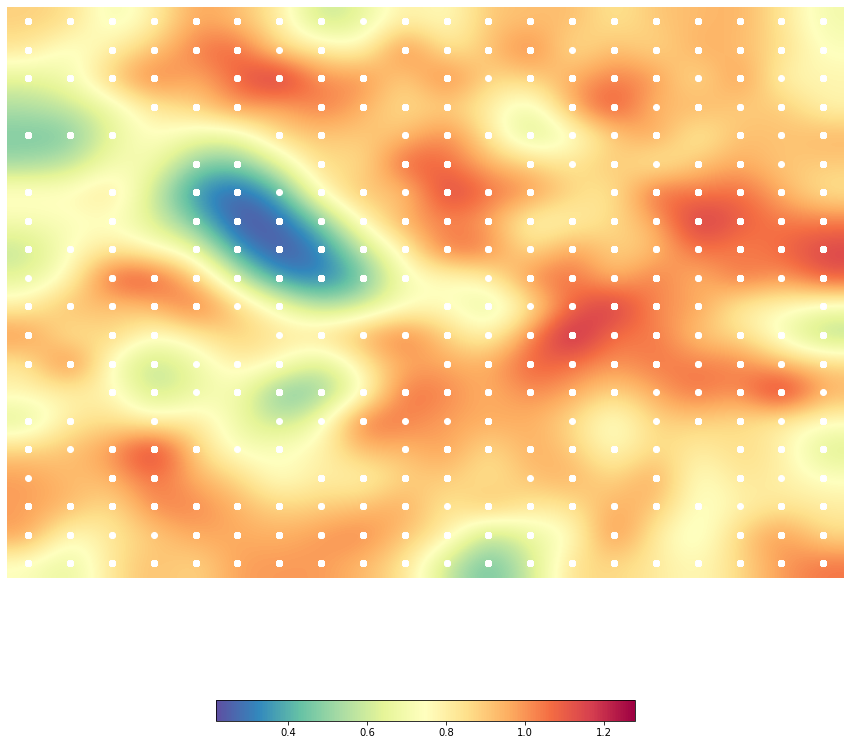

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [45]:
som = joblib.load('som__set_20x20_epochs_100.pkl')
som.view_umatrix(bestmatches = True, colorbar = True, figsize = (15, 15))

Για grid 25x25 και 100 εποχές:

   - final_subset (υποσύνολο 2000 ταινιών)

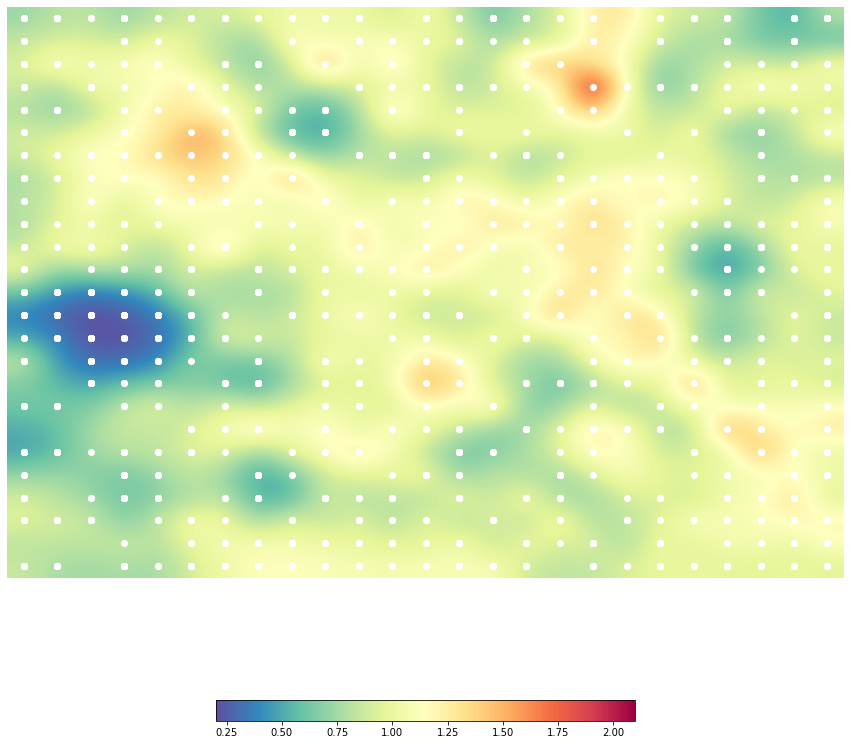

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [46]:
som = joblib.load('som__subset_25x25_epochs_100.pkl')
som.view_umatrix(bestmatches = True, colorbar = True, figsize = (15, 15))

  - final_set (πλήρες dataset 5000 ταινιών)

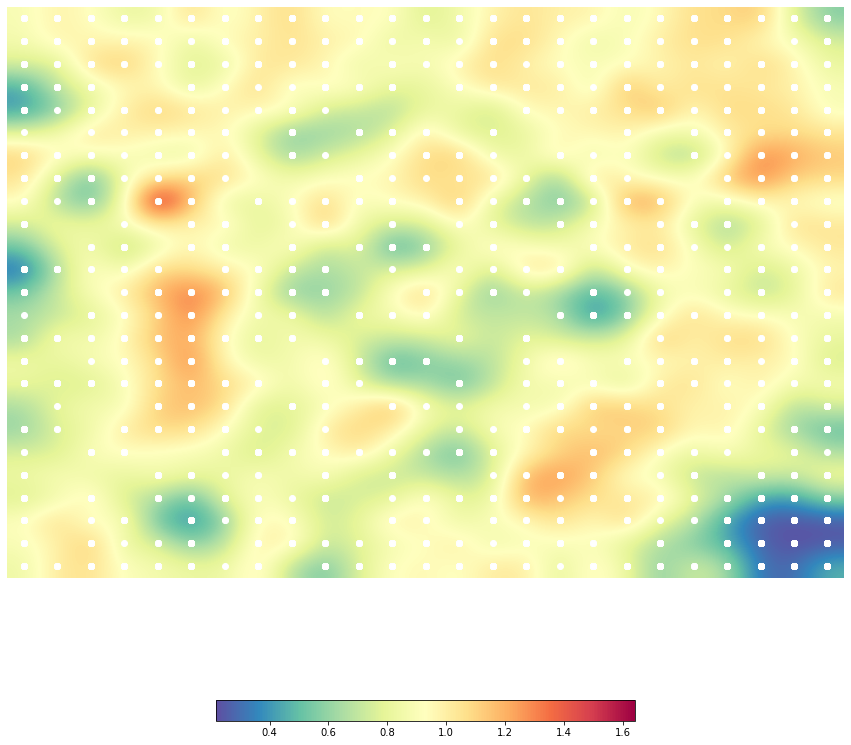

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [47]:
som = joblib.load('som__set_25x25_epochs_100.pkl')
som.view_umatrix(bestmatches = True, colorbar = True, figsize = (15, 15))

Για grid 25x25 και 200 εποχές:

  - final_set (πλήρες dataset 5000 ταινιών)

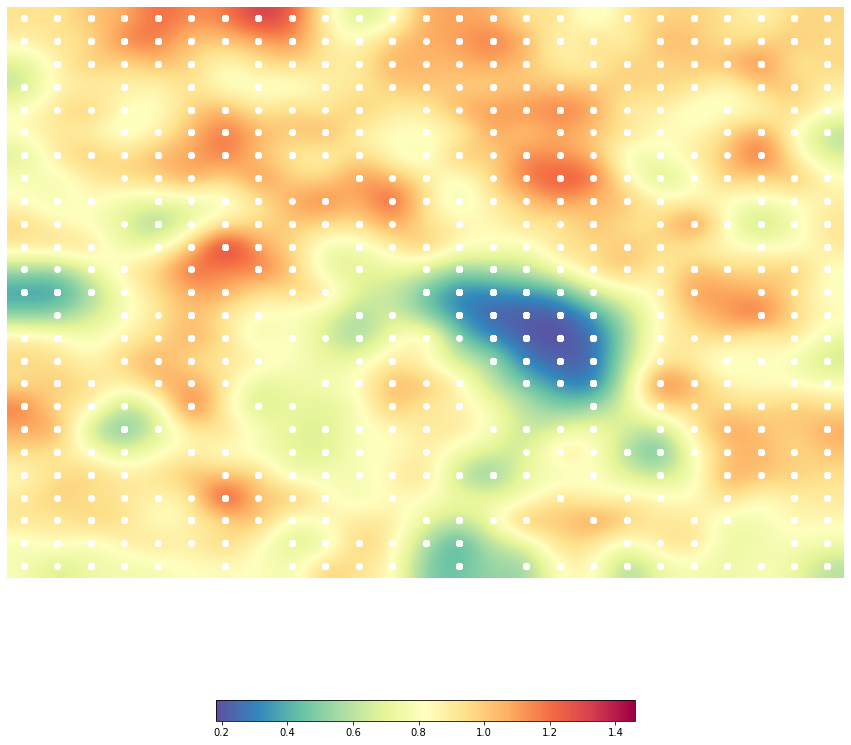

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [48]:
som = joblib.load('som__set_25x25_epochs_200.pkl')
som.view_umatrix(bestmatches = True, colorbar = True, figsize = (15, 15))

Για grid 30x30 και 100 εποχές:

  - final_subset (υποσύνολο 2000 ταινιών)

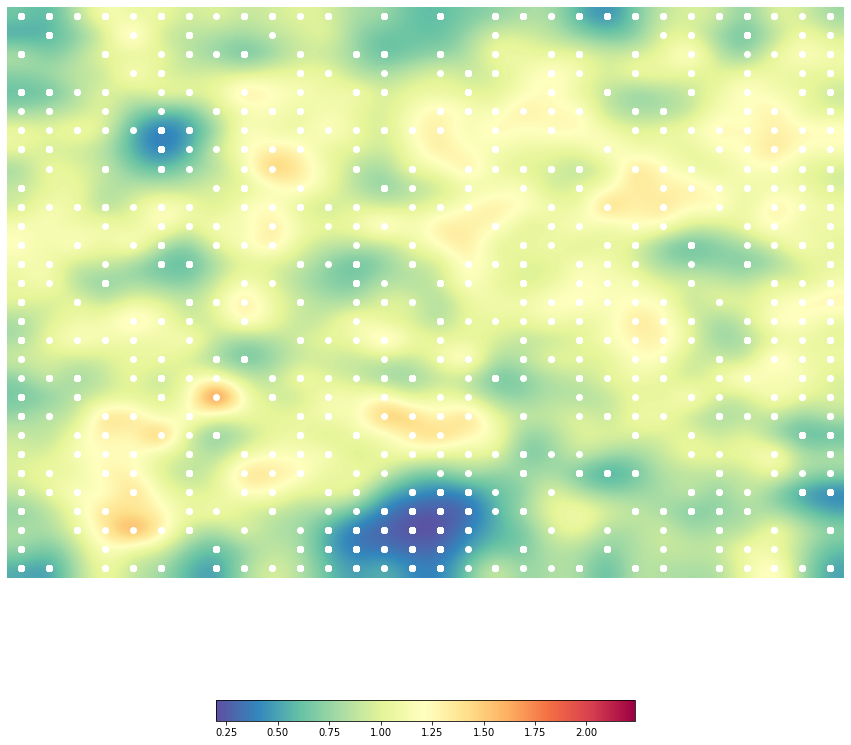

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [49]:
som = joblib.load('som__subset_30x30_epochs_100.pkl')
som.view_umatrix(bestmatches = True, colorbar = True, figsize = (15, 15))

   - final_set (πλήρες dataset 5000 ταινιών)

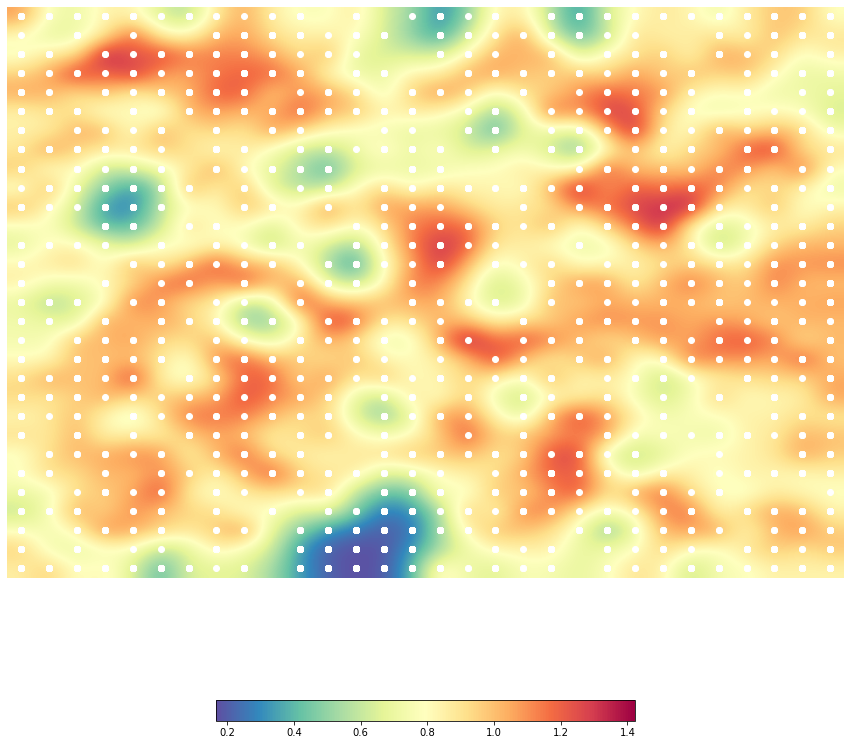

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [50]:
som = joblib.load('som__set_30x30_epochs_100.pkl')
som.view_umatrix(bestmatches = True, colorbar = True, figsize = (15, 15))

Για grid 30x30 και 200 εποχές:

   - final_set (πλήρες dataset 5000 ταινιών)

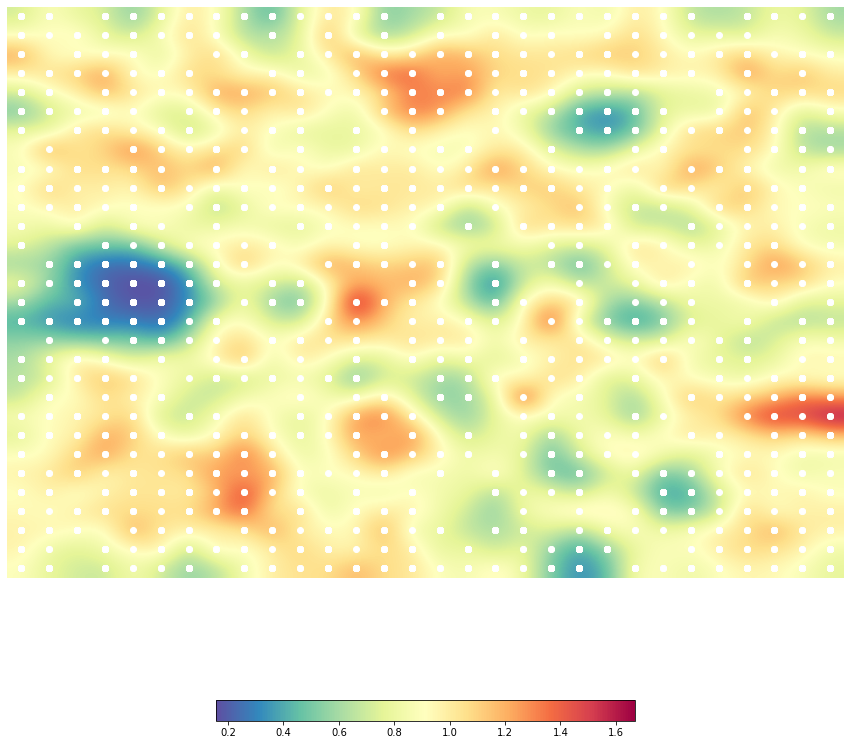

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [51]:
som = joblib.load('som__set_30x30_epochs_200.pkl')
som.view_umatrix(bestmatches = True, colorbar = True, figsize = (15, 15))

<b>Παρατηρήσεις</b>:

Το U-matrix (unified distance matrix) αποτελεί μια αναπαράσταση των χαρτών SOM, όπου για κάθε κόμβο υπολογίζεται η μέση απόσταση του από τους γειτονικούς κόμβους. Το μπλε χρώμα αντιστοιχεί σε περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση), και το κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση). Με τον τρόπο αυτό ομαδοποιούμε και τους κόμβους-νευρώνες θεωρώντας ότι μπλε περιοχές αποτελούν clusters και κόκκινες αποτελούν σύνορα μεταξύ clusters. Γενικά, για ένα αντιπροσωπευτικό U-matrix είναι απαραίτητες τόσο μπλε-πράσινες όσο και κόκκινες περιοχές, με την ύπαρξη όσο το δυνατόν εμφανών clusters και συνόρων μεταξύ τους. Προφανώς, βέβαια, τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

Όσον αφορά τα παραπάνω U-matrix παρατηρούμε γενικά ότι grids 10x10 ή 20x20 δεν επαρκούν για να αναπαραστήσουν τις τοπολογικές ιδιότητες των ταινιών. Σε αυτά τα grids βλέπουμε εκτενείς κόκκινες περιοχές να καταλαμβάνουν μεγάλα κομμάτια του χάρτη, ενώ μικρά πράσινα clusters, όχι ιδιαίτερα συμπαγή βρίσκονται διασκορπισμένα στο χάρτη και ιδίως στις άκρες αυτού. Αντιλαμβανόμαστε, λοιπόν, ότι στα grids αυτά απεικονίζονται κυρίως οι τοπολογικές αποστάσεις των ταινιών, χωρίς να καταφέρνουν να προσδιοριστούν επαρκώς οι τοπολογικές ιδιότητες που τις ομαδοποιούν. Ωστόσο, αυτό περιορίζεται με την αύξηση των διαστάσεων του grid. Για grid 25x25 και 30x30 παρατηρούμε πλέον ευδιάκριτα πράσινα, ακόμα και μπλε-συμπαγή clusters, τοποθετημένα σε διάφορα σημεία του χάρτη, με ευδιάκριτα κόκκινα σύνορα μεταξύ αυτών. Αναφορικά με τον αριθμό των ταινιών στο final_set πάνω στις οποίες εκπαιδεύεται κάθε φορά ο χάρτης SOM, παρατηρούμε ότι σε ένα υποσύνολο 2000 ταινιών εμφανίζονται αρκετές διαφορετικές ομαδοποιήσεις κοντά τοποθετημένες μεταξύ τους, συγκριτκά με το σύνολο των 5000 ταινιών, όπου πλέον εμφανίζονται έντονα κόκκινα χρώματα, οπότε και σχηματίζονται ξεκάθαρα σύνορα με μεγάλη απόσταση μεταξύ των clusters. Αυτό είναι αναμενόμενο, καθώς προσθήκη νέων ταινιών αυξάνει τις τοπολογικές ιδιότητες των ταινιών που πρέπει να αναπαρασταθούν, ενώ προσθέτει ταινίες στα είδη υπάρχοντα clusters κάνοντας τα πιο συμπαγή (έντονο μπλε χρώμα) ή δημιουργεί νέα. Τέλος, όσον αφορά τον αριθμό των εποχών που θα εκπαιδευτεί ο χάρτης SOM, παρατηρούμε ότι αύξηση από 100 σε 200 εποχές, δεν τροποποιεί έντονα την τοπολογική τοποθέτηση των clusters στο χάρτη, αλλά επιφέρει αλλαγές στα χρώματα αυτού, δηλαδή στις αποστάσεις τόσο μετάξυ των clusters όσο και εντός αυτών, καθώς 'μαθαίνονται' ίσως περισσότερες λεπτομέρεις για τις τοπολογικές ιδιότητες των ταινιών.

## Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix), όπως δείξαμε παραπάνω. Ωστόσο, το somoclu δίνει την επιπρόσθετη δυνατότητα για ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στη συνέχεια, θα χρησιμοποιήσουμε τον αλγόριθμο κ-Means πειραματιζόμενοι με την τιμή της παραμέτρου n_clusters.

Ορίζουμε δύο βοηθητικές συναρτήσεις `clustering_som` και `plot_clusters`, με την πρώτη να εφαρμόζει τον αλγόριθμο k-Means στους νευρώνες του χάρτη SOM (δέχεται ως όρισμα την παράμετρο n_clusters) και τη δεύτερη να απεικονίζει την ομαδοποίηση των νευρώνων αντιστοιχίζοντας διαφορετικό χρώμα σε κάθε cluster.

In [53]:
from sklearn.cluster import KMeans

def clustering_som(som, n_clusters = 20):
  algorithm = KMeans(n_clusters = n_clusters)
  som.cluster(algorithm=algorithm)
  return som

In [36]:
def plot_clusters(som):

  som.view_umatrix(bestmatches = True, colorbar = True, figsize = (15, 15))

  uclusters, counts = np.unique(som.clusters, return_counts = True)
  clusters_neurons = np.array([(u, c) for u, c in zip(uclusters, counts)], dtype=[('x', '<i4'), ('y', '<i4')])
  print()
  print(som.clusters)
  print()
  print('Clusters sorted by decreasing number of neurons:')
  print('(Cluster index : Number of neurons) :', end = ' ')
  print(clusters_neurons[np.argsort(clusters_neurons, order = ('y', 'x'))[::-1]])
  return som

Θα εφαρμόσουμε k-Means με διαφορετικές τιμές για την παράμετρο n_clusters, σε ένα σχετικά μικρό grid 20x20 (εκπαιδευμένο σε 100 εποχές) και σε ένα μεγαλύτερο 30x30 (εκπαιδευμένο σε 200 εποχές), προκειμένου να δούμε πως ομαδοποιεί ο αλγόριθμος τους νευρώνες σε κάθε περίπτωση. 

In [59]:
som = joblib.load('som__set_20x20_epochs_100.pkl')
som = clustering_som(som, n_clusters = 10)
joblib.dump(som, 'som__set_20x20_epochs_100_nclusters_10.pkl')

['som__set_20x20_epochs_100_nclusters_10.pkl']

In [65]:
som = joblib.load('som__set_20x20_epochs_100.pkl')
som = clustering_som(som, n_clusters = 15)
joblib.dump(som, 'som__set_20x20_epochs_100_nclusters_15.pkl')

['som__set_20x20_epochs_100_nclusters_15.pkl']

In [58]:
som = joblib.load('som__set_20x20_epochs_100.pkl')
som = clustering_som(som, n_clusters = 20)
joblib.dump(som, 'som__set_20x20_epochs_100_nclusters_20.pkl')

['som__set_20x20_epochs_100_nclusters_20.pkl']

In [60]:
som = joblib.load('som__set_20x20_epochs_100.pkl')
som = clustering_som(som, n_clusters = 25)
joblib.dump(som, 'som__set_20x20_epochs_100_nclusters_25.pkl')

['som__set_20x20_epochs_100_nclusters_25.pkl']

In [67]:
som = joblib.load('som__set_30x30_epochs_200.pkl')
som = clustering_som(som, n_clusters = 10)
joblib.dump(som, 'som__set_30x30_epochs_200_nclusters_10.pkl')

['som__set_30x30_epochs_200_nclusters_10.pkl']

In [68]:
som = joblib.load('som__set_30x30_epochs_200.pkl')
som = clustering_som(som, n_clusters = 20)
joblib.dump(som, 'som__set_30x30_epochs_200_nclusters_20.pkl')

['som__set_30x30_epochs_200_nclusters_20.pkl']

In [69]:
som = joblib.load('som__set_30x30_epochs_200.pkl')
som = clustering_som(som, n_clusters = 25)
joblib.dump(som, 'som__set_30x30_epochs_200_nclusters_25.pkl')

['som__set_30x30_epochs_200_nclusters_25.pkl']

In [70]:
som = joblib.load('som__set_30x30_epochs_200.pkl')
som = clustering_som(som, n_clusters = 30)
joblib.dump(som, 'som__set_30x30_epochs_200_nclusters_30.pkl')

['som__set_30x30_epochs_200_nclusters_30.pkl']

In [77]:
som = joblib.load('som__set_30x30_epochs_200.pkl')
som = clustering_som(som, n_clusters = 35)
joblib.dump(som, 'som__set_30x30_epochs_200_nclusters_35.pkl')

['som__set_30x30_epochs_200_nclusters_35.pkl']

In [71]:
som = joblib.load('som__set_30x30_epochs_200.pkl')
som = clustering_som(som, n_clusters = 40)
joblib.dump(som, 'som__set_30x30_epochs_200_nclusters_40.pkl')

['som__set_30x30_epochs_200_nclusters_40.pkl']

## Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Χρησιμοποιούμε τη βοηθητική συνάρτηση `plot_clusters` προκειμένου να απεικονίσουμε τις ομαδοποιήσεις που υλοποιήσαμε παραπάνω. 

Για το grid 20x20:

  - n_clusters = 10:

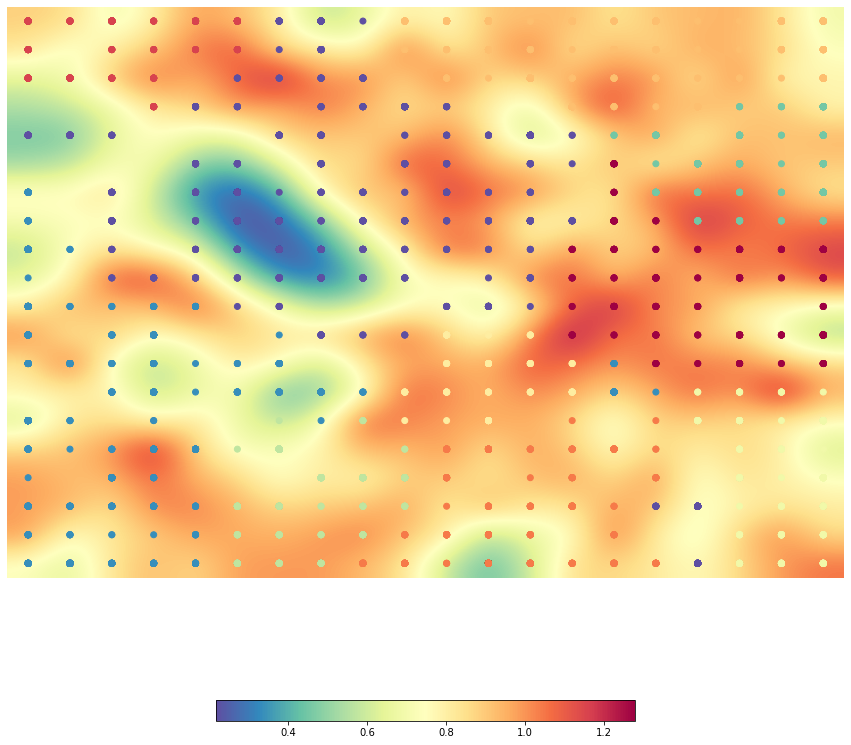


[[8 8 8 8 8 8 0 0 0 6 6 6 6 6 6 6 6 6 6 6]
 [8 8 8 8 8 8 0 0 0 6 6 6 6 6 6 6 6 6 6 6]
 [8 8 8 8 0 0 0 0 0 0 6 6 6 6 6 6 6 6 6 6]
 [8 8 8 8 0 0 0 0 0 0 0 0 0 6 6 6 6 2 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 2 2 2 2 2]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 9 2 2 2 2 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 9 9 2 2 2 2]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 9 9 9 9 9 9 9]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 9 9 9 9 9 9 9]
 [1 1 1 1 1 0 0 0 0 0 0 0 0 9 9 9 9 9 9 9]
 [1 1 1 1 1 1 1 0 0 0 5 5 5 9 9 9 9 9 9 9]
 [1 1 1 1 1 1 1 1 1 5 5 5 5 5 1 9 9 9 9 9]
 [1 1 1 1 1 1 1 1 1 5 5 5 5 5 1 1 4 4 4 4]
 [1 1 1 1 1 1 3 1 3 5 5 5 5 7 7 7 4 4 4 4]
 [1 1 1 1 1 3 3 3 3 3 7 7 7 7 7 7 4 4 4 4]
 [1 1 1 1 1 3 3 3 3 3 7 7 7 7 7 7 4 4 4 4]
 [1 1 1 1 1 3 3 3 3 3 7 7 7 7 7 0 0 4 4 4]
 [1 1 1 1 1 3 3 3 3 7 7 7 7 7 7 7 0 4 4 4]
 [1 1 1 1 1 3 3 3 7 7 7 7 7 7 7 7 0 4 4 4]]

Clusters sorted by decreasing number of neurons:
(Cluster index : Number of neurons) : [(0, 111) (1,  72) (9,  37) (6,  36) (7,  35) (4, 

In [61]:
som = joblib.load('som__set_20x20_epochs_100_nclusters_10.pkl')
plot_clusters(som)

  - n_clusters = 15:

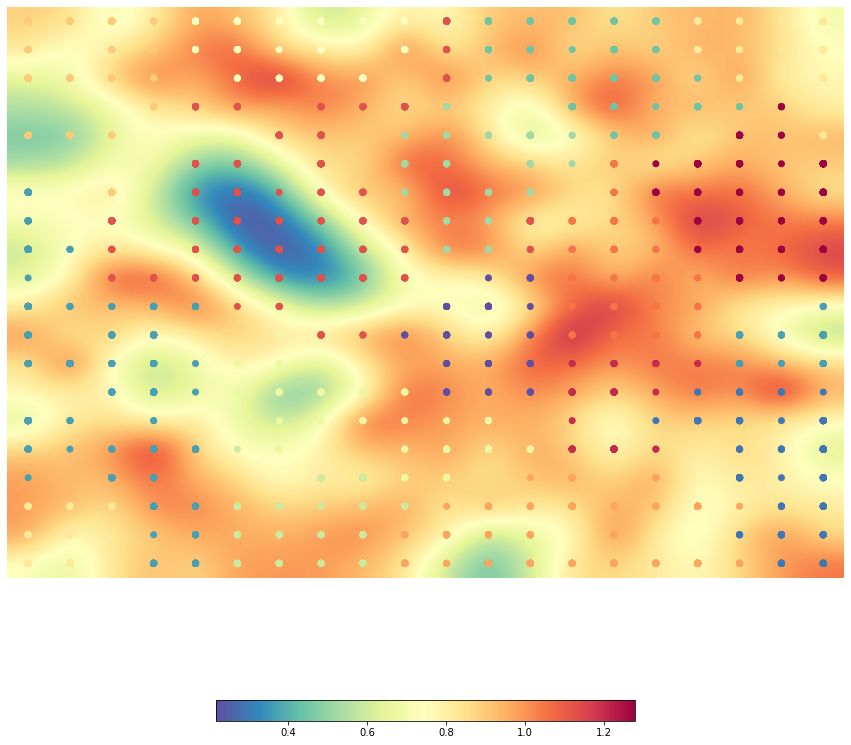


[[ 9  9  9  9  7  7  7  7  7  7 12  3  3  3  3  3  8  8  8  8]
 [ 9  9  9  9  7  7  7  7  7  7 12  3  3  3  3  3  8  8  8  8]
 [ 9  9  9  9  7  7  7  7  7 12 12  3  3  3  3  3  3  8  8  8]
 [ 9  9  9  9 12 12 12 12 12 12  4  4  4  3  3  3  3  3 14  8]
 [ 9  9  9  9 12 12 12 12 12  4  4  4  4  4  3  3 14 14 14  8]
 [ 9  9  9 12 12 12 12 12 12  4  4  4  4  4 11 14 14 14 14 14]
 [ 2  9  9 12 12 12 12 12 12  4  4  4  4 11 11 14 14 14 14 14]
 [ 2 12 12 12 12 12 12 12 12 12  4  4 12 11 11 11 14 14 14 14]
 [ 2  2 12 12 12 12 12 12 12 12  4  4 12 11 11 11 14 14 14 14]
 [ 2  2 12 12 12 12 12 12 12 12 12  0  0 11 11 11 11 14 14 14]
 [ 2  2  2  2  2 12 12 12 12 12  0  0  0 11 11 11 11 11  2  2]
 [ 2  2  2  2  2  2  6 12 12  0  0  0  0 11 11 11 11  2  2  2]
 [ 2  2  2  2  2  6  6  6  6  0  0  0  0 13 13 13 13  2  2  2]
 [ 2  2  2  2  2  6  6  6  6  6  0  0  0 13 13 13  1  1  1  1]
 [ 2  2  2  2  2  6  6  6  6  6  6  6  6 13 13  1  1  1  1  1]
 [ 2  2  2  2  2  5  6  5  5  6  6  6  6 13 13 13  1  

In [66]:
som = joblib.load('som__set_20x20_epochs_100_nclusters_15.pkl')
plot_clusters(som)

  - n_clusters = 20:

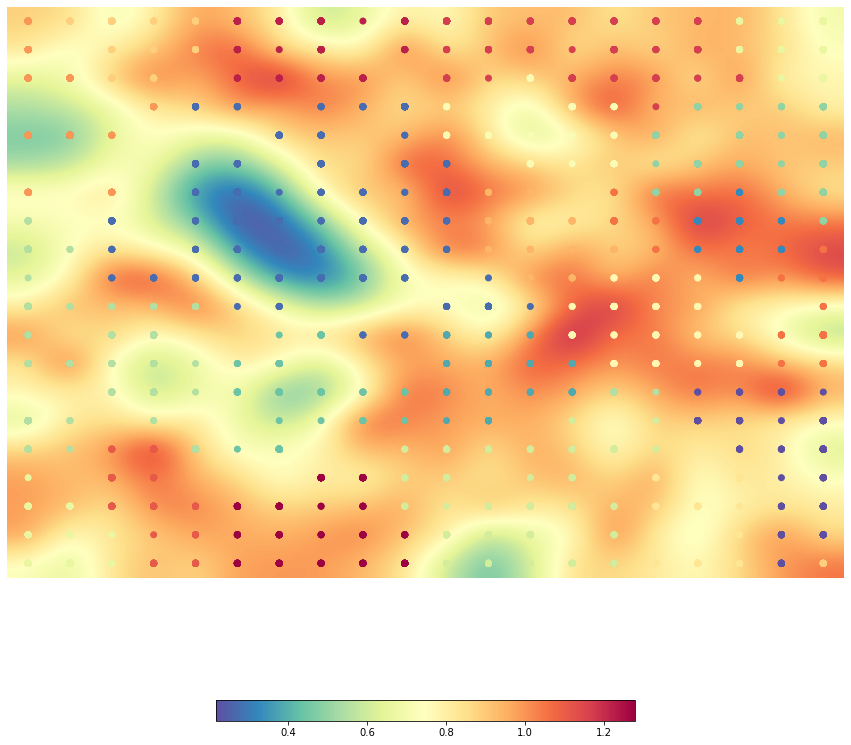


[[14 12 12 12 12 18 18 18 18 18 17 17 17 17 17 17 17  8  8  8]
 [14 12 12 12 12 18 18 18 18 18 17 17 17 17 17 17 17  8  8  8]
 [14 14 12 12 18 18 18 18 18  1 17 17  9 17 17 17 17 17  8  8]
 [14 14 14 14  1  1  1  1  1  1  9  9  9  9  9 17  5  5  5  5]
 [14 14 14 14  1  1  1  1  1  1  9  9  9  9  9  5  5  5  5  5]
 [14 14 14  1  1  1  1  1  1  1  1  9  9  9  9  5  5  5  5  5]
 [14 14 14  1  1  1  1  1  1  1  1 13 13 13 15  5  5  2  5  5]
 [ 6  6  1  1  1  1  1  1  1  1  1 13 13 13 15 15  2  2  2  5]
 [ 6  6  1  1  1  1  1  1  1  1  1 13 13 13 13 15  2  2  2 15]
 [ 6  6  1  1  1  1  1  1  1  1  1  1 13 13 10 10 10  2 15 15]
 [ 6  6  6  6  6  1  1  1  1  1  1  1  1 10 10 10 10 10 15 15]
 [ 6  6  6  6  6  4  4  4  1  1  3  3  3 10 10 10 10 10 15 15]
 [ 6  6  6  6  6  4  4  4  4  3  3  3  3  3 10 10 10 10 15 15]
 [ 6  6  6  6  6  4  4  4  4  4  3  3  3  3  6  6  0  0  0  0]
 [ 6  6  6  6  6  4  4  4  4  4  3  3  3  7  7  7  0  0  0  0]
 [ 6  6 16 16  6  4  4  4 19  7  7  7  7  7  7  7  0  

In [63]:
som = joblib.load('som__set_20x20_epochs_100_nclusters_20.pkl')
plot_clusters(som)

  - n_clusters = 25:

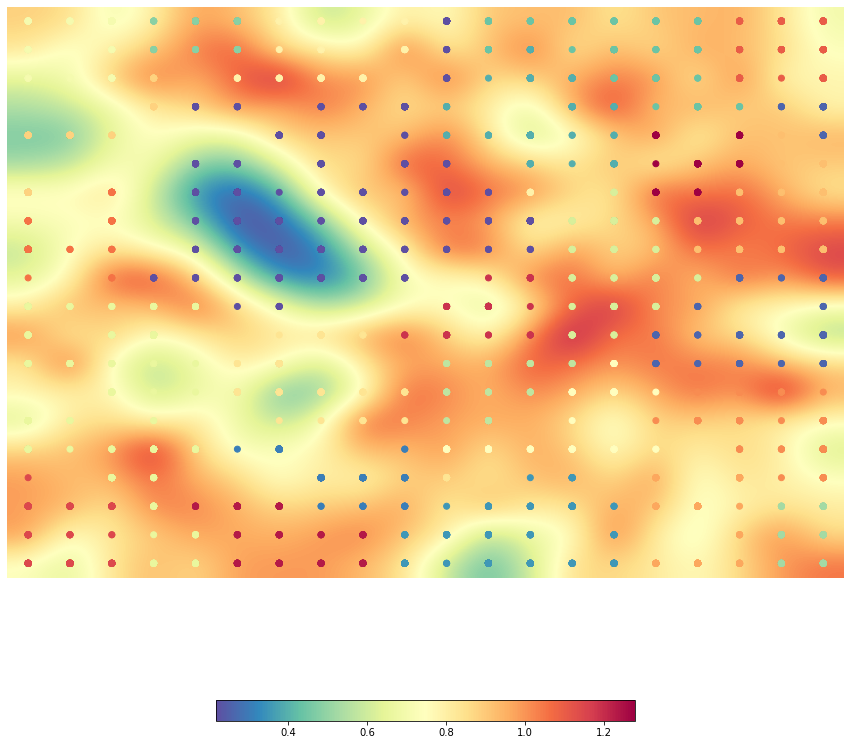


[[11 11 11  6  6  6 13 13 13 13  0  5  5  5  5  5  5 20 20 20]
 [11 11 11  6  6  6 13 13 13 13  0  5  4  5  5  5  5 20 20 20]
 [11 11 11 15 15 13 13 13 13  0  0  4  4  4  5  5  5 20 20 20]
 [15 15 15 15  0  0  0  0  0  0  4  4  4  4  4  5  5  5  1  1]
 [15 15 15 15  0  0  0  0  0  0  4  4  4  4  4 24 24 24 16  1]
 [15 15 15  0  0  0  0  0  0  0  0  0  4  4  4 24 24 24 16 16]
 [15 15 19  0  0  0  0  0  0  0  0  0 13  9  9 24 24 16 16 16]
 [19 19 19 19  0  0  0  0  0  0  0  0  0  9  9  9 16 16 16 16]
 [19 19 19  0  0  0  0  0  0  0  0  0  0  9  9  9 16 16 16 16]
 [19 19 19  0  0  0  0  0  0  0 22 22 22  9  9  9  9  1  1  1]
 [10 10 10 10 10  0  0  0  0  0 22 22 22  9  9  9  1  1  1  1]
 [10 10 10 10 10 14 14 14 14 22 22 22 22  9  9  1  1  1  1  1]
 [10 10 10 10 10 14 14 14 14  8  8  8  8  8 12  1  1  1  1  1]
 [10 10 10 10 10 14 14 14 14 14  8  8  8 12 12 12 18 18 18 18]
 [10 10 10 10 10 14 14 14 14 14  8  8  8 12 12 18 18 18 18 18]
 [10 10 10 10 10  2  2  2  2  2 12 12 12 12 12 12 18 1

In [64]:
som = joblib.load('som__set_20x20_epochs_100_nclusters_25.pkl')
plot_clusters(som)

Για το grid 30x30:

  - n_clusters = 10: 

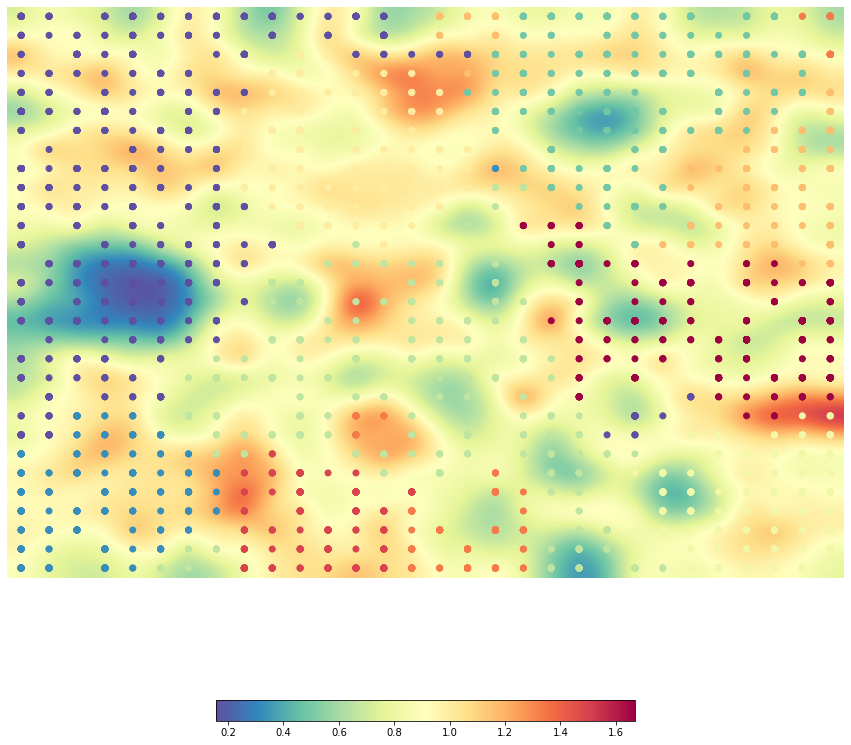


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 6 6 2 2 2 2 2 2 2 2 2 2 7 7]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 6 6 2 2 2 2 2 2 2 2 2 2 2 7]
 [0 0 0 0 0 0 0 0 0 0 5 5 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 7]
 [0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 2 6 2 2 2 2 2 2 2 2 2 2 2 2 2]
 [0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 6]
 [0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 6 6]
 [0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 6 6 6]
 [0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 5 5 2 2 2 2 2 2 2 6 6 6 6 6]
 [0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 5 1 2 2 2 2 2 2 6 6 6 6 6 6]
 [0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 5 3 3 2 2 2 2 2 6 6 6 6 6 6]
 [0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 3 3 3 2 2 2 2 2 6 6 6 6 6 6]
 [0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 3 3 3 9 9 9 2 2 6 6 6 6 6 6 6]
 [0 0 0 0 0 0 0 0 0 0 0 5 3 5 5 3 3 3 3 9 9 2 2 6 6 6 6 6 6 6]
 [0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 9 9 9 9 9 9 9 9 9 6 6]
 [0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 9 9 9 9 9 9 9 9 9 9 9]
 [0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 9 9 9 9 9 9 9 

In [72]:
som = joblib.load('som__set_30x30_epochs_200_nclusters_10.pkl')
plot_clusters(som)

  - n_clusters = 20:

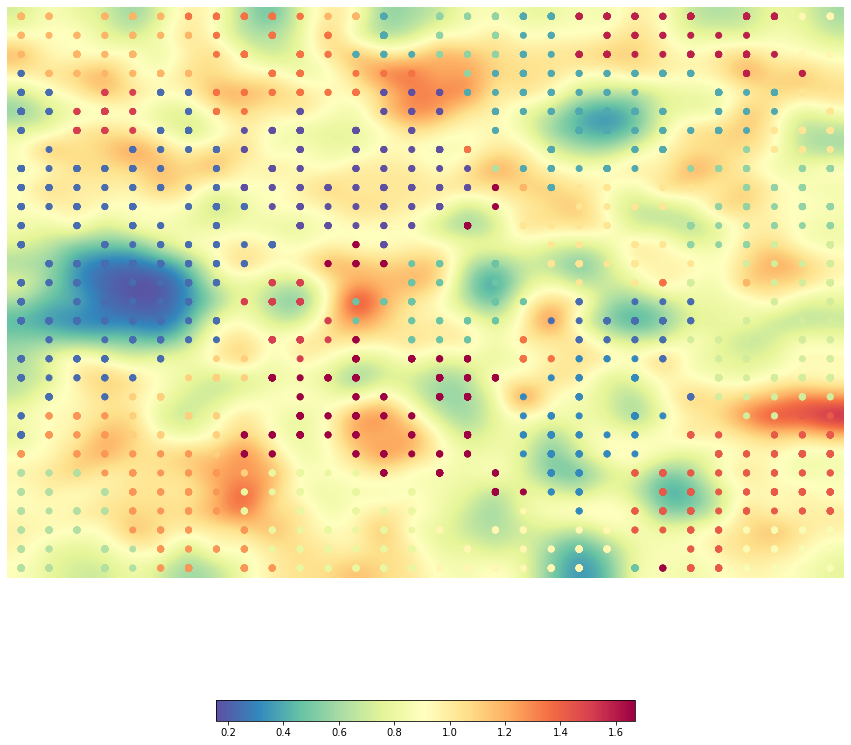


[[13 13 13 13 13 13 15 15 15 15 15 13 13  3  5  5  5  5  3  3 18 18 18 18
  18 18 18 18 10 10]
 [13 13 13 13 13 13 13 15 15 15 15 15  3  3  3  5  5  5  3  3 18 18 18 18
  18 18 18 18 10 10]
 [13 13 13 13 13 13 13 15 15 15 15 15  3  3  3  5  5  5  3  3 18 18 18 18
  18 18 18 18 10 10]
 [ 1 13 13 13 13 13 13 15 15 15 15 15 15 15 15  3  5  3  3  3  3  3  3  3
   3 18 18 18 18 11]
 [ 1  1 17 17 17  1  1 15 15 15 15 15 15  0  0  0  3  3  3  3  3  3  3  3
   3  3  3  3 11 11]
 [ 1  1 17 17 17  1  1 15 15  0  0  0  0  0  0  0  3  3  3  3  3  3  3  3
   3  3  3  3 11 11]
 [ 1 17 17 17 17  1  1  1  0  0  0  0  0  0  0  0 15  3  3  3  3  3  3  3
   3  3  3 11 11 11]
 [ 1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0 15 15  3  3  3  3  3  3
   3  5  5 11 11 11]
 [ 1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  6  3  3  3  3  3  3
   5  5  5  5  5  5]
 [ 1  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0 19 13  3 11 11 11 11
  11  5  5  5  5  5]
 [ 1  1  1  1  1  1  1  1  1  0  0  0  0  0  0  0

In [73]:
som = joblib.load('som__set_30x30_epochs_200_nclusters_20.pkl')
plot_clusters(som)

   - n_clusters = 25:

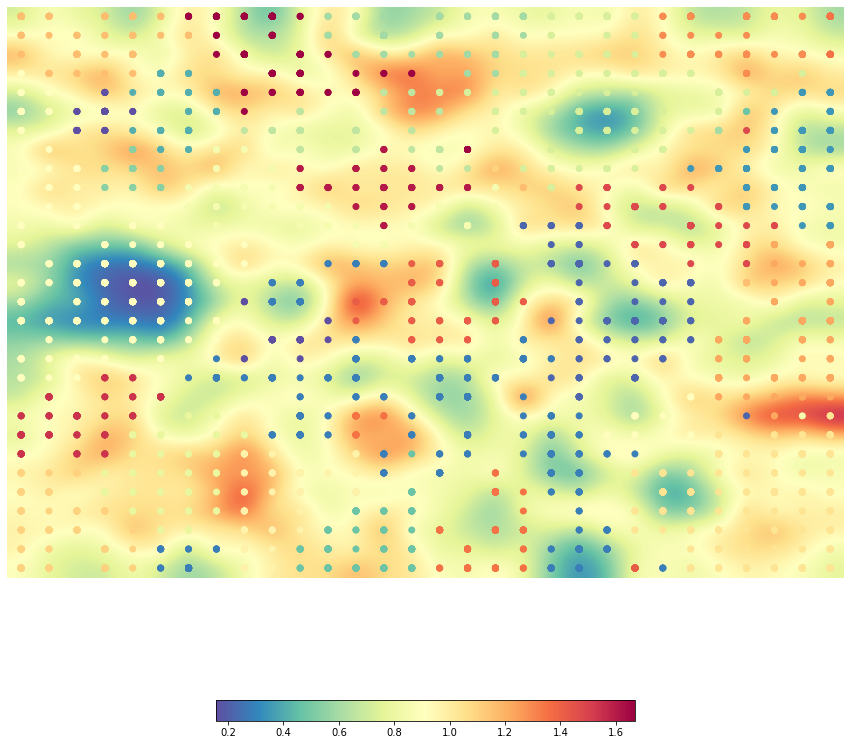


[[16 16 16 16 16 16 24 24 24 24 24  7  7  7  7  7  7  7  7  9  9  9  9 18
  18 18 18 18 18 19]
 [16 16 16 16 16 16 16 24 24 24 24  7  7  7  7  7  7  7  7  9  9  9  9 18
  18 18 18 18 18 19]
 [16 16 16 16 16 16 16 24 24 24 24 24  7  7  7  7  7  7  9  9  9  9  9 18
  18 18 18 18 18 19]
 [12 16 16 16 16  4  4  4 24 24 24 24 24 24 24  7  7  7  9  9  9  9  9  9
   9 18 18 18  9  9]
 [12 12  0  0  4  4  4  4 24 24 24 24 24  8  8  9  9  9  9  9  9  9  9  9
   9  9  9  9  3  3]
 [12 12  0  0  0  4  4  4 24  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9
   9  9  5  3  3  3]
 [12  0  0  0  4  4  4  4  8  8  8  8  8  8  8  8 24  9  9  9  9  9  9  9
   9  7 21  3  3  3]
 [12 12 12  6  6  4  4 11 11  8  8  8  8 23  8  8 24 24  9  9  9  9  9  9
   9 21  3  3  3  3]
 [12 12 12  6  6  6 11 11 11 11 23 23 23 23 23  8  8 15  9  9  9  9  9  9
   3  3  3  3  3  3]
 [12 12 12  6  6  6 11 11 11 11 23 23 23 23 23 23 23 11 16  9 21 21 21 21
  21  3  3  3  3  3]
 [12 12 12 12 12 12 11 11 11 11 11 11 23 23 23 11

In [74]:
som = joblib.load('som__set_30x30_epochs_200_nclusters_25.pkl')
plot_clusters(som)

  - n_clusters = 30:

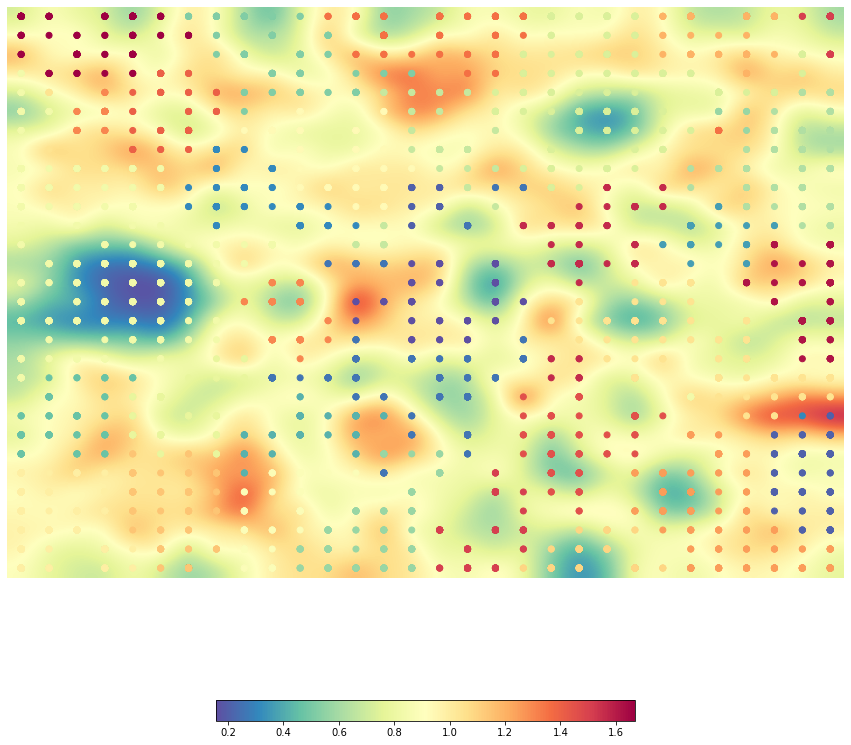


[[29 29 29 29 29 29  7  7  7  7  7 23 23 23 23 23 23 23 23 11 11 11 11 20
  20 20 20 20 26 26]
 [29 29 29 29 29 29 29  7  7  7  7  7 23 23 23 23 23 23 23 11 11 11 11 20
  20 20 20 20 20 26]
 [29 29 29 29 29 29 29  7  7  7  7  7 23 23 23 23 23 23 11 11 11 11 11 20
  20 20 20 20 11 26]
 [13 29 29 29 29 24 24  7  7  7  7  7  7  7  7 23 23 23 11 11 11 11 11 11
  11 11 20 11 11 11]
 [13 17 22 22 24 24 24 24  7  7  7  7  7 10 10 10 10 11 11 11 11 11 11 11
  11 11 11 11  9  9]
 [13 13 22 22 24 24 24 24  7 15 15 15 15 15 10 10 11 11 11 11 11 11 11 11
  11  8  8  9  9  9]
 [13 22 22 22 24 24 24 24 15 15 15 15 15 15 10 10 10 10 11 11 11 11 11 11
  11 23  8  9  9  9]
 [13 17 13 24 24 24 24  3  3 15 15 15 15 15 10 10 10 10 11 11 11 11 11 11
  11 23  9  9  9  9]
 [13 13 13 13 13 13  3  3  3  3 15 15 15 15 15 10 10 10 11 11 11 11 11 11
   9  9  9  9  9  9]
 [13 13 13 13 13 13  3  3  3  3 15 15 15 15  1  1 10  2  2 11 11 27 27 27
   9  9  9  9  9  9]
 [13 13 13 13 13 13  3  3  3  3  3  3 15 15  1  1

In [75]:
som = joblib.load('som__set_30x30_epochs_200_nclusters_30.pkl')
plot_clusters(som)

  - n_clusters = 35:

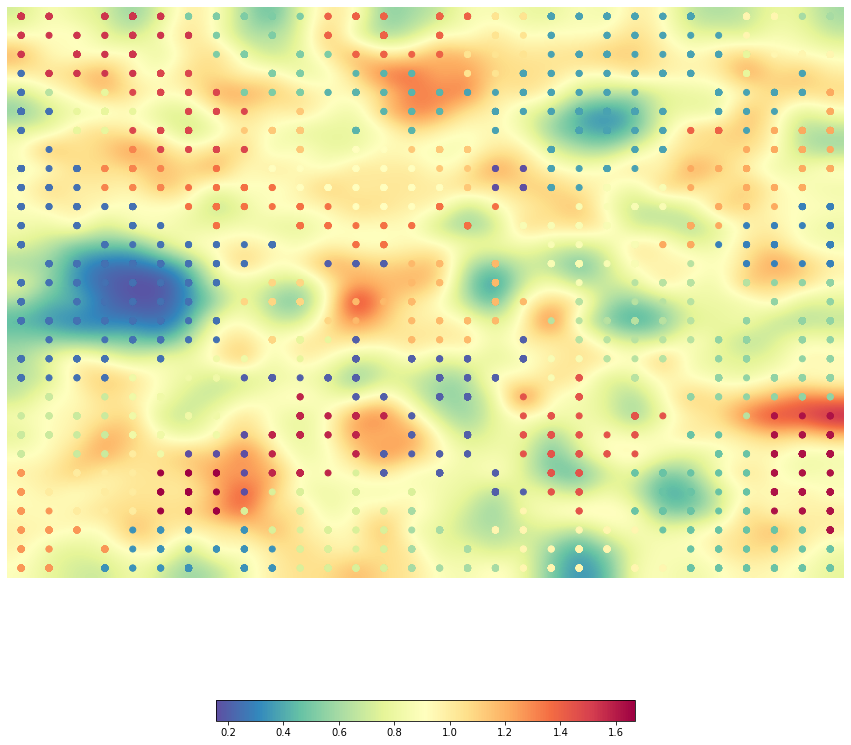


[[31 31 31 31 31 31  8  8  8  8  8 28 28 28 28 28 28 20 20  5  5  5  5  5
   5  5 18 18 10 10]
 [31 31 31 31 31 31 31  8  8  8  8 28 28 28 28 28 20 20 20  5  5  5  5  5
   5  5 18 18 18 10]
 [31 31 31 31 31 31 31  8  8  8  8  8 28 28 28 28 20 20 20  5  5  5  5  5
   5  5 14 18 18 18]
 [ 2 31 31 31 31 30 30  8  8  8  8  8  6  6  6 28 20 20  5  5  5  5  5  5
   5  5 14  5  5  5]
 [ 2 11 14 14 30 30 30 30  8  8  8  6  6  6  6  6  5  5  5  5  5  5  5  5
   5  5  5  5  5 24]
 [ 2  2 14 14 14 30 30 30 30 22 22 22  6  6  6  6  5  5  5  5  5  5  5  5
   5  5  5  5 24 24]
 [ 2 14 14 14 30 30 30 30 22 22 22 22  6  6  6 22 22  5  5  5  5  5  5  5
  28 28  5 24 24 24]
 [ 2  2  2 26 26 30 30 30 30 22 22 17 17 17 22 22 22 22  5  5  5  5  5  5
   5 28 24 24 24 24]
 [ 2  2  2 26 26 26 30 27 27 17 17 17 17 17 17 22 22  0  0  5  5  5  5  5
  24 24 24 24 24 24]
 [ 2  2  2 26 26 26 27 27 27 27 17 17 17 17 17 17 22  0  0  5  5 16 16 16
  24 24 24 24 24 24]
 [ 2  2  2  2  2  2 27 27 27 27 27 27 17 17 17 27

In [78]:
som = joblib.load('som__set_30x30_epochs_200_nclusters_35.pkl')
plot_clusters(som)

   - n_clusters = 40:

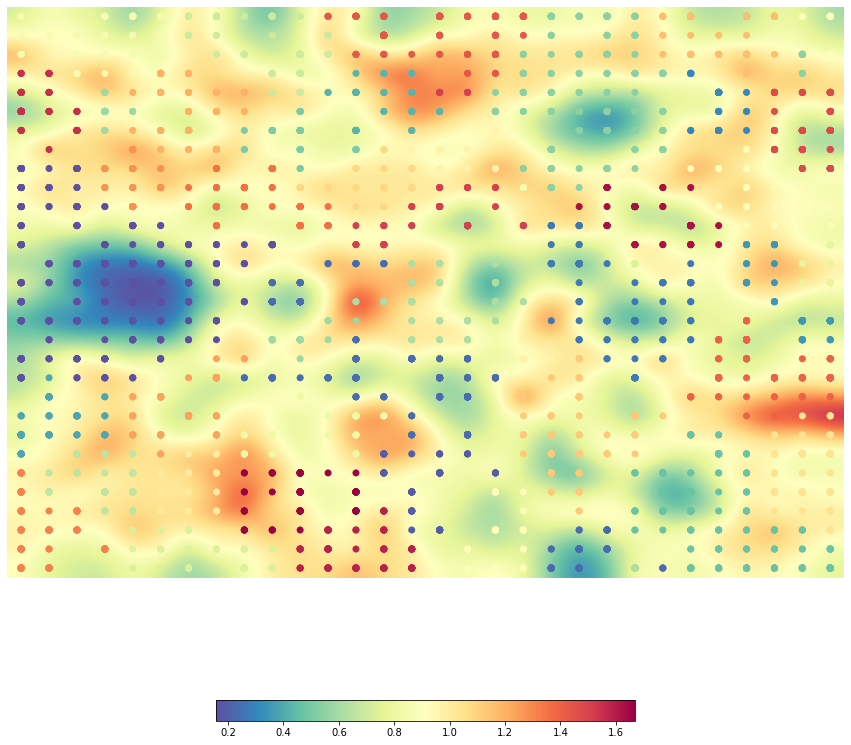


[[18 18 18 18 18 18 14 14 14 14 14 33 33 33 33 33 33 33 33 10 10 10 10 26
  26 26 26 26 19 19]
 [18 18 18 18 18 18 14 14 14 14 14 14 33 33 33 33 33 33 33 10 10 10 10 26
  26 26 26 26 19 19]
 [18 18 18 18 18 18 18 14 14 14 14 14 33 33 33 33 33 33 10 10 10 10 10 26
  26 26 26 26 10 19]
 [36 36 18 18 18 27 27 27 14 14 14 14  7  7  7 33 33 33 10 10 10 10 10 10
   4  4 26 10 10 10]
 [36 36 36 11 27 27 27 27 27 14 14  7  7  7  7 35 35 10 10 10 10 10 10 10
   4  4  4 34 34 34]
 [36 36 36 11 11 27 27 27 27  9  9  9  7  7  7  7 10 10 10 10 10 10 10 10
   4  4  4 34 34 34]
 [36 36 36 11 27 27 27 27  9  9  9  9  7  7  7 21 21 21 10 10 10 10 10 10
   4  4  4 34 34 34]
 [ 0 36 36 29 29 27 27 27  9  9  9  9  9 24 21 21 21 21 10 10 10 10 10 10
   4  4 20 34 34 34]
 [ 0  0  0 29 29 29 31 31 31 31  9 24 24 24 24 21 21 21 10 10 10 10 10 10
  20 20 20 20 34 34]
 [ 0  0  0 29 29 29 31 31 31 31 24 24 24 24 24 35 35 35 18 10 10 38 38 38
  38 20 20 20 20 20]
 [ 0  0  0  0 29 29 31 31 31 31 31 31 24 24 35 35

In [76]:
som = joblib.load('som__set_30x30_epochs_200_nclusters_40.pkl')
plot_clusters(som)

<b>Παρατηρήσεις</b>: 

Σκοπός μας είναι να δημιοργήσουμε μέσω του αλγορίθμου k-Means ομαδοποιήσεις των νευρώνων σύμφωνες με τις τοπολογικές ιδιότητες των ταινιών τις οποίες αντιπροσωπεύουν, όπως αυτές τις έχει αναπαραστήσει ο χάρτης SOM. Επιτυχημένες ομαδοποιήσεις αντιστοιχούν σε ομαδοποιήσεις νευρώνων που ανήκουν στην ίδια πράσινη-μπλε περιοχή του χάρτη SOM. Παρατηρώντας, λοιπόν, τις παραπάνω αναπαραστάσεις μπορούμε να πούμε ότι για το grid 20x20 τιμές της παραμέτρου n_clusters (ο αριθμός των clusters που δημιουργεί ο k-Means) μεταξύ 15 και 25 οδηγούν σε ικανοποιητικές ομαδοποιήσεις των νευρώνων και των τοπολογικών ιδιοτήτων των ταινιών που αυτό αναπαριστά, ενώ όσον αφορά το grid 30x30 καλύτερο clustering επιτυγχάνουμε για τιμές της παραμέτρου n_clusters μεταξύ 25 και 35. Στη συνέχεια ορίζουμε και ένα πιο ποιοτικό κριτήριο, εκτός της απλής παρατήρησης, για την επιτυχία ενός clustering.

## Σημασιολογική ερμηνεία των clusters

Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης του tf-idf, των εμφυτευμάτων και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters.

Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.
Για το σκοπό αυτό υλοποιούμε τις ζητούμενενες συναρτήσεις `print_categories_stats`, `print_cluster_neurons_movies_report` και `print_cluster_neurons_movies_report`, όπως φαίνεται παρακάτω.

In [79]:
def print_categories_stats(movies):
  categories_list = [categories[id] for id in movies]
  categories_list = [item for sublist in categories_list for item in sublist]
  ucategories, counts = np.unique(categories_list, return_counts = True)
  categories_movies = np.array([(u, c) for u, c in zip(ucategories, counts)], dtype = [('x', 'U80'), ('y', '<i4')])
  print('Overall Cluster Genres stats:', end = ' ')
  print(categories_movies[np.argsort(categories_movies, order = ('y', 'x'))[::-1]])  

In [80]:
def print_cluster_neurons_movies_report(som, cluster):
  idxs = np.where(som.clusters == cluster)
  bmus = np.column_stack((idxs[0], idxs[1]))
  ubmus = np.unique(som.bmus, axis=0)
  ubmus = [tuple(x) for x in ubmus]
  bmu_list = [tuple(bmu) for bmu in bmus if tuple(bmu) in ubmus]
  return bmu_list

In [105]:
def neurons_movies_report(som, cluster):
  ubmus, indices = np.unique(som.bmus, return_inverse=True, axis=0)
  bmus_list = print_cluster_neurons_movies_report(som, cluster)
  movies_list = [list(np.where(indices == i)[0]) for i, ubmu in enumerate(ubmus) if tuple(ubmu) in bmus_list]
  movies_list = [item for sublist in movies_list for item in sublist]
  print_categories_stats(movies_list)

Παρακάτω μελετάμε και πάλι του χάρτες SOM με grid 20x20 και 30x30 στους οποίους έχουμε εφαρμόσει τον αλγόριθμο k-Means με n_clusters μεταξύ 15-25 και 25-35 αντίστοιχα, και εκτυπώνουμε τα στατιστικά στοιχεία των πιο πολυπηθώς clusters για καθέναν από αυτούς.

Όσον αφορά το grid 20x20:

  - n_clusters = 15: 
  
  Για n_clusters = 15, τα πιο πολυπληθή cluster (δηλαδή τα cluster στα οποία έχουν ανατεθεί οι περισσότεροι νευρώνες) αντιστοιχούν σε εκείνα με id = 12 (62 νευρώνες) και id = 2 (56 νευρώνες).

In [106]:
som = joblib.load('som__set_20x20_epochs_100_nclusters_15.pkl')

In [107]:
neurons_movies_report(som, 12)

Overall Cluster Genres stats: [('Drama', 694) ('Indie',  81) ('Family Drama',  74) ('Period piece',  59)
 ('Family Film',  55) ('World cinema',  53) ('Silent film',  52)
 ('Biographical film',  42) ('Biopic [feature]',  35)
 ('Television movie',  33) ('Biography',  29) ('Film adaptation',  28)
 ('Art film',  27) ('Adventure',  26) ('Coming of age',  23)
 ('Sports',  22) ('Historical fiction',  20) ('Docudrama',  19)
 ('Comedy-drama',  19) ('War film',  15) ('Melodrama',  14)
 ('Political drama',  13) ('History',  13) ("Children's/Family",  13)
 ('Japanese Movies',  12) ('Fantasy',  12) ('Costume drama',  12)
 ('Chinese Movies',  12) ('Childhood Drama',  12) ('Musical',  11)
 ('Romantic drama',   9) ('Medical fiction',   9) ('Comedy',   9)
 ('Black-and-white',   9) ('Satire',   8) ('Ensemble Film',   8)
 ('Music',   7) ('Horror',   7) ('Thriller',   6) ('Mystery',   6)
 ('Black comedy',   6) ('Teen',   5) ('Social problem film',   5)
 ('Romance Film',   5) ('Crime Fiction',   5) ('Court

In [108]:
neurons_movies_report(som, 2)

Overall Cluster Genres stats: [('Drama', 419) ('Thriller', 410) ('Crime Fiction', 294) ('Comedy', 234)
 ('Crime Thriller', 159) ('World cinema', 152) ('Mystery', 152)
 ('Action', 102) ('Psychological thriller',  74) ('Suspense',  58)
 ('Horror',  53) ('Indie',  52) ('Science Fiction',  41)
 ('Black-and-white',  40) ('Film noir',  30) ('Adventure',  30)
 ('Romance Film',  27) ('Gangster Film',  25) ('Film adaptation',  25)
 ('Crime Drama',  25) ('Action/Adventure',  20) ('Television movie',  19)
 ('Japanese Movies',  19) ('Fantasy',  19) ('Musical',  18)
 ('Detective',  18) ('Bollywood',  18) ('Political drama',  15)
 ('Period piece',  15) ('Political thriller',  14) ('Teen',  13)
 ('Detective fiction',  13) ('Supernatural',  12) ('Spy',  11)
 ('Slapstick',  11) ('Cult',  11) ('Courtroom Drama',  11)
 ('War film',  10) ('Sports',  10) ('Erotic thriller',  10)
 ('Comedy film',   9) ('Chinese Movies',   9) ('Satire',   8)
 ('Horror Comedy',   8) ('Docudrama',   8) ('Coming of age',   8)
 

  - n_clusters = 20: 
  
  Για n_clusters = 20, τα πιο πολυπληθή cluster αντιστοιχούν σε εκείνα με id = 1 (67 νευρώνες) και id = 6 (36 νευρώνες).

In [112]:
som = joblib.load('som__set_20x20_epochs_100_nclusters_20.pkl')
neurons_movies_report(som, 1)

Overall Cluster Genres stats: [('Drama', 747) ('Indie',  79) ('Family Drama',  73) ('Family Film',  54)
 ('Period piece',  51) ('Biographical film',  38)
 ('Biopic [feature]',  35) ('World cinema',  33) ('Television movie',  33)
 ('Black-and-white',  31) ('Film adaptation',  27) ('Biography',  27)
 ('Sports',  23) ('Adventure',  23) ('Silent film',  20)
 ('Coming of age',  20) ('Docudrama',  19) ('Comedy-drama',  19)
 ('Historical fiction',  18) ('Mystery',  17) ('Melodrama',  15)
 ('Romance Film',  14) ("Children's/Family",  14) ('Political drama',  13)
 ('Chinese Movies',  12) ('Childhood Drama',  12) ('Musical',  11)
 ('Satire',  10) ('Horror',  10) ('Romantic drama',   9)
 ('Medical fiction',   9) ('History',   9) ('Fantasy',   9)
 ('Ensemble Film',   9) ('Science Fiction',   8) ('Japanese Movies',   8)
 ('Costume drama',   8) ('Comedy',   8) ('Music',   7) ('Art film',   7)
 ('Black comedy',   6) ('Thriller',   5) ('Teen',   5)
 ('Social problem film',   5) ('Marriage Drama',   5)

In [113]:
neurons_movies_report(som, 6)

Overall Cluster Genres stats: [('Drama', 428) ('Thriller', 275) ('Crime Fiction', 228)
 ('World cinema', 136) ('Mystery', 124) ('Crime Thriller', 105)
 ('Psychological thriller',  50) ('Black-and-white',  46) ('Indie',  42)
 ('Suspense',  40) ('Comedy',  38) ('Film noir',  28) ('Action',  27)
 ('Romance Film',  24) ('Crime Drama',  24) ('Film adaptation',  23)
 ('Art film',  23) ('Gangster Film',  20) ('Horror',  19)
 ('Political drama',  17) ('Period piece',  17) ('Detective',  17)
 ('Television movie',  14) ('Science Fiction',  14)
 ('Japanese Movies',  14) ('Detective fiction',  12) ('Adventure',  12)
 ('Fantasy',  11) ('Courtroom Drama',  11) ('Slapstick',  10)
 ('Political thriller',  10) ('Biography',  10) ('Erotic thriller',   9)
 ('Docudrama',   8) ('Biopic [feature]',   8) ('Chinese Movies',   7)
 ('Biographical film',   7) ('Road movie',   6) ('Melodrama',   6)
 ('Action/Adventure',   6) ('War film',   5) ('Teen',   5)
 ('Supernatural',   5) ('Neo-noir',   5) ('Coming of age'

 - n_clusters = 25: 
  
  Για n_clusters = 25, τα πιο πολυπληθή cluster αντιστοιχούν σε εκείνα με id = 0 (65 νευρώνες) και id = 10 (39 νευρώνες).

In [114]:
som = joblib.load('som__set_20x20_epochs_100_nclusters_25.pkl')
neurons_movies_report(som, 0)

Overall Cluster Genres stats: [('Drama', 704) ('Indie',  61) ('Silent film',  52) ('Family Drama',  51)
 ('Family Film',  48) ('Period piece',  47) ('Biographical film',  37)
 ('Television movie',  33) ('Biopic [feature]',  32) ('Biography',  27)
 ('Film adaptation',  24) ('Adventure',  22) ('Sports',  18)
 ('Short Film',  18) ('Historical fiction',  18) ('Comedy-drama',  17)
 ('Mystery',  16) ('Docudrama',  16) ('Melodrama',  13)
 ('Coming of age',  13) ('Chinese Movies',  12) ("Children's/Family",  12)
 ('Musical',  11) ('Political drama',  10) ('Horror',  10) ('Satire',   9)
 ('Romantic drama',   9) ('Medical fiction',   9) ('History',   9)
 ('Fantasy',   9) ('Ensemble Film',   9) ('Japanese Movies',   8)
 ('Costume drama',   8) ('Science Fiction',   7) ('Music',   7)
 ('Childhood Drama',   7) ('Black-and-white',   7) ('Black comedy',   6)
 ('Social problem film',   5) ('Marriage Drama',   5) ('Comedy',   5)
 ('World cinema',   4) ('Teen',   4) ('Romance Film',   4)
 ('Road movie', 

In [115]:
neurons_movies_report(som, 10)

Overall Cluster Genres stats: [('Thriller', 355) ('Drama', 339) ('Crime Fiction', 293)
 ('Crime Thriller', 132) ('Mystery', 127) ('Action', 106)
 ('Psychological thriller',  51) ('Indie',  46) ('Suspense',  44)
 ('Black-and-white',  35) ('Action/Adventure',  32)
 ('Science Fiction',  31) ('Film noir',  30) ('Horror',  29)
 ('Film adaptation',  29) ('Gangster Film',  27) ('Crime Drama',  26)
 ('Adventure',  26) ('World cinema',  25) ('Romance Film',  23)
 ('Comedy',  18) ('Detective',  17) ('Period piece',  16)
 ('Television movie',  15) ('Political drama',  13)
 ('Detective fiction',  12) ('Political thriller',  11)
 ('Courtroom Drama',  11) ('Fantasy',  10) ('Spy',   9)
 ('Action Thrillers',   9) ('Docudrama',   8) ('War film',   7)
 ('Supernatural',   7) ('Neo-noir',   7) ('Erotic thriller',   7)
 ('Biographical film',   7) ('Musical',   6) ('Japanese Movies',   6)
 ('Biography',   6) ('Teen',   5) ('Short Film',   5) ('Melodrama',   5)
 ('Comedy film',   5) ('Biopic [feature]',   5)

<b>Παρατηρήσεις</b>:

Παρατηρούμε ότι τα δύο πιο πολυπληθή clusters σε κάθε μια από τις παραπάνω περιπτώσεις (n_clusters = 20, 25 ή 30) αποτελούνται από συναφείς ταινίες. Και στις τρεις περιπτώσεις οι κατηγορίες που ανιπροσωπεύουν την πλειοψηφία των ταινιών που εντάσσονται στο πολυπληθέστερο cluster είναι 'Drama' και 'Indie', ενώ όσον αφορα το δεύτερο πολυπληθέστερο cluster, αυτό αποτελείται κυρίως από ταινίες των κατηγοριών 'Drama', 'Thriller', 'Crime Fiction'. Στην πρώτη περίπτωση, βέβαια για n_clusters = 15, εντάσσονται στο cluster αυτό και αρκετές ταινίες 'Comedy', οι οποίες στις επόμενες δύο περιπτώσεις βλέπουμε ότι περιορίζονται αρκετά, από 238 αρχικά (για n_clusters = 15), σε 38 (n_clusters = 20) και τελικά σε 18 (n_clusters = 25), κάτι το οποίο οφείλεται στο γεγονός ότι αυξάνεται ο αριθμός των clusters, οπότε και οι ταινίες μπορούν να διαχωριστούν σε περισσότερα clusters με μεγαλύτερη λεπτομέρεια. 

Όσον αφορά το grid 30x30:

 - n_clusters = 25: 
  
  Για n_clusters = 25, τα πιο πολυπληθή cluster αντιστοιχούν σε εκείνα με id = 2 (110 νευρώνες) και id = 12 (103 νευρώνες).

In [116]:
som = joblib.load('som__set_30x30_epochs_200_nclusters_25.pkl')
neurons_movies_report(som, 2)

Overall Cluster Genres stats: [('Romance Film', 320) ('Drama', 178) ('Comedy', 118) ('Thriller',  89)
 ('Romantic drama',  67) ('Romantic comedy',  59) ('Horror',  52)
 ('Period piece',  46) ('Mystery',  42) ('Musical',  41) ('Fantasy',  38)
 ('Indie',  36) ('World cinema',  34) ('Science Fiction',  30)
 ('Crime Fiction',  28) ('Comedy film',  24) ('Film adaptation',  21)
 ('Crime Thriller',  21) ('Adventure',  21) ('Documentary',  20)
 ('Action',  19) ('Psychological thriller',  18) ('Black-and-white',  17)
 ('Costume drama',  16) ('Suspense',  14) ('Family Film',  12)
 ('Bollywood',  11) ('Television movie',  10) ('Biographical film',  10)
 ('War film',   9) ('Chinese Movies',   9) ('Biography',   9)
 ('Melodrama',   8) ('Japanese Movies',   8) ('Sports',   7)
 ('Screwball comedy',   7) ('History',   7) ('Action/Adventure',   7)
 ('Teen',   6) ('Romantic fantasy',   6) ('Music',   6)
 ('Musical Drama',   5) ('Historical fiction',   5) ('Film noir',   5)
 ('Epic',   5) ('Creature Film

In [117]:
neurons_movies_report(som, 12)

Overall Cluster Genres stats: [('Drama', 434) ('Crime Fiction', 250) ('Comedy', 229) ('Thriller', 157)
 ('World cinema', 116) ('Mystery', 107) ('Indie',  77)
 ('Crime Thriller',  77) ('Comedy-drama',  64) ('Comedy film',  61)
 ('Black comedy',  41) ('Action',  33) ('Psychological thriller',  32)
 ('Black-and-white',  30) ('Suspense',  24) ('Satire',  23)
 ('Period piece',  20) ('Horror',  20) ('Film noir',  19)
 ('Coming of age',  18) ('Gangster Film',  17) ('Crime Comedy',  17)
 ('Romance Film',  16) ('Film adaptation',  16) ('Adventure',  16)
 ('Crime Drama',  15) ('Family Film',  14) ('Television movie',  13)
 ('Sports',  13) ('Japanese Movies',  13) ('Detective',  13)
 ('Ensemble Film',  12) ('Teen',  11) ('Road movie',  11)
 ('Domestic Comedy',  11) ('Detective fiction',  11) ('War film',  10)
 ('Cult',  10) ('Comedy of manners',  10) ('Chinese Movies',  10)
 ('Romantic comedy',   8) ('Musical',   8) ('Music',   8)
 ('Family Drama',   8) ('Docudrama',   8) ('Courtroom Drama',   8)

 - n_clusters = 30: 
  
  Για n_clusters = 30, τα πιο πολυπληθή cluster αντιστοιχούν σε εκείνα με id = 13 (97 νευρώνες) και id = 11 (67 νευρώνες).

In [118]:
som = joblib.load('som__set_30x30_epochs_200_nclusters_30.pkl')
neurons_movies_report(som, 13)

Overall Cluster Genres stats: [('Drama', 409) ('Crime Fiction', 265) ('Comedy', 225) ('Thriller', 172)
 ('World cinema', 107) ('Mystery', 105) ('Indie',  77)
 ('Crime Thriller',  77) ('Comedy-drama',  63) ('Action',  40)
 ('Black comedy',  39) ('Psychological thriller',  32)
 ('Black-and-white',  30) ('Suspense',  24) ('Gangster Film',  23)
 ('Period piece',  22) ('Satire',  21) ('Film noir',  19)
 ('Film adaptation',  18) ('Coming of age',  18) ('Comedy film',  18)
 ('Crime Comedy',  17) ('Romance Film',  16) ('Crime Drama',  16)
 ('Adventure',  16) ('Horror',  15) ('Detective',  13)
 ('Television movie',  12) ('Sports',  12) ('Ensemble Film',  12)
 ('Road movie',  11) ('Detective fiction',  11) ('War film',  10)
 ('Teen',  10) ('Japanese Movies',  10) ('Domestic Comedy',  10)
 ('Cult',  10) ('Biographical film',  10) ('Comedy of manners',   9)
 ('Family Drama',   8) ('Docudrama',   8) ('Courtroom Drama',   8)
 ('Buddy film',   8) ('Biopic [feature]',   8) ('Biography',   8)
 ('Romant

In [119]:
neurons_movies_report(som, 11)

Overall Cluster Genres stats: [('Action', 198) ('Drama', 184) ('Action/Adventure', 163) ('Western', 100)
 ('War film',  65) ('Adventure',  65) ('Thriller',  49)
 ('Black-and-white',  45) ('Comedy',  37) ('Crime Fiction',  32)
 ('World cinema',  24) ('Science Fiction',  21) ('Martial Arts Film',  19)
 ('Spy',  17) ('Period piece',  16) ('Historical fiction',  16)
 ('Romance Film',  15) ('Indie',  13) ('Fantasy',  13) ('History',  11)
 ('Disaster',  11) ('Japanese Movies',   9) ('Revisionist Western',   8)
 ('Parody',   8) ('Mystery',   8) ('Costume drama',   8)
 ('Biographical film',   8) ('Sports',   7) ('Film adaptation',   7)
 ('Epic',   7) ('Cult',   7) ('Biopic [feature]',   7)
 ('Family Film',   6) ('Chinese Movies',   6) ('Superhero movie',   5)
 ('Horror',   5) ('Ensemble Film',   5) ('Docudrama',   5)
 ('Buddy film',   5) ('Biography',   5) ('Action Comedy',   5)
 ('Television movie',   4) ('Satire',   4) ('Romantic drama',   4)
 ('Musical',   4) ('Film noir',   4) ('Doomsday f

 - n_clusters = 35: 
  
  Για n_clusters = 35, τα πιο πολυπληθή cluster αντιστοιχούν σε εκείνα με id = 2 (95 νευρώνες) και id = 5 (79 νευρώνες).

In [120]:
som = joblib.load('som__set_30x30_epochs_200_nclusters_35.pkl')
neurons_movies_report(som, 2)

Overall Cluster Genres stats: [('Drama', 394) ('Crime Fiction', 250) ('Comedy', 232) ('Thriller', 157)
 ('World cinema', 109) ('Mystery', 104) ('Indie',  77)
 ('Crime Thriller',  77) ('Comedy-drama',  63) ('Black comedy',  43)
 ('Psychological thriller',  32) ('Black-and-white',  30) ('Action',  29)
 ('Suspense',  24) ('Satire',  20) ('Period piece',  20) ('Horror',  19)
 ('Film noir',  19) ('Coming of age',  18) ('Gangster Film',  17)
 ('Crime Comedy',  17) ('Romance Film',  16) ('Film adaptation',  16)
 ('Crime Drama',  15) ('Adventure',  15) ('Television movie',  13)
 ('Detective',  13) ('Teen',  12) ('Sports',  12) ('Ensemble Film',  12)
 ('Road movie',  11) ('Detective fiction',  11) ('War film',  10)
 ('Japanese Movies',  10) ('Domestic Comedy',  10) ('Cult',  10)
 ('Comedy of manners',  10) ('Comedy film',  10) ('Family Drama',   8)
 ('Docudrama',   8) ('Courtroom Drama',   8) ('Romantic comedy',   7)
 ('Parody',   7) ('Family Film',   7) ('Buddy film',   7)
 ('Biopic [feature]'

In [121]:
neurons_movies_report(som, 5)

Overall Cluster Genres stats: [('Action', 272) ('Drama', 256) ('Action/Adventure', 218) ('Western', 102)
 ('Thriller',  97) ('Adventure',  79) ('Crime Fiction',  68)
 ('War film',  67) ('Comedy',  60) ('Black-and-white',  43)
 ('Martial Arts Film',  34) ('World cinema',  31) ('Science Fiction',  24)
 ('Spy',  21) ('Period piece',  21) ('Indie',  19) ('Romance Film',  17)
 ('Disaster',  16) ('Chinese Movies',  16) ('Mystery',  15)
 ('Film adaptation',  15) ('Fantasy',  14) ('Japanese Movies',  11)
 ('History',  11) ('Biographical film',  11) ('Action Thrillers',  11)
 ('Sports',  10) ('Parody',   9) ('Historical fiction',   9)
 ('Family Film',   9) ('Costume drama',   9) ('Revisionist Western',   8)
 ('Crime Thriller',   8) ('Blaxploitation',   8) ('Action Comedy',   8)
 ('Superhero movie',   7) ('Horror',   7) ('Epic',   7) ('Cult',   7)
 ('Buddy film',   7) ('Television movie',   6) ('Ensemble Film',   6)
 ('Black comedy',   6) ('Biopic [feature]',   6) ('Biography',   6)
 ('Psycholog

<b>Παρατηρήσεις</b>:

Για το grid 30x30 παρατηρούμε ότι το πολυπληθέστερο cluster περιλαμβάνει κυρίως ταινίες που εντάσσονται στις κατηγορίες 'Drama', 'Crime Fiction', 'Thriller'. Παρατηρούμε βέβαια ότι για n_clusters = 25, παράλληλα με τις ταινίες αυτές περιλαμβάνονται και αρκετές ταινίες 'Romance Film' και 'Romance Drama', οπότε και αντιλαμβανόμαστε ότι το clustering αυτό συγχέει λίγο τοπολογικές ιδότητες των ταινιών που στις άλλες δύο περιπτώσεις γίνονται αρκετά ξεκάθαρες. Όσον αφορά την τιμή n_clusters = 30 βλέπουμε έναν μεγάλο αριθμό των ταινιών να κατατάσσεται στις τρεις αυτές κατηγορίες, με τον αριθμό αυτό να μειώνεται λίγο για n_clusters = 35, οπότε και αντιλαμβανόμαστε ότι σταδιακά με την αύξηση του πλήθους των clusters, αρχίζουν και δημιουργούνται υπο-clusters εντός των ήδη υπάρχοντων. Επιπλέον, στο δεύτερο πολυπηθέστερο cluster, για n_clusters = 25 παρατηρούμε και πάλι μια σύγχυση ως προς το είδος των ταινιών που συμπεριλαμβάνονται σε αυτό ('Drama', 'Comedy', 'Thriller'), η οποία όμως σταδιακά υποχωρεί καθώς αυξάνεται το πλήθος των clusters, και για n_clusters = 30 ή 35 κυριαρχούν ταινίες 'Action', 'Action/Adventure', 'Western'.

## Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM

Ο χάρτης SOM που επιλέγουμε τελικά ως την καλύτερη και πιο αντισπροσωπευτική αναπαράσταση των τοπολογικών ιδιοτήτων των ταινιών αντιστοιχεί στο 30x30 grid εκπαιδευμένο σε 200 εποχές πάνω σε ολόκληρο το σύνολο των 5000 ταινιών, για το clustering των νευρώνων του οποίου έχει εφαρμοστεί ο αλγόριθμος k-Means με n_clusters = 30, όπως απεικονίζεται παρακάτω. 

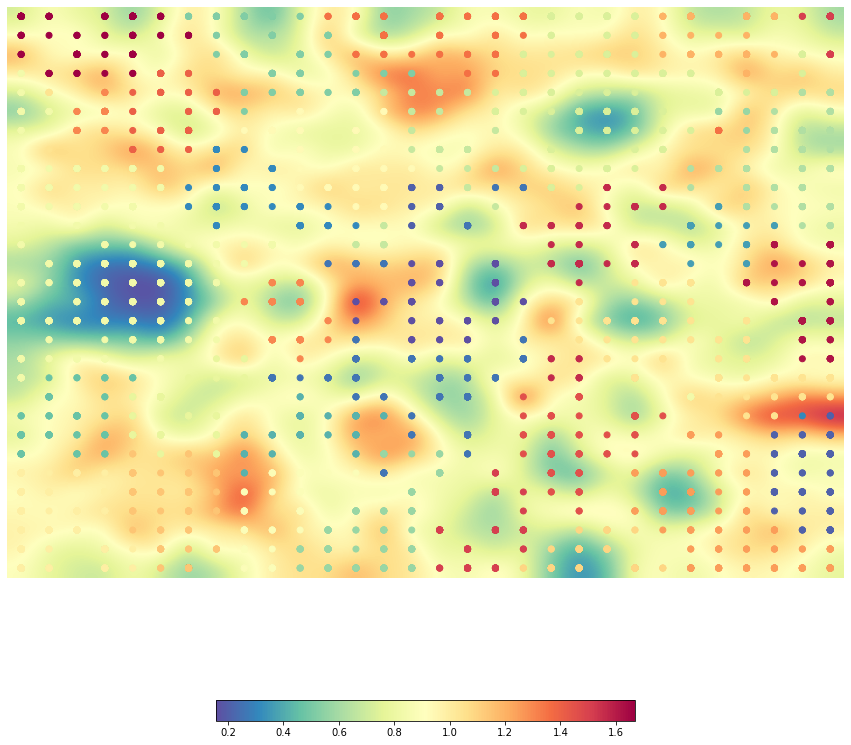


[[29 29 29 29 29 29  7  7  7  7  7 23 23 23 23 23 23 23 23 11 11 11 11 20
  20 20 20 20 26 26]
 [29 29 29 29 29 29 29  7  7  7  7  7 23 23 23 23 23 23 23 11 11 11 11 20
  20 20 20 20 20 26]
 [29 29 29 29 29 29 29  7  7  7  7  7 23 23 23 23 23 23 11 11 11 11 11 20
  20 20 20 20 11 26]
 [13 29 29 29 29 24 24  7  7  7  7  7  7  7  7 23 23 23 11 11 11 11 11 11
  11 11 20 11 11 11]
 [13 17 22 22 24 24 24 24  7  7  7  7  7 10 10 10 10 11 11 11 11 11 11 11
  11 11 11 11  9  9]
 [13 13 22 22 24 24 24 24  7 15 15 15 15 15 10 10 11 11 11 11 11 11 11 11
  11  8  8  9  9  9]
 [13 22 22 22 24 24 24 24 15 15 15 15 15 15 10 10 10 10 11 11 11 11 11 11
  11 23  8  9  9  9]
 [13 17 13 24 24 24 24  3  3 15 15 15 15 15 10 10 10 10 11 11 11 11 11 11
  11 23  9  9  9  9]
 [13 13 13 13 13 13  3  3  3  3 15 15 15 15 15 10 10 10 11 11 11 11 11 11
   9  9  9  9  9  9]
 [13 13 13 13 13 13  3  3  3  3 15 15 15 15  1  1 10  2  2 11 11 27 27 27
   9  9  9  9  9  9]
 [13 13 13 13 13 13  3  3  3  3  3  3 15 15  1  1

In [124]:
som = joblib.load('som__set_30x30_epochs_200_nclusters_30.pkl')
plot_clusters(som)

Στο παραπάνω U-matrix παρατηρούμε ότι τα κύρια clusters των νευρώνων τα οποία αντιστοιχούν και σε συμπαγείς μπλε περιοχές χαρακηρίζονται από id = 13 (κέντρο και αριστερά), id = 11 (πάνω δεξιά) και id = 17 (κέντρο και λίγο δεξιά). Όπως, προαναφέραμε στο cluster με id = 11, δηλαδή στην έντονη μπλε αριστερή περιοχή του χάρτη συγκεντρώνονται ταινίες των κατηγοριών  'Drama', 'Crime Fiction', 'Thriller', στο cluster με id = 11, δηλαδή στη μπλε περιοχή πάνω δεξιά του χάρτη, συγκεντρώνονται ταινίες που εντάσσονται στις κατηγορίες 'Action', 'Action/Adventure', ενώ στην πράσινη-μπλε περιοχή κάτω από αυτήν (cluster με id = 17) βρίσκονται τοποθετημένα κυρίως 'Short Film' και 'Animation'.

In [125]:
neurons_movies_report(som, 17)

Overall Cluster Genres stats: [('Short Film', 112) ('Animation',  60) ('Comedy film',  57)
 ('Musical',  37) ('Family Film',  31) ('Chinese Movies',  21)
 ('Fantasy',  16) ("Children's/Family",  15) ('Drama',  10)
 ('World cinema',   9) ('Romantic comedy',   9) ("Children's",   9)
 ('Computer Animation',   8) ('Indie',   6) ('Wuxia',   5) ('Music',   5)
 ('Melodrama',   5) ('Martial Arts Film',   5) ('Bollywood',   5)
 ('Television movie',   4) ('Historical fiction',   4) ('Thriller',   3)
 ('Stop motion',   3) ('Romantic drama',   3) ('Japanese Movies',   3)
 ('Filipino Movies',   3) ('Fan film',   3) ('Crime Fiction',   3)
 ("Children's Fantasy",   3) ('Art film',   3) ('Action',   3)
 ('War film',   2) ('Teen',   2) ('Slice of life story',   2)
 ('Silent film',   2) ('Propaganda film',   2) ('Mystery',   2)
 ('Musical comedy',   2) ('Film noir',   2) ('Disaster',   2)
 ('Crime Drama',   2) ('Costume drama',   2) ('Coming of age',   2)
 ('Christian film',   2) ('Adventure',   2) ('Tr

Γενικά, λοιπόν, παρατηρούμε ότι δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας (U-matrix), οπότε και κατηγορίες που αντιστοιχίζονται σε πολλές ταινίες, όπως η κατηγορία 'Drama', να καταλαμβάνουν μεγάλα κομμάτια του χάρτη SOM, και να συμπεριλαμβάνονται συχνά και μπλε περιοχές, σε αντίθεση με κατηγορίες που δεν είναι ιδιαίτερα διαδεδομένες στο dataset, οπότε καταλαμβάνουν μικρότερες και κάποιες φορές και πιο διάσπαρτες περιοχές στο χάρτη SOM. Παράλληλα, παρατηρούμε ότι μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη, όπως η κατηγορία 'War Film' (κυριαρχεί στο cluster με id = 23), η οποία συναντάται πάνω κεντρικά στο χάρτη SOM, και ήδη από μικρότερους χάρτες (μικρότερα grid) φαίνεται να τοποθετείται απομονωμένα στο χάρτη (με εμφανή σύνορα γύρω από αυτή).
Αντίστοιχα, βέβαια παρατηρούμε και ότι κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη, με χαρακτηριστικά παραδείγματα, όπως προαναφέραμε, τα clusters με id = 23 και id = 11, στα οποία τοποθετούνται παραπλήσια είδη ταινιών, 'Thriller', 'Crime Ficition' και 'Action', 'Action/Adventure' αντίστοιχα.